In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("C:/Users/sidht/Documents/Capstone")

In [2]:
import pandas as pd
#df=pd.read_csv("MSME data featEngg_Smote.csv")
#df_featengg = pd.read_csv("MSME Data Modified_v1.9_featureEngineered.csv")
df=pd.read_csv("MSME data featEngg_top10_Smote.csv")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28160 entries, 0 to 28159
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   branch_name       28160 non-null  float64
 1   ltv               28160 non-null  float64
 2   disbursed_amount  28160 non-null  float64
 3   asset_cost        28160 non-null  float64
 4   district_name     28160 non-null  float64
 5   region_name       28160 non-null  float64
 6   industry_name     28160 non-null  float64
 7   bsr_activity_cd   28160 non-null  float64
 8   state_name        28160 non-null  float64
 9   bsr_org_cd        28160 non-null  float64
 10  loan_default      28160 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 2.4 MB


In [4]:
c = [10]
X = df.drop(df.columns[c],axis=1)
y = df['loan_default'].astype(int)

In [9]:
X.head()

,branch_name,ltv,disbursed_amount,asset_cost,district_name,region_name,industry_name,bsr_activity_cd,state_name,bsr_org_cd
0,0.199998,68.43,422100.0,642970.0,0.298999,0.309520,0.285038,52319.0,0.283825,42.0
1,0.399994,72.38,485490.0,690800.0,0.258641,0.258641,0.238484,52101.0,0.268832,41.0
2,0.090908,57.46,519780.0,957220.0,0.099999,0.296584,0.285038,52319.0,0.289969,41.0
3,0.142856,88.79,516000.0,593550.0,0.182855,0.239997,0.296292,15409.0,0.263526,42.0
4,0.000000,74.72,723170.0,990420.0,0.219175,0.313008,0.325297,55201.0,0.303348,53.0


In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Random Forest

RF train roc-auc: 1.0
RF test roc-auc: 0.8890183491089709
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11187
           1       1.00      1.00      1.00     11341

    accuracy                           1.00     22528
   macro avg       1.00      1.00      1.00     22528
weighted avg       1.00      1.00      1.00     22528

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      2893
           1       0.79      0.80      0.79      2739

    accuracy                           0.80      5632
   macro avg       0.80      0.80      0.80      5632
weighted avg       0.80      0.80      0.80      5632



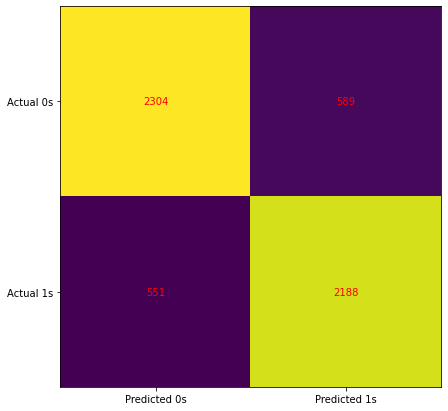

AUC: 0.8890183491089709


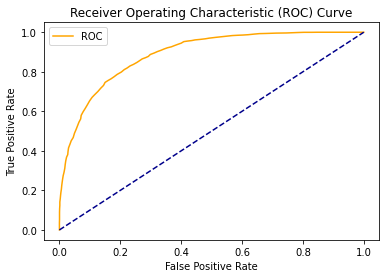

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, rf_model.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, rf_model.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )
    
fpr, tpr, thresholds = roc_curve(y_test,rf_model.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,rf_model)

In [12]:
import pickle
pickle.dump(rf_model, open("model_rf_loan_default_featengg_smote_data.pkl", 'wb'))

### With scaled data

RF train roc-auc: 1.0
RF test roc-auc: 0.8881553931529153
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11187
           1       1.00      1.00      1.00     11341

    accuracy                           1.00     22528
   macro avg       1.00      1.00      1.00     22528
weighted avg       1.00      1.00      1.00     22528

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      2893
           1       0.79      0.80      0.79      2739

    accuracy                           0.80      5632
   macro avg       0.80      0.80      0.80      5632
weighted avg       0.80      0.80      0.80      5632



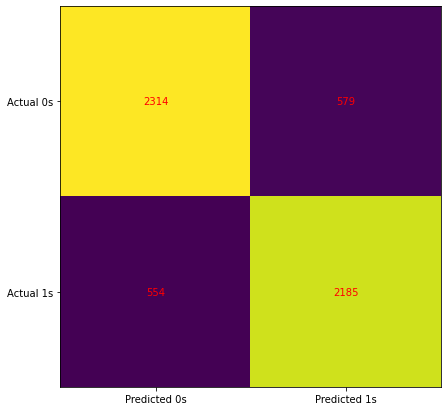

AUC: 0.8881553931529153


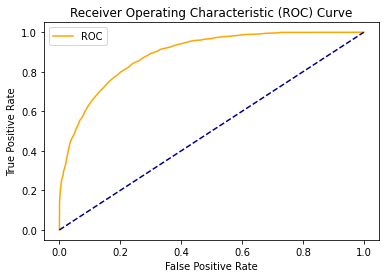

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature Scaling #no need feature scaling for DT as they ar not based on euclidean dist and also will be easy to interpret
from sklearn.preprocessing import StandardScaler #but to visalize with high reolution(0.01),feature scaling helps to execute lot faster
sc = StandardScaler()                       #so we are keeping the feature scaling, but we can also remove feature scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, rf_model.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, rf_model.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )
    
fpr, tpr, thresholds = roc_curve(y_test,rf_model.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,rf_model)

In [16]:
import pickle
pickle.dump(rf_model, open("model_rf_loan_default_featengg_scaled_smote_data.pkl", 'wb'))

### Decision Tree

Decision Tree train roc-auc: 1.0
RF test roc-auc: 0.7266410960121162
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11187
           1       1.00      1.00      1.00     11341

    accuracy                           1.00     22528
   macro avg       1.00      1.00      1.00     22528
weighted avg       1.00      1.00      1.00     22528

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      2893
           1       0.73      0.70      0.72      2739

    accuracy                           0.73      5632
   macro avg       0.73      0.73      0.73      5632
weighted avg       0.73      0.73      0.73      5632



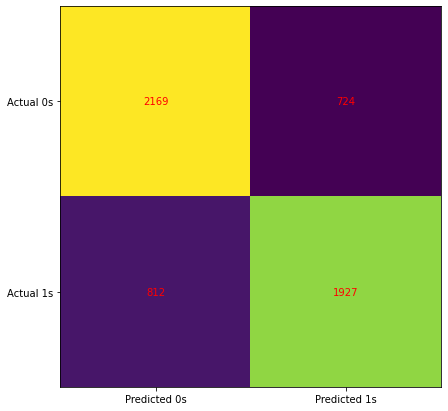

AUC: 0.7266410960121162


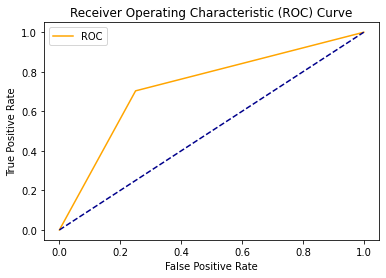

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature Scaling #no need feature scaling for DT as they ar not based on euclidean dist and also will be easy to interpret
from sklearn.preprocessing import StandardScaler #but to visalize with high reolution(0.01),feature scaling helps to execute lot faster
sc = StandardScaler()                       #so we are keeping the feature scaling, but we can also remove feature scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = dt_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

dt_classifier.fit(X_train, y_train)
ytrain_pred = dt_classifier.predict_proba(X_train)
print('Decision Tree train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = dt_classifier.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, dt_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, dt_classifier.predict(X_test)))

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test,dt_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,dt_classifier)

In [18]:
import pickle
pickle.dump(dt_classifier, open("model_dt_loan_default_featengg_smote_data.pkl", 'wb'))

### For scaled Data

Decision Tree train roc-auc: 1.0
RF test roc-auc: 0.7287171499686961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11187
           1       1.00      1.00      1.00     11341

    accuracy                           1.00     22528
   macro avg       1.00      1.00      1.00     22528
weighted avg       1.00      1.00      1.00     22528

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      2893
           1       0.73      0.71      0.72      2739

    accuracy                           0.73      5632
   macro avg       0.73      0.73      0.73      5632
weighted avg       0.73      0.73      0.73      5632



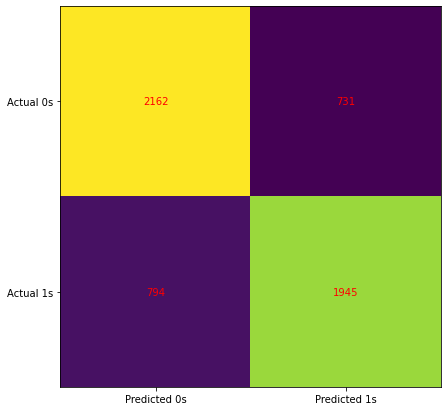

AUC: 0.7287171499686961


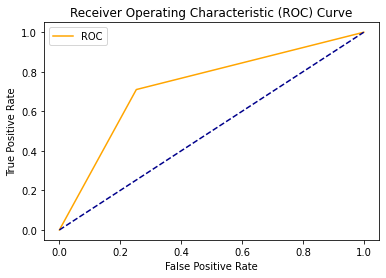

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)


# Feature Scaling #no need feature scaling for DT as they ar not based on euclidean dist and also will be easy to interpret
from sklearn.preprocessing import StandardScaler #but to visalize with high reolution(0.01),feature scaling helps to execute lot faster
sc = StandardScaler()                       #so we are keeping the feature scaling, but we can also remove feature scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = dt_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

dt_classifier.fit(X_train, y_train)
ytrain_pred = dt_classifier.predict_proba(X_train)
print('Decision Tree train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = dt_classifier.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, dt_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, dt_classifier.predict(X_test)))

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()



fpr, tpr, thresholds = roc_curve(y_test,dt_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,dt_classifier)

### SVC

SVC train roc-auc: 0.5949201290780477
SVC test roc-auc: 0.6018980235431245
              precision    recall  f1-score   support

           0       0.59      0.42      0.49     11187
           1       0.56      0.72      0.63     11341

    accuracy                           0.57     22528
   macro avg       0.57      0.57      0.56     22528
weighted avg       0.57      0.57      0.56     22528

              precision    recall  f1-score   support

           0       0.63      0.44      0.52      2893
           1       0.55      0.72      0.62      2739

    accuracy                           0.58      5632
   macro avg       0.59      0.58      0.57      5632
weighted avg       0.59      0.58      0.57      5632



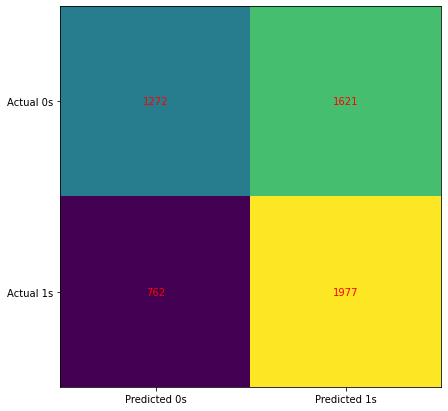

AUC: 0.6018980235431245


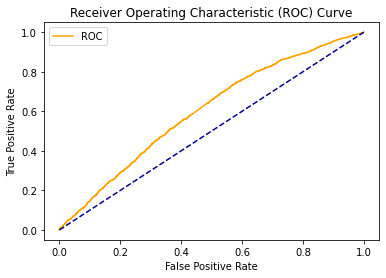

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Fitting Kernel SVM classifier to the Training set
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0, probability=True) #rbf is gaussian kernel
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
svc_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svc_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#svc_classifier.fit(X_train, y_train)
ytrain_pred = svc_classifier.predict_proba(X_train)
print('SVC train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = svc_classifier.predict_proba(X_test)
print('SVC test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, svc_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, svc_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test,svc_classifier.predict_proba(X_test)[:,1] )
auc = metrics.roc_auc_score(y_test, svc_classifier.predict_proba(X_test)[:,1])
plot_roc_curve(fpr,tpr,svc_classifier)

In [23]:
import pickle
pickle.dump(svc_classifier, open("model_dt_loan_default_featengg_smote_data.pkl", 'wb'))

## with scaled data

SVC train roc-auc: 0.6209473065824014
SVC test roc-auc: 0.6132109748108482
              precision    recall  f1-score   support

           0       0.61      0.45      0.52     11187
           1       0.57      0.72      0.64     11341

    accuracy                           0.59     22528
   macro avg       0.59      0.59      0.58     22528
weighted avg       0.59      0.59      0.58     22528

              precision    recall  f1-score   support

           0       0.62      0.45      0.52      2893
           1       0.55      0.71      0.62      2739

    accuracy                           0.58      5632
   macro avg       0.59      0.58      0.57      5632
weighted avg       0.59      0.58      0.57      5632



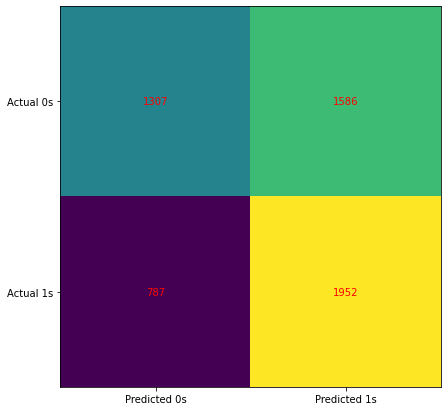

AUC: 0.6132109748108482


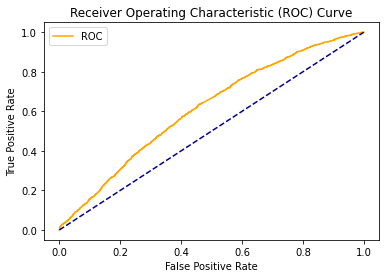

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Kernel SVM classifier to the Training set
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0, probability=True) #rbf is gaussian kernel
svc_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svc_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#svc_classifier.fit(X_train, y_train)
ytrain_pred = svc_classifier.predict_proba(X_train)
print('SVC train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = svc_classifier.predict_proba(X_test)
print('SVC test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, svc_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, svc_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test,svc_classifier.predict_proba(X_test)[:,1] )
auc = metrics.roc_auc_score(y_test, svc_classifier.predict_proba(X_test)[:,1])
plot_roc_curve(fpr,tpr,svc_classifier)

## Logistic Regression

### Without scaling

Logistic train roc-auc: 0.7218281905067185
Logistic test roc-auc: 0.7212175225743498
              precision    recall  f1-score   support

           0       0.65      0.68      0.67     11187
           1       0.67      0.65      0.66     11341

    accuracy                           0.66     22528
   macro avg       0.66      0.66      0.66     22528
weighted avg       0.66      0.66      0.66     22528

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      2893
           1       0.66      0.65      0.65      2739

    accuracy                           0.67      5632
   macro avg       0.67      0.66      0.66      5632
weighted avg       0.67      0.67      0.67      5632



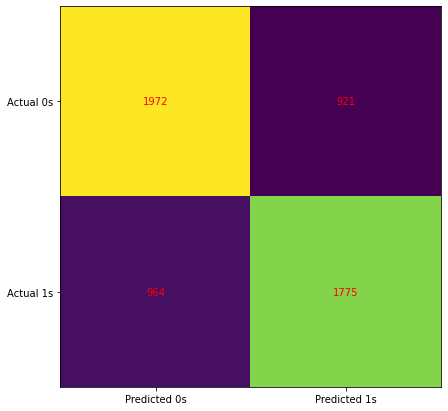

AUC: 0.7212175225743498


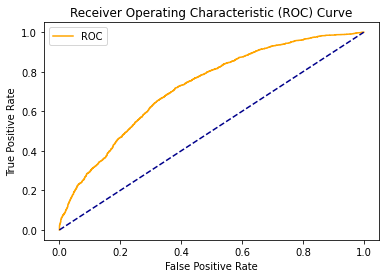

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
X_train_scaled = X_train
X_test_scaled = X_test
log_classifier.fit(X_train_scaled, y_train)
ytrain_pred = log_classifier.predict_proba(X_train_scaled)

# Predicting the Test set results
y_pred = log_classifier.predict(X_test_scaled)

print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test_scaled)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, log_classifier.predict(X_train)))

# Train Prediction classification report
print(classification_report(y_test, log_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,log_classifier.predict_proba(X_test_scaled)[:,1] )
plot_roc_curve(fpr,tpr,log_classifier)

### With scaled data

Logistic train roc-auc: 0.6015039264015296
Logistic test roc-auc: 0.6091666417421564
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11187
           1       0.50      1.00      0.67     11341

    accuracy                           0.50     22528
   macro avg       0.25      0.50      0.33     22528
weighted avg       0.25      0.50      0.34     22528

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2893
           1       0.49      1.00      0.65      2739

    accuracy                           0.49      5632
   macro avg       0.24      0.50      0.33      5632
weighted avg       0.24      0.49      0.32      5632



C:\Users\sidht\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidht\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


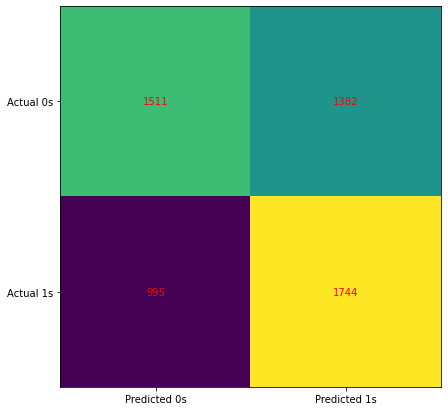

AUC: 0.6091666417421564


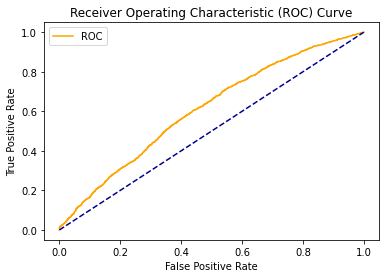

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
log_classifier.fit(X_train_scaled, y_train)
ytrain_pred = log_classifier.predict_proba(X_train_scaled)

# Predicting the Test set results
y_pred = log_classifier.predict(X_test_scaled)

print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test_scaled)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, log_classifier.predict(X_train)))

# Train Prediction classification report
print(classification_report(y_test, log_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,log_classifier.predict_proba(X_test_scaled)[:,1] )
plot_roc_curve(fpr,tpr,log_classifier)

In [27]:
import pickle
pickle.dump(log_classifier, open("model_logreg_loan_default_featengg_CorrRemoved_scaled_data.pkl", 'wb'))

### Including Iteration

Logistic train roc-auc: 0.6015039264015296
Logistic test roc-auc: 0.6091666417421564
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11187
           1       0.50      1.00      0.67     11341

    accuracy                           0.50     22528
   macro avg       0.25      0.50      0.33     22528
weighted avg       0.25      0.50      0.34     22528

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2893
           1       0.49      1.00      0.65      2739

    accuracy                           0.49      5632
   macro avg       0.24      0.50      0.33      5632
weighted avg       0.24      0.49      0.32      5632



C:\Users\sidht\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidht\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


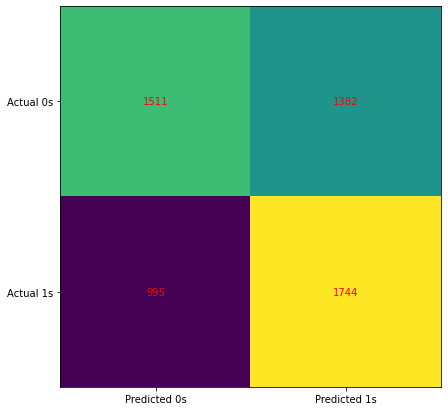

AUC: 0.6091666417421564


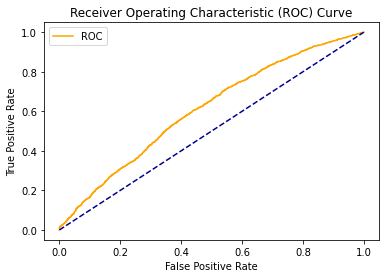

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression(solver='lbfgs',max_iter=10000)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
log_classifier.fit(X_train_scaled, y_train)
ytrain_pred = log_classifier.predict_proba(X_train_scaled)

# Predicting the Test set results
y_pred = log_classifier.predict(X_test_scaled)

print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test_scaled)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, log_classifier.predict(X_train)))

# Train Prediction classification report
print(classification_report(y_test, log_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,log_classifier.predict_proba(X_test_scaled)[:,1] )
plot_roc_curve(fpr,tpr,log_classifier)


In [29]:
pickle.dump(log_classifier, open("model_logreg_hyp_tuned_loan_default_featengg_scaled_data.pkl", 'wb'))

## Adaboost Classifier

Adaboost train roc-auc: 0.7962007496908275
Adaboost test roc-auc: 0.7948570197580064
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     11187
           1       0.70      0.73      0.72     11341

    accuracy                           0.71     22528
   macro avg       0.71      0.71      0.71     22528
weighted avg       0.71      0.71      0.71     22528

              precision    recall  f1-score   support

           0       0.73      0.68      0.71      2893
           1       0.69      0.74      0.71      2739

    accuracy                           0.71      5632
   macro avg       0.71      0.71      0.71      5632
weighted avg       0.71      0.71      0.71      5632



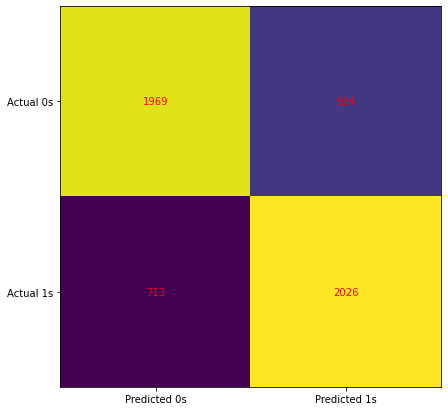

AUC: 0.7948570197580064


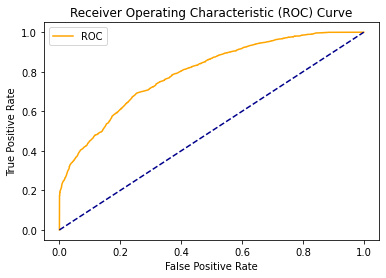

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, ada_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, ada_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ada_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,ada_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,ada_classifier)


In [31]:
pickle.dump(ada_classifier, open("model_adaboost_loan_default_featengg_smote_data.pkl", 'wb'))

## With scaled data

Adaboost train roc-auc: 0.7841012019640271
Adaboost test roc-auc: 0.7844817348771638
              precision    recall  f1-score   support

           0       0.71      0.64      0.67     11187
           1       0.67      0.75      0.71     11341

    accuracy                           0.69     22528
   macro avg       0.69      0.69      0.69     22528
weighted avg       0.69      0.69      0.69     22528

              precision    recall  f1-score   support

           0       0.73      0.63      0.67      2893
           1       0.66      0.75      0.70      2739

    accuracy                           0.69      5632
   macro avg       0.69      0.69      0.69      5632
weighted avg       0.69      0.69      0.69      5632



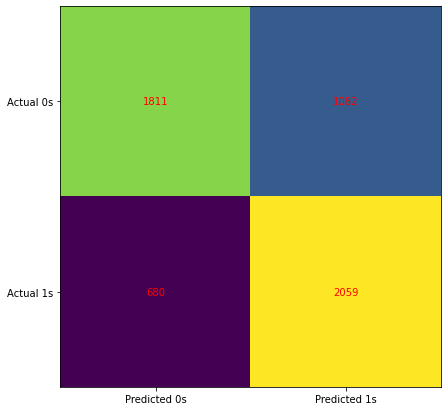

AUC: 0.7844817348771638


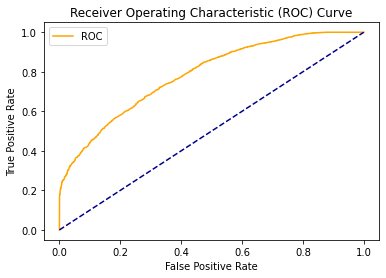

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, ada_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, ada_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ada_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,ada_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,ada_classifier)


In [33]:
pickle.dump(ada_classifier, open("model_adaboost_loan_default_featengg_smote_scaled_data.pkl", 'wb'))

## KNN Classsifier

KNN train roc-auc: 0.8074284407184145
KNN test roc-auc: 0.6200437611300559
              precision    recall  f1-score   support

           0       0.73      0.73      0.73     11187
           1       0.73      0.73      0.73     11341

    accuracy                           0.73     22528
   macro avg       0.73      0.73      0.73     22528
weighted avg       0.73      0.73      0.73     22528

              precision    recall  f1-score   support

           0       0.60      0.59      0.59      2893
           1       0.57      0.59      0.58      2739

    accuracy                           0.59      5632
   macro avg       0.59      0.59      0.59      5632
weighted avg       0.59      0.59      0.59      5632



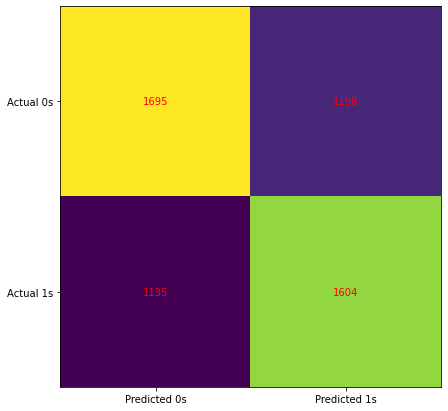

AUC: 0.6200437611300559


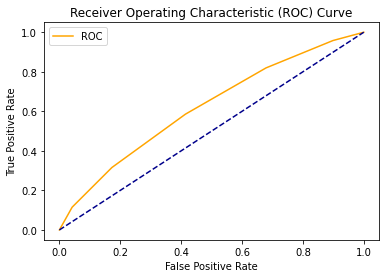

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, knn_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, knn_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,knn_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,knn_classifier)

In [35]:
pickle.dump(knn_classifier, open("model_KNN_loan_default_featengg_smote_data.pkl", 'wb'))

## With scaled data

KNN train roc-auc: 0.8542558960339852
KNN test roc-auc: 0.6875980811029682
              precision    recall  f1-score   support

           0       0.80      0.73      0.76     11187
           1       0.75      0.82      0.78     11341

    accuracy                           0.77     22528
   macro avg       0.77      0.77      0.77     22528
weighted avg       0.77      0.77      0.77     22528

              precision    recall  f1-score   support

           0       0.66      0.59      0.62      2893
           1       0.61      0.69      0.65      2739

    accuracy                           0.63      5632
   macro avg       0.64      0.64      0.63      5632
weighted avg       0.64      0.63      0.63      5632



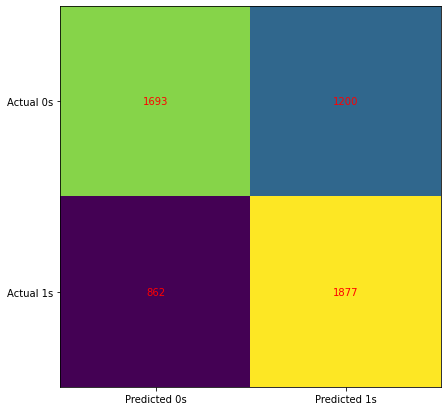

AUC: 0.6875980811029682


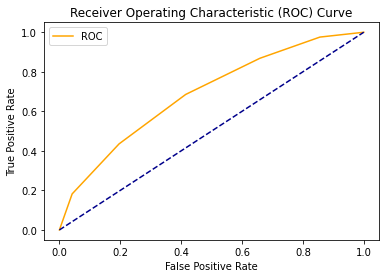

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, knn_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, knn_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,knn_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,knn_classifier)

In [37]:
pickle.dump(knn_classifier, open("model_KNN_loan_default_featengg_scaled_data.pkl", 'wb'))

## Naive bayes

Naive Bayes train roc-auc: 0.5913222955269473
Naive Bayes test roc-auc: 0.5963413721504501
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     11187
           1       1.00      0.01      0.02     11341

    accuracy                           0.50     22528
   macro avg       0.75      0.51      0.35     22528
weighted avg       0.75      0.50      0.34     22528

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      2893
           1       1.00      0.01      0.03      2739

    accuracy                           0.52      5632
   macro avg       0.76      0.51      0.36      5632
weighted avg       0.75      0.52      0.36      5632



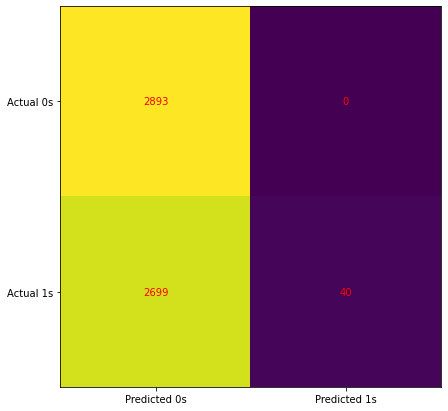

AUC: 0.5073019350127784


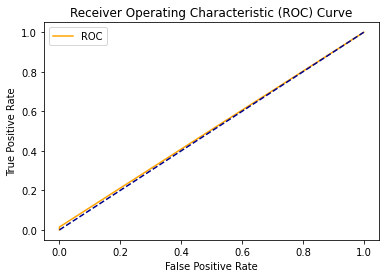

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
ytrain_pred = gnb.predict_proba(X_train_scaled)
print('Naive Bayes train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = gnb.predict_proba(X_test_scaled)
print('Naive Bayes test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, gnb.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, gnb.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, gnb.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,gnb.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,gnb)

In [39]:
pickle.dump(gnb, open("model_GaussianNaiveBayes_loan_default_featengg_smote_data.pkl", 'wb'))

## With scaled data

Naive Bayes train roc-auc: 0.5913222955269473
Naive Bayes test roc-auc: 0.5963413721504501
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     11187
           1       0.87      0.02      0.04     11341

    accuracy                           0.51     22528
   macro avg       0.69      0.51      0.36     22528
weighted avg       0.69      0.51      0.35     22528

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      2893
           1       0.90      0.03      0.05      2739

    accuracy                           0.52      5632
   macro avg       0.71      0.51      0.37      5632
weighted avg       0.70      0.52      0.38      5632



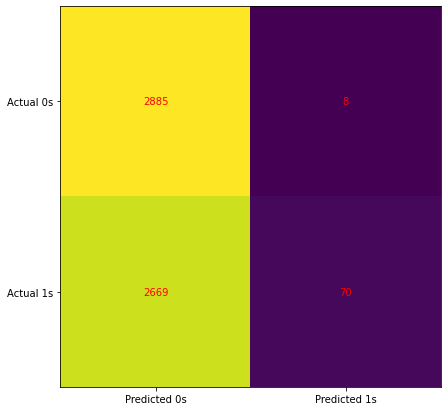

AUC: 0.5963413721504501


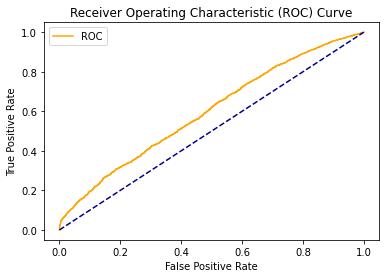

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
ytrain_pred = gnb.predict_proba(X_train_scaled)
print('Naive Bayes train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = gnb.predict_proba(X_test_scaled)
print('Naive Bayes test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, gnb.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, gnb.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, gnb.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,gnb.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,gnb)

In [41]:
pickle.dump(gnb, open("model_GaussianNaiveBayes_loan_default_featengg_smote_scaled_data.pkl", 'wb'))

## CatBoost Classifier

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=f2a3e3e6189e0c81eb0c33b118b4cf9fd180dce012a8584e6f595224eef01fff
  Stored in directory: c:\users\sidht\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Learning rate set to 0.038954
0:	learn: 0.6846610	total: 134ms	remaining: 2m 13s
1:	learn: 0.6776077	total: 155ms	remaining: 1m 17s
2:	learn: 0.6629587	total: 178ms	remaining: 59s
3:	learn: 0.6572864	total: 195ms	remaining: 48.5s
4:	learn: 0.6515519	total: 210ms	remaining: 41.8s
5:	learn: 0.6451676	total: 228ms	remaining: 37.8s
6:	learn: 0.6406992	total: 249ms	remaining: 35.3s
7:	learn: 0.6360139	total: 270ms	remaining: 33.5s
8:	learn: 0.6319432	total: 285ms	remaining: 31.3s
9:	learn: 0.6284390	total: 298ms	remaining: 29.5s
10:	learn: 0.6245858	total: 317ms	remaining: 28.5s
11:	learn: 0.6151722	total: 340ms	remaining: 28s
12:	learn: 0.6109504	total: 359ms	remaining: 27.3s
13:	lear

121:	learn: 0.5156803	total: 2.19s	remaining: 15.8s
122:	learn: 0.5155053	total: 2.2s	remaining: 15.7s
123:	learn: 0.5153597	total: 2.21s	remaining: 15.6s
124:	learn: 0.5151203	total: 2.23s	remaining: 15.6s
125:	learn: 0.5147310	total: 2.25s	remaining: 15.6s
126:	learn: 0.5146359	total: 2.27s	remaining: 15.6s
127:	learn: 0.5144653	total: 2.29s	remaining: 15.6s
128:	learn: 0.5137165	total: 2.31s	remaining: 15.6s
129:	learn: 0.5134734	total: 2.32s	remaining: 15.6s
130:	learn: 0.5129944	total: 2.34s	remaining: 15.5s
131:	learn: 0.5123699	total: 2.36s	remaining: 15.5s
132:	learn: 0.5120098	total: 2.38s	remaining: 15.5s
133:	learn: 0.5118468	total: 2.39s	remaining: 15.5s
134:	learn: 0.5112899	total: 2.41s	remaining: 15.4s
135:	learn: 0.5108747	total: 2.42s	remaining: 15.4s
136:	learn: 0.5107238	total: 2.44s	remaining: 15.4s
137:	learn: 0.5104239	total: 2.46s	remaining: 15.3s
138:	learn: 0.5103374	total: 2.47s	remaining: 15.3s
139:	learn: 0.5097490	total: 2.48s	remaining: 15.2s
140:	learn: 0

286:	learn: 0.4825237	total: 5.45s	remaining: 13.5s
287:	learn: 0.4823646	total: 5.47s	remaining: 13.5s
288:	learn: 0.4821964	total: 5.49s	remaining: 13.5s
289:	learn: 0.4818514	total: 5.51s	remaining: 13.5s
290:	learn: 0.4815728	total: 5.54s	remaining: 13.5s
291:	learn: 0.4811113	total: 5.56s	remaining: 13.5s
292:	learn: 0.4810285	total: 5.58s	remaining: 13.5s
293:	learn: 0.4808797	total: 5.61s	remaining: 13.5s
294:	learn: 0.4806180	total: 5.63s	remaining: 13.5s
295:	learn: 0.4804651	total: 5.65s	remaining: 13.4s
296:	learn: 0.4802559	total: 5.68s	remaining: 13.4s
297:	learn: 0.4801739	total: 5.7s	remaining: 13.4s
298:	learn: 0.4799799	total: 5.72s	remaining: 13.4s
299:	learn: 0.4796842	total: 5.76s	remaining: 13.4s
300:	learn: 0.4794764	total: 5.78s	remaining: 13.4s
301:	learn: 0.4793422	total: 5.8s	remaining: 13.4s
302:	learn: 0.4791978	total: 5.82s	remaining: 13.4s
303:	learn: 0.4790424	total: 5.85s	remaining: 13.4s
304:	learn: 0.4788695	total: 5.87s	remaining: 13.4s
305:	learn: 0.

449:	learn: 0.4556176	total: 8.99s	remaining: 11s
450:	learn: 0.4555287	total: 9.01s	remaining: 11s
451:	learn: 0.4553889	total: 9.04s	remaining: 11s
452:	learn: 0.4552734	total: 9.06s	remaining: 10.9s
453:	learn: 0.4551135	total: 9.08s	remaining: 10.9s
454:	learn: 0.4549799	total: 9.1s	remaining: 10.9s
455:	learn: 0.4548322	total: 9.12s	remaining: 10.9s
456:	learn: 0.4547451	total: 9.14s	remaining: 10.9s
457:	learn: 0.4546447	total: 9.17s	remaining: 10.8s
458:	learn: 0.4545109	total: 9.19s	remaining: 10.8s
459:	learn: 0.4544124	total: 9.21s	remaining: 10.8s
460:	learn: 0.4542933	total: 9.23s	remaining: 10.8s
461:	learn: 0.4541884	total: 9.25s	remaining: 10.8s
462:	learn: 0.4539893	total: 9.28s	remaining: 10.8s
463:	learn: 0.4538952	total: 9.3s	remaining: 10.7s
464:	learn: 0.4537963	total: 9.32s	remaining: 10.7s
465:	learn: 0.4536297	total: 9.34s	remaining: 10.7s
466:	learn: 0.4535238	total: 9.36s	remaining: 10.7s
467:	learn: 0.4533434	total: 9.38s	remaining: 10.7s
468:	learn: 0.453225

614:	learn: 0.4347783	total: 12.5s	remaining: 7.83s
615:	learn: 0.4347208	total: 12.5s	remaining: 7.81s
616:	learn: 0.4345241	total: 12.6s	remaining: 7.79s
617:	learn: 0.4344330	total: 12.6s	remaining: 7.77s
618:	learn: 0.4342381	total: 12.6s	remaining: 7.75s
619:	learn: 0.4341701	total: 12.6s	remaining: 7.73s
620:	learn: 0.4340735	total: 12.6s	remaining: 7.71s
621:	learn: 0.4339566	total: 12.7s	remaining: 7.69s
622:	learn: 0.4338670	total: 12.7s	remaining: 7.67s
623:	learn: 0.4337843	total: 12.7s	remaining: 7.66s
624:	learn: 0.4336704	total: 12.7s	remaining: 7.63s
625:	learn: 0.4335685	total: 12.7s	remaining: 7.62s
626:	learn: 0.4334491	total: 12.8s	remaining: 7.59s
627:	learn: 0.4333339	total: 12.8s	remaining: 7.57s
628:	learn: 0.4331938	total: 12.8s	remaining: 7.55s
629:	learn: 0.4330719	total: 12.8s	remaining: 7.53s
630:	learn: 0.4329243	total: 12.8s	remaining: 7.51s
631:	learn: 0.4328462	total: 12.9s	remaining: 7.49s
632:	learn: 0.4327754	total: 12.9s	remaining: 7.47s
633:	learn: 

781:	learn: 0.4170939	total: 16.1s	remaining: 4.48s
782:	learn: 0.4170153	total: 16.1s	remaining: 4.46s
783:	learn: 0.4169044	total: 16.1s	remaining: 4.44s
784:	learn: 0.4167834	total: 16.1s	remaining: 4.42s
785:	learn: 0.4166603	total: 16.1s	remaining: 4.39s
786:	learn: 0.4165904	total: 16.2s	remaining: 4.38s
787:	learn: 0.4164763	total: 16.2s	remaining: 4.36s
788:	learn: 0.4163752	total: 16.2s	remaining: 4.33s
789:	learn: 0.4162835	total: 16.2s	remaining: 4.32s
790:	learn: 0.4161763	total: 16.3s	remaining: 4.29s
791:	learn: 0.4160478	total: 16.3s	remaining: 4.27s
792:	learn: 0.4159511	total: 16.3s	remaining: 4.25s
793:	learn: 0.4158857	total: 16.3s	remaining: 4.23s
794:	learn: 0.4158257	total: 16.3s	remaining: 4.21s
795:	learn: 0.4157357	total: 16.4s	remaining: 4.19s
796:	learn: 0.4156814	total: 16.4s	remaining: 4.17s
797:	learn: 0.4155984	total: 16.4s	remaining: 4.15s
798:	learn: 0.4155213	total: 16.4s	remaining: 4.13s
799:	learn: 0.4154596	total: 16.4s	remaining: 4.11s
800:	learn: 

945:	learn: 0.4020481	total: 20.4s	remaining: 1.16s
946:	learn: 0.4018292	total: 20.4s	remaining: 1.14s
947:	learn: 0.4017285	total: 20.4s	remaining: 1.12s
948:	learn: 0.4016341	total: 20.5s	remaining: 1.1s
949:	learn: 0.4015635	total: 20.5s	remaining: 1.08s
950:	learn: 0.4014318	total: 20.5s	remaining: 1.06s
951:	learn: 0.4013321	total: 20.6s	remaining: 1.04s
952:	learn: 0.4012442	total: 20.6s	remaining: 1.01s
953:	learn: 0.4011403	total: 20.6s	remaining: 994ms
954:	learn: 0.4010342	total: 20.7s	remaining: 973ms
955:	learn: 0.4009491	total: 20.7s	remaining: 952ms
956:	learn: 0.4008454	total: 20.7s	remaining: 930ms
957:	learn: 0.4007485	total: 20.7s	remaining: 909ms
958:	learn: 0.4006543	total: 20.8s	remaining: 887ms
959:	learn: 0.4005364	total: 20.8s	remaining: 866ms
960:	learn: 0.4004475	total: 20.8s	remaining: 844ms
961:	learn: 0.4003709	total: 20.8s	remaining: 823ms
962:	learn: 0.4002891	total: 20.9s	remaining: 802ms
963:	learn: 0.4001886	total: 20.9s	remaining: 780ms
964:	learn: 0

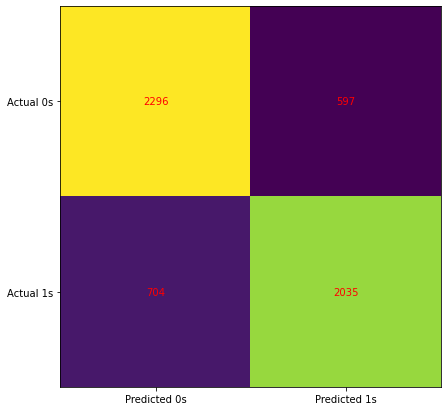

AUC: 0.8553701971257434


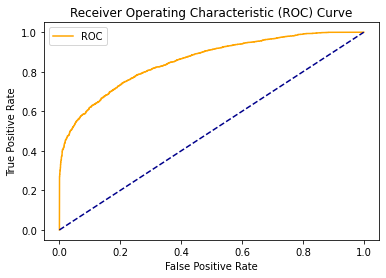

In [44]:
#!pip3 install catboost
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

import catboost as cb
cb_classifier = cb.CatBoostClassifier()
cb_classifier.fit(X_train, y_train)
ytrain_pred = cb_classifier.predict_proba(X_train)
print('Catboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = cb_classifier.predict_proba(X_test)
print('Catboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, cb_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, cb_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, cb_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,cb_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,cb_classifier)

In [45]:
pickle.dump(cb_classifier, open("model_catboost_loan_default_featengg_smote_data.pkl", 'wb'))

## With scaled data

Learning rate set to 0.038954
0:	learn: 0.6848100	total: 13.6ms	remaining: 13.6s
1:	learn: 0.6773902	total: 31.6ms	remaining: 15.8s
2:	learn: 0.6688485	total: 48.8ms	remaining: 16.2s
3:	learn: 0.6632180	total: 61.4ms	remaining: 15.3s
4:	learn: 0.6574994	total: 72.8ms	remaining: 14.5s
5:	learn: 0.6444359	total: 85.1ms	remaining: 14.1s
6:	learn: 0.6399798	total: 95.8ms	remaining: 13.6s
7:	learn: 0.6355885	total: 105ms	remaining: 13s
8:	learn: 0.6309945	total: 116ms	remaining: 12.8s
9:	learn: 0.6275642	total: 131ms	remaining: 13s
10:	learn: 0.6176897	total: 144ms	remaining: 12.9s
11:	learn: 0.6145724	total: 156ms	remaining: 12.9s
12:	learn: 0.6105774	total: 171ms	remaining: 13s
13:	learn: 0.6078851	total: 186ms	remaining: 13.1s
14:	learn: 0.6009647	total: 198ms	remaining: 13s
15:	learn: 0.5986944	total: 206ms	remaining: 12.7s
16:	learn: 0.5963688	total: 216ms	remaining: 12.5s
17:	learn: 0.5946118	total: 228ms	remaining: 12.4s
18:	learn: 0.5884316	total: 243ms	remaining: 12.6s
19:	learn: 0

165:	learn: 0.5040049	total: 2.35s	remaining: 11.8s
166:	learn: 0.5039215	total: 2.38s	remaining: 11.9s
167:	learn: 0.5037326	total: 2.4s	remaining: 11.9s
168:	learn: 0.5036326	total: 2.41s	remaining: 11.9s
169:	learn: 0.5035226	total: 2.43s	remaining: 11.9s
170:	learn: 0.5031290	total: 2.44s	remaining: 11.8s
171:	learn: 0.5029924	total: 2.46s	remaining: 11.8s
172:	learn: 0.5028111	total: 2.47s	remaining: 11.8s
173:	learn: 0.5027068	total: 2.48s	remaining: 11.8s
174:	learn: 0.5025225	total: 2.5s	remaining: 11.8s
175:	learn: 0.5023926	total: 2.52s	remaining: 11.8s
176:	learn: 0.5021949	total: 2.53s	remaining: 11.8s
177:	learn: 0.5020680	total: 2.54s	remaining: 11.7s
178:	learn: 0.5018620	total: 2.56s	remaining: 11.7s
179:	learn: 0.5015327	total: 2.57s	remaining: 11.7s
180:	learn: 0.5013546	total: 2.58s	remaining: 11.7s
181:	learn: 0.5011405	total: 2.59s	remaining: 11.7s
182:	learn: 0.5008901	total: 2.62s	remaining: 11.7s
183:	learn: 0.5007505	total: 2.63s	remaining: 11.7s
184:	learn: 0.

329:	learn: 0.4746723	total: 4.94s	remaining: 10s
330:	learn: 0.4745565	total: 4.96s	remaining: 10s
331:	learn: 0.4743951	total: 4.97s	remaining: 10s
332:	learn: 0.4742016	total: 4.99s	remaining: 10s
333:	learn: 0.4740766	total: 5.01s	remaining: 9.98s
334:	learn: 0.4739063	total: 5.03s	remaining: 9.98s
335:	learn: 0.4737663	total: 5.05s	remaining: 9.98s
336:	learn: 0.4736281	total: 5.06s	remaining: 9.96s
337:	learn: 0.4735187	total: 5.08s	remaining: 9.95s
338:	learn: 0.4733827	total: 5.1s	remaining: 9.94s
339:	learn: 0.4732724	total: 5.12s	remaining: 9.94s
340:	learn: 0.4731205	total: 5.14s	remaining: 9.93s
341:	learn: 0.4729692	total: 5.15s	remaining: 9.92s
342:	learn: 0.4726590	total: 5.17s	remaining: 9.9s
343:	learn: 0.4724851	total: 5.19s	remaining: 9.89s
344:	learn: 0.4723158	total: 5.21s	remaining: 9.89s
345:	learn: 0.4722089	total: 5.23s	remaining: 9.88s
346:	learn: 0.4719927	total: 5.24s	remaining: 9.86s
347:	learn: 0.4719215	total: 5.25s	remaining: 9.84s
348:	learn: 0.4718243	

492:	learn: 0.4510188	total: 8.09s	remaining: 8.32s
493:	learn: 0.4508225	total: 8.11s	remaining: 8.31s
494:	learn: 0.4506883	total: 8.16s	remaining: 8.32s
495:	learn: 0.4505905	total: 8.19s	remaining: 8.32s
496:	learn: 0.4505093	total: 8.22s	remaining: 8.32s
497:	learn: 0.4503460	total: 8.26s	remaining: 8.32s
498:	learn: 0.4502459	total: 8.28s	remaining: 8.32s
499:	learn: 0.4500976	total: 8.31s	remaining: 8.31s
500:	learn: 0.4499448	total: 8.34s	remaining: 8.31s
501:	learn: 0.4497540	total: 8.37s	remaining: 8.3s
502:	learn: 0.4495917	total: 8.4s	remaining: 8.3s
503:	learn: 0.4494912	total: 8.42s	remaining: 8.29s
504:	learn: 0.4493596	total: 8.45s	remaining: 8.28s
505:	learn: 0.4491673	total: 8.48s	remaining: 8.28s
506:	learn: 0.4490641	total: 8.51s	remaining: 8.27s
507:	learn: 0.4489407	total: 8.53s	remaining: 8.26s
508:	learn: 0.4488324	total: 8.56s	remaining: 8.26s
509:	learn: 0.4486949	total: 8.59s	remaining: 8.25s
510:	learn: 0.4485820	total: 8.63s	remaining: 8.25s
511:	learn: 0.4

658:	learn: 0.4313487	total: 12.2s	remaining: 6.33s
659:	learn: 0.4312736	total: 12.3s	remaining: 6.31s
660:	learn: 0.4311970	total: 12.3s	remaining: 6.3s
661:	learn: 0.4311088	total: 12.3s	remaining: 6.28s
662:	learn: 0.4309706	total: 12.3s	remaining: 6.26s
663:	learn: 0.4308659	total: 12.3s	remaining: 6.25s
664:	learn: 0.4307810	total: 12.4s	remaining: 6.23s
665:	learn: 0.4306892	total: 12.4s	remaining: 6.22s
666:	learn: 0.4306333	total: 12.4s	remaining: 6.2s
667:	learn: 0.4305160	total: 12.4s	remaining: 6.19s
668:	learn: 0.4304302	total: 12.5s	remaining: 6.17s
669:	learn: 0.4302950	total: 12.5s	remaining: 6.16s
670:	learn: 0.4301803	total: 12.5s	remaining: 6.15s
671:	learn: 0.4301003	total: 12.6s	remaining: 6.14s
672:	learn: 0.4300122	total: 12.6s	remaining: 6.12s
673:	learn: 0.4299169	total: 12.6s	remaining: 6.12s
674:	learn: 0.4298436	total: 12.7s	remaining: 6.1s
675:	learn: 0.4297738	total: 12.7s	remaining: 6.09s
676:	learn: 0.4296787	total: 12.7s	remaining: 6.08s
677:	learn: 0.4

819:	learn: 0.4151074	total: 16.8s	remaining: 3.68s
820:	learn: 0.4150335	total: 16.8s	remaining: 3.66s
821:	learn: 0.4149615	total: 16.8s	remaining: 3.64s
822:	learn: 0.4148501	total: 16.8s	remaining: 3.62s
823:	learn: 0.4147665	total: 16.8s	remaining: 3.6s
824:	learn: 0.4146662	total: 16.9s	remaining: 3.58s
825:	learn: 0.4145683	total: 16.9s	remaining: 3.56s
826:	learn: 0.4144949	total: 16.9s	remaining: 3.54s
827:	learn: 0.4143696	total: 16.9s	remaining: 3.52s
828:	learn: 0.4143059	total: 17s	remaining: 3.5s
829:	learn: 0.4141984	total: 17s	remaining: 3.48s
830:	learn: 0.4141006	total: 17s	remaining: 3.46s
831:	learn: 0.4140164	total: 17s	remaining: 3.44s
832:	learn: 0.4139540	total: 17s	remaining: 3.42s
833:	learn: 0.4138343	total: 17.1s	remaining: 3.4s
834:	learn: 0.4137531	total: 17.1s	remaining: 3.38s
835:	learn: 0.4136509	total: 17.1s	remaining: 3.36s
836:	learn: 0.4135780	total: 17.1s	remaining: 3.34s
837:	learn: 0.4134990	total: 17.2s	remaining: 3.32s
838:	learn: 0.4134263	tot

979:	learn: 0.4002157	total: 21s	remaining: 429ms
980:	learn: 0.4001329	total: 21s	remaining: 408ms
981:	learn: 0.4000831	total: 21.1s	remaining: 387ms
982:	learn: 0.4000121	total: 21.1s	remaining: 365ms
983:	learn: 0.3999281	total: 21.2s	remaining: 344ms
984:	learn: 0.3998527	total: 21.2s	remaining: 323ms
985:	learn: 0.3997736	total: 21.3s	remaining: 302ms
986:	learn: 0.3996962	total: 21.3s	remaining: 281ms
987:	learn: 0.3996075	total: 21.4s	remaining: 259ms
988:	learn: 0.3995022	total: 21.4s	remaining: 238ms
989:	learn: 0.3994010	total: 21.4s	remaining: 217ms
990:	learn: 0.3993187	total: 21.5s	remaining: 195ms
991:	learn: 0.3992690	total: 21.5s	remaining: 174ms
992:	learn: 0.3991846	total: 21.6s	remaining: 152ms
993:	learn: 0.3990916	total: 21.6s	remaining: 131ms
994:	learn: 0.3990176	total: 21.7s	remaining: 109ms
995:	learn: 0.3989614	total: 21.7s	remaining: 87.2ms
996:	learn: 0.3988794	total: 21.8s	remaining: 65.5ms
997:	learn: 0.3987964	total: 21.8s	remaining: 43.7ms
998:	learn: 0

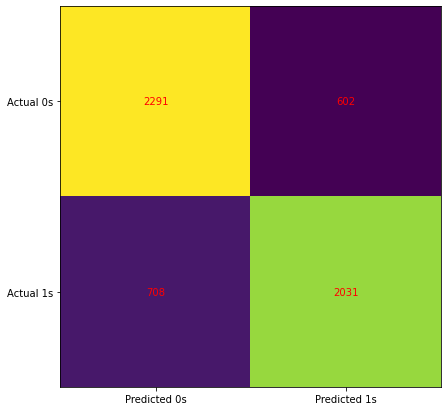

AUC: 0.854317057691218


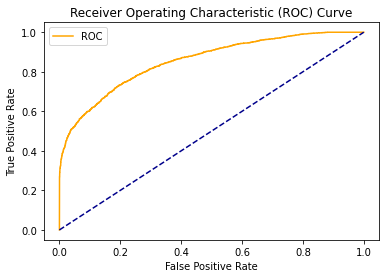

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import catboost as cb
cb_classifier = cb.CatBoostClassifier()
cb_classifier.fit(X_train, y_train)
ytrain_pred = cb_classifier.predict_proba(X_train)
print('Catboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = cb_classifier.predict_proba(X_test)
print('Catboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, cb_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, cb_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, cb_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,cb_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,cb_classifier)

In [47]:
pickle.dump(gnb, open("model_CatBoost_loan_default_featengg_scaled_smote_data.pkl", 'wb'))

## With Hyperparamerter tuning

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


import catboost as cb
from sklearn.model_selection import GridSearchCV
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}
cb1 = cb.CatBoostClassifier()
cb_classifier = GridSearchCV(cb1, params,  cv = 3)
cb_classifier.fit(X_train, y_train)
ytrain_pred = cb_classifier.predict_proba(X_train)
print('Catboost with Grid search cv train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = cb_classifier.predict_proba(X_test)
print('Catboost with Grid search cv test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, cb_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, cb_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, cb_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,cb_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,cb_classifier)

0:	learn: 0.6883112	total: 15.4ms	remaining: 4.6s
1:	learn: 0.6825006	total: 31.9ms	remaining: 4.75s
2:	learn: 0.6783833	total: 45ms	remaining: 4.46s
3:	learn: 0.6735782	total: 57.5ms	remaining: 4.25s
4:	learn: 0.6689987	total: 68.7ms	remaining: 4.05s
5:	learn: 0.6651708	total: 78.6ms	remaining: 3.85s
6:	learn: 0.6620527	total: 86.8ms	remaining: 3.63s
7:	learn: 0.6584393	total: 98.9ms	remaining: 3.61s
8:	learn: 0.6554933	total: 107ms	remaining: 3.46s
9:	learn: 0.6521814	total: 114ms	remaining: 3.3s
10:	learn: 0.6493669	total: 120ms	remaining: 3.15s
11:	learn: 0.6466823	total: 127ms	remaining: 3.04s
12:	learn: 0.6437623	total: 139ms	remaining: 3.08s
13:	learn: 0.6412301	total: 150ms	remaining: 3.06s
14:	learn: 0.6387468	total: 158ms	remaining: 3s
15:	learn: 0.6361990	total: 166ms	remaining: 2.95s
16:	learn: 0.6335786	total: 177ms	remaining: 2.94s
17:	learn: 0.6306992	total: 185ms	remaining: 2.89s
18:	learn: 0.6288793	total: 197ms	remaining: 2.91s
19:	learn: 0.6265916	total: 203ms	remain

171:	learn: 0.5231544	total: 1.63s	remaining: 1.21s
172:	learn: 0.5230878	total: 1.64s	remaining: 1.2s
173:	learn: 0.5230270	total: 1.65s	remaining: 1.2s
174:	learn: 0.5229546	total: 1.66s	remaining: 1.19s
175:	learn: 0.5224647	total: 1.67s	remaining: 1.18s
176:	learn: 0.5224052	total: 1.68s	remaining: 1.17s
177:	learn: 0.5223311	total: 1.69s	remaining: 1.16s
178:	learn: 0.5221993	total: 1.71s	remaining: 1.15s
179:	learn: 0.5220456	total: 1.72s	remaining: 1.15s
180:	learn: 0.5218500	total: 1.73s	remaining: 1.14s
181:	learn: 0.5218136	total: 1.74s	remaining: 1.13s
182:	learn: 0.5213839	total: 1.74s	remaining: 1.11s
183:	learn: 0.5213213	total: 1.76s	remaining: 1.11s
184:	learn: 0.5210527	total: 1.77s	remaining: 1.1s
185:	learn: 0.5209865	total: 1.78s	remaining: 1.09s
186:	learn: 0.5209332	total: 1.79s	remaining: 1.08s
187:	learn: 0.5208493	total: 1.8s	remaining: 1.07s
188:	learn: 0.5205687	total: 1.8s	remaining: 1.06s
189:	learn: 0.5202745	total: 1.81s	remaining: 1.05s
190:	learn: 0.520

44:	learn: 0.5702760	total: 390ms	remaining: 2.21s
45:	learn: 0.5697521	total: 397ms	remaining: 2.19s
46:	learn: 0.5693093	total: 404ms	remaining: 2.17s
47:	learn: 0.5687560	total: 413ms	remaining: 2.17s
48:	learn: 0.5683378	total: 421ms	remaining: 2.15s
49:	learn: 0.5680534	total: 430ms	remaining: 2.15s
50:	learn: 0.5649510	total: 440ms	remaining: 2.15s
51:	learn: 0.5645436	total: 448ms	remaining: 2.14s
52:	learn: 0.5642443	total: 456ms	remaining: 2.13s
53:	learn: 0.5638989	total: 469ms	remaining: 2.14s
54:	learn: 0.5635434	total: 476ms	remaining: 2.12s
55:	learn: 0.5631882	total: 487ms	remaining: 2.12s
56:	learn: 0.5628261	total: 498ms	remaining: 2.12s
57:	learn: 0.5624678	total: 510ms	remaining: 2.13s
58:	learn: 0.5621376	total: 522ms	remaining: 2.13s
59:	learn: 0.5617461	total: 538ms	remaining: 2.15s
60:	learn: 0.5614976	total: 548ms	remaining: 2.15s
61:	learn: 0.5607749	total: 561ms	remaining: 2.15s
62:	learn: 0.5604513	total: 572ms	remaining: 2.15s
63:	learn: 0.5596597	total: 583

209:	learn: 0.5173132	total: 2.73s	remaining: 1.17s
210:	learn: 0.5172026	total: 2.76s	remaining: 1.16s
211:	learn: 0.5170997	total: 2.78s	remaining: 1.16s
212:	learn: 0.5169517	total: 2.8s	remaining: 1.14s
213:	learn: 0.5168653	total: 2.82s	remaining: 1.13s
214:	learn: 0.5164563	total: 2.84s	remaining: 1.12s
215:	learn: 0.5164014	total: 2.86s	remaining: 1.11s
216:	learn: 0.5163472	total: 2.88s	remaining: 1.1s
217:	learn: 0.5160951	total: 2.91s	remaining: 1.09s
218:	learn: 0.5160693	total: 2.93s	remaining: 1.08s
219:	learn: 0.5160126	total: 2.96s	remaining: 1.07s
220:	learn: 0.5158120	total: 2.98s	remaining: 1.06s
221:	learn: 0.5157385	total: 3s	remaining: 1.05s
222:	learn: 0.5156652	total: 3.02s	remaining: 1.04s
223:	learn: 0.5156088	total: 3.06s	remaining: 1.04s
224:	learn: 0.5155063	total: 3.09s	remaining: 1.03s
225:	learn: 0.5153479	total: 3.11s	remaining: 1.02s
226:	learn: 0.5152996	total: 3.14s	remaining: 1.01s
227:	learn: 0.5152508	total: 3.17s	remaining: 1s
228:	learn: 0.515177

71:	learn: 0.5546073	total: 1.11s	remaining: 3.53s
72:	learn: 0.5543852	total: 1.13s	remaining: 3.52s
73:	learn: 0.5541176	total: 1.14s	remaining: 3.49s
74:	learn: 0.5538986	total: 1.16s	remaining: 3.47s
75:	learn: 0.5535045	total: 1.17s	remaining: 3.46s
76:	learn: 0.5532786	total: 1.19s	remaining: 3.45s
77:	learn: 0.5530119	total: 1.21s	remaining: 3.44s
78:	learn: 0.5528288	total: 1.22s	remaining: 3.42s
79:	learn: 0.5526262	total: 1.24s	remaining: 3.42s
80:	learn: 0.5524305	total: 1.26s	remaining: 3.4s
81:	learn: 0.5521447	total: 1.28s	remaining: 3.4s
82:	learn: 0.5520195	total: 1.29s	remaining: 3.38s
83:	learn: 0.5518631	total: 1.31s	remaining: 3.36s
84:	learn: 0.5517277	total: 1.32s	remaining: 3.34s
85:	learn: 0.5493645	total: 1.34s	remaining: 3.32s
86:	learn: 0.5491249	total: 1.35s	remaining: 3.31s
87:	learn: 0.5483922	total: 1.37s	remaining: 3.3s
88:	learn: 0.5482409	total: 1.39s	remaining: 3.31s
89:	learn: 0.5481204	total: 1.41s	remaining: 3.29s
90:	learn: 0.5463084	total: 1.43s	

236:	learn: 0.5175418	total: 3.82s	remaining: 1.02s
237:	learn: 0.5175020	total: 3.84s	remaining: 1s
238:	learn: 0.5174408	total: 3.85s	remaining: 983ms
239:	learn: 0.5173927	total: 3.86s	remaining: 966ms
240:	learn: 0.5171564	total: 3.88s	remaining: 951ms
241:	learn: 0.5170041	total: 3.9s	remaining: 935ms
242:	learn: 0.5168186	total: 3.92s	remaining: 920ms
243:	learn: 0.5164087	total: 3.94s	remaining: 904ms
244:	learn: 0.5163432	total: 3.95s	remaining: 887ms
245:	learn: 0.5163000	total: 3.96s	remaining: 870ms
246:	learn: 0.5162656	total: 3.98s	remaining: 853ms
247:	learn: 0.5161113	total: 3.99s	remaining: 837ms
248:	learn: 0.5160368	total: 4s	remaining: 820ms
249:	learn: 0.5157885	total: 4.03s	remaining: 805ms
250:	learn: 0.5157538	total: 4.04s	remaining: 789ms
251:	learn: 0.5151424	total: 4.06s	remaining: 774ms
252:	learn: 0.5150936	total: 4.08s	remaining: 757ms
253:	learn: 0.5150282	total: 4.09s	remaining: 741ms
254:	learn: 0.5147424	total: 4.11s	remaining: 725ms
255:	learn: 0.51471

103:	learn: 0.5013742	total: 2.21s	remaining: 4.17s
104:	learn: 0.5008659	total: 2.23s	remaining: 4.14s
105:	learn: 0.5004661	total: 2.25s	remaining: 4.12s
106:	learn: 0.5003115	total: 2.27s	remaining: 4.09s
107:	learn: 0.5000538	total: 2.28s	remaining: 4.06s
108:	learn: 0.4998501	total: 2.3s	remaining: 4.03s
109:	learn: 0.4996165	total: 2.32s	remaining: 4.01s
110:	learn: 0.4992005	total: 2.34s	remaining: 3.98s
111:	learn: 0.4975735	total: 2.35s	remaining: 3.95s
112:	learn: 0.4972430	total: 2.37s	remaining: 3.92s
113:	learn: 0.4967138	total: 2.39s	remaining: 3.9s
114:	learn: 0.4965273	total: 2.41s	remaining: 3.88s
115:	learn: 0.4962661	total: 2.42s	remaining: 3.84s
116:	learn: 0.4958846	total: 2.44s	remaining: 3.81s
117:	learn: 0.4956864	total: 2.46s	remaining: 3.79s
118:	learn: 0.4937416	total: 2.47s	remaining: 3.76s
119:	learn: 0.4935195	total: 2.49s	remaining: 3.73s
120:	learn: 0.4928112	total: 2.5s	remaining: 3.7s
121:	learn: 0.4922627	total: 2.52s	remaining: 3.67s
122:	learn: 0.49

265:	learn: 0.4535652	total: 4.92s	remaining: 628ms
266:	learn: 0.4533658	total: 4.94s	remaining: 610ms
267:	learn: 0.4532330	total: 4.95s	remaining: 591ms
268:	learn: 0.4530655	total: 4.96s	remaining: 572ms
269:	learn: 0.4529530	total: 4.99s	remaining: 554ms
270:	learn: 0.4528338	total: 5.01s	remaining: 536ms
271:	learn: 0.4527365	total: 5.02s	remaining: 517ms
272:	learn: 0.4524785	total: 5.04s	remaining: 498ms
273:	learn: 0.4522886	total: 5.05s	remaining: 480ms
274:	learn: 0.4521617	total: 5.07s	remaining: 461ms
275:	learn: 0.4520282	total: 5.08s	remaining: 442ms
276:	learn: 0.4518775	total: 5.1s	remaining: 424ms
277:	learn: 0.4517009	total: 5.12s	remaining: 405ms
278:	learn: 0.4515971	total: 5.13s	remaining: 386ms
279:	learn: 0.4514479	total: 5.15s	remaining: 368ms
280:	learn: 0.4512322	total: 5.17s	remaining: 349ms
281:	learn: 0.4509924	total: 5.18s	remaining: 331ms
282:	learn: 0.4507789	total: 5.2s	remaining: 312ms
283:	learn: 0.4504969	total: 5.21s	remaining: 294ms
284:	learn: 0.

132:	learn: 0.4929099	total: 2.06s	remaining: 2.58s
133:	learn: 0.4926681	total: 2.07s	remaining: 2.57s
134:	learn: 0.4924145	total: 2.09s	remaining: 2.55s
135:	learn: 0.4921720	total: 2.11s	remaining: 2.54s
136:	learn: 0.4919344	total: 2.12s	remaining: 2.53s
137:	learn: 0.4917464	total: 2.14s	remaining: 2.51s
138:	learn: 0.4912885	total: 2.16s	remaining: 2.5s
139:	learn: 0.4909574	total: 2.18s	remaining: 2.49s
140:	learn: 0.4908191	total: 2.19s	remaining: 2.48s
141:	learn: 0.4905024	total: 2.21s	remaining: 2.46s
142:	learn: 0.4902661	total: 2.23s	remaining: 2.45s
143:	learn: 0.4899279	total: 2.25s	remaining: 2.43s
144:	learn: 0.4883378	total: 2.27s	remaining: 2.42s
145:	learn: 0.4879060	total: 2.28s	remaining: 2.41s
146:	learn: 0.4876498	total: 2.3s	remaining: 2.39s
147:	learn: 0.4873562	total: 2.32s	remaining: 2.38s
148:	learn: 0.4870523	total: 2.34s	remaining: 2.37s
149:	learn: 0.4868714	total: 2.36s	remaining: 2.36s
150:	learn: 0.4861773	total: 2.37s	remaining: 2.34s
151:	learn: 0.

0:	learn: 0.6785094	total: 12.7ms	remaining: 3.79s
1:	learn: 0.6626842	total: 26.8ms	remaining: 3.99s
2:	learn: 0.6469198	total: 41.1ms	remaining: 4.07s
3:	learn: 0.6370516	total: 53ms	remaining: 3.92s
4:	learn: 0.6304986	total: 66.4ms	remaining: 3.92s
5:	learn: 0.6240901	total: 79.5ms	remaining: 3.9s
6:	learn: 0.6187120	total: 91.1ms	remaining: 3.81s
7:	learn: 0.6137335	total: 104ms	remaining: 3.81s
8:	learn: 0.6101436	total: 117ms	remaining: 3.77s
9:	learn: 0.6060490	total: 130ms	remaining: 3.76s
10:	learn: 0.5859426	total: 144ms	remaining: 3.8s
11:	learn: 0.5832750	total: 155ms	remaining: 3.72s
12:	learn: 0.5721559	total: 172ms	remaining: 3.81s
13:	learn: 0.5697643	total: 184ms	remaining: 3.76s
14:	learn: 0.5657299	total: 202ms	remaining: 3.84s
15:	learn: 0.5620867	total: 215ms	remaining: 3.82s
16:	learn: 0.5607015	total: 227ms	remaining: 3.77s
17:	learn: 0.5594867	total: 242ms	remaining: 3.79s
18:	learn: 0.5586005	total: 257ms	remaining: 3.8s
19:	learn: 0.5578922	total: 271ms	remai

168:	learn: 0.4807024	total: 2.55s	remaining: 1.97s
169:	learn: 0.4804688	total: 2.57s	remaining: 1.96s
170:	learn: 0.4801534	total: 2.58s	remaining: 1.95s
171:	learn: 0.4799221	total: 2.6s	remaining: 1.93s
172:	learn: 0.4797072	total: 2.61s	remaining: 1.92s
173:	learn: 0.4795765	total: 2.63s	remaining: 1.91s
174:	learn: 0.4792106	total: 2.65s	remaining: 1.89s
175:	learn: 0.4786565	total: 2.66s	remaining: 1.87s
176:	learn: 0.4784556	total: 2.67s	remaining: 1.86s
177:	learn: 0.4781818	total: 2.69s	remaining: 1.84s
178:	learn: 0.4779067	total: 2.71s	remaining: 1.83s
179:	learn: 0.4777105	total: 2.72s	remaining: 1.81s
180:	learn: 0.4775285	total: 2.75s	remaining: 1.8s
181:	learn: 0.4772453	total: 2.76s	remaining: 1.79s
182:	learn: 0.4770173	total: 2.78s	remaining: 1.78s
183:	learn: 0.4766526	total: 2.79s	remaining: 1.76s
184:	learn: 0.4764586	total: 2.81s	remaining: 1.75s
185:	learn: 0.4763301	total: 2.83s	remaining: 1.73s
186:	learn: 0.4761745	total: 2.84s	remaining: 1.72s
187:	learn: 0.

37:	learn: 0.5186048	total: 585ms	remaining: 4.03s
38:	learn: 0.5183833	total: 607ms	remaining: 4.06s
39:	learn: 0.5180960	total: 621ms	remaining: 4.04s
40:	learn: 0.5177605	total: 637ms	remaining: 4.02s
41:	learn: 0.5172570	total: 653ms	remaining: 4.01s
42:	learn: 0.5158008	total: 669ms	remaining: 4s
43:	learn: 0.5154166	total: 683ms	remaining: 3.97s
44:	learn: 0.5145567	total: 700ms	remaining: 3.97s
45:	learn: 0.5143023	total: 713ms	remaining: 3.94s
46:	learn: 0.5138438	total: 729ms	remaining: 3.92s
47:	learn: 0.5136392	total: 744ms	remaining: 3.9s
48:	learn: 0.5113068	total: 763ms	remaining: 3.91s
49:	learn: 0.5110867	total: 779ms	remaining: 3.89s
50:	learn: 0.5109579	total: 793ms	remaining: 3.87s
51:	learn: 0.5106202	total: 810ms	remaining: 3.86s
52:	learn: 0.5104502	total: 823ms	remaining: 3.83s
53:	learn: 0.5102953	total: 837ms	remaining: 3.81s
54:	learn: 0.5097458	total: 854ms	remaining: 3.81s
55:	learn: 0.5092725	total: 871ms	remaining: 3.8s
56:	learn: 0.5089786	total: 887ms	re

204:	learn: 0.4474021	total: 3.3s	remaining: 1.53s
205:	learn: 0.4471781	total: 3.31s	remaining: 1.51s
206:	learn: 0.4470214	total: 3.33s	remaining: 1.5s
207:	learn: 0.4468175	total: 3.34s	remaining: 1.48s
208:	learn: 0.4465001	total: 3.36s	remaining: 1.46s
209:	learn: 0.4462573	total: 3.38s	remaining: 1.45s
210:	learn: 0.4458387	total: 3.4s	remaining: 1.43s
211:	learn: 0.4455518	total: 3.41s	remaining: 1.41s
212:	learn: 0.4452272	total: 3.42s	remaining: 1.4s
213:	learn: 0.4449863	total: 3.44s	remaining: 1.38s
214:	learn: 0.4446044	total: 3.45s	remaining: 1.36s
215:	learn: 0.4444101	total: 3.47s	remaining: 1.35s
216:	learn: 0.4442373	total: 3.48s	remaining: 1.33s
217:	learn: 0.4438995	total: 3.5s	remaining: 1.31s
218:	learn: 0.4437398	total: 3.51s	remaining: 1.3s
219:	learn: 0.4435242	total: 3.53s	remaining: 1.28s
220:	learn: 0.4432020	total: 3.55s	remaining: 1.27s
221:	learn: 0.4429331	total: 3.57s	remaining: 1.25s
222:	learn: 0.4425811	total: 3.58s	remaining: 1.24s
223:	learn: 0.4419

72:	learn: 0.5021992	total: 1.13s	remaining: 3.51s
73:	learn: 0.5017715	total: 1.15s	remaining: 3.5s
74:	learn: 0.5005297	total: 1.16s	remaining: 3.49s
75:	learn: 0.5001667	total: 1.18s	remaining: 3.48s
76:	learn: 0.4991488	total: 1.2s	remaining: 3.48s
77:	learn: 0.4987926	total: 1.22s	remaining: 3.47s
78:	learn: 0.4969754	total: 1.24s	remaining: 3.48s
79:	learn: 0.4966339	total: 1.26s	remaining: 3.47s
80:	learn: 0.4959189	total: 1.28s	remaining: 3.46s
81:	learn: 0.4955004	total: 1.3s	remaining: 3.45s
82:	learn: 0.4951231	total: 1.32s	remaining: 3.44s
83:	learn: 0.4947328	total: 1.34s	remaining: 3.45s
84:	learn: 0.4942339	total: 1.36s	remaining: 3.45s
85:	learn: 0.4939328	total: 1.38s	remaining: 3.43s
86:	learn: 0.4930111	total: 1.4s	remaining: 3.42s
87:	learn: 0.4926028	total: 1.41s	remaining: 3.4s
88:	learn: 0.4921839	total: 1.43s	remaining: 3.39s
89:	learn: 0.4918182	total: 1.45s	remaining: 3.38s
90:	learn: 0.4910571	total: 1.46s	remaining: 3.36s
91:	learn: 0.4905686	total: 1.48s	re

232:	learn: 0.4426674	total: 3.86s	remaining: 1.11s
233:	learn: 0.4424479	total: 3.87s	remaining: 1.09s
234:	learn: 0.4421664	total: 3.89s	remaining: 1.07s
235:	learn: 0.4419055	total: 3.9s	remaining: 1.06s
236:	learn: 0.4416644	total: 3.92s	remaining: 1.04s
237:	learn: 0.4413821	total: 3.93s	remaining: 1.02s
238:	learn: 0.4410662	total: 3.95s	remaining: 1.01s
239:	learn: 0.4407442	total: 3.97s	remaining: 992ms
240:	learn: 0.4404769	total: 3.98s	remaining: 975ms
241:	learn: 0.4402951	total: 4s	remaining: 959ms
242:	learn: 0.4400147	total: 4.01s	remaining: 942ms
243:	learn: 0.4397958	total: 4.03s	remaining: 925ms
244:	learn: 0.4396564	total: 4.04s	remaining: 908ms
245:	learn: 0.4394703	total: 4.06s	remaining: 892ms
246:	learn: 0.4392974	total: 4.08s	remaining: 875ms
247:	learn: 0.4390618	total: 4.09s	remaining: 859ms
248:	learn: 0.4387876	total: 4.11s	remaining: 842ms
249:	learn: 0.4385552	total: 4.12s	remaining: 825ms
250:	learn: 0.4383448	total: 4.14s	remaining: 808ms
251:	learn: 0.43

101:	learn: 0.4864147	total: 1.66s	remaining: 3.23s
102:	learn: 0.4859971	total: 1.68s	remaining: 3.21s
103:	learn: 0.4856488	total: 1.7s	remaining: 3.2s
104:	learn: 0.4852930	total: 1.71s	remaining: 3.18s
105:	learn: 0.4846441	total: 1.73s	remaining: 3.17s
106:	learn: 0.4842555	total: 1.75s	remaining: 3.15s
107:	learn: 0.4839733	total: 1.77s	remaining: 3.14s
108:	learn: 0.4835834	total: 1.78s	remaining: 3.12s
109:	learn: 0.4832033	total: 1.79s	remaining: 3.1s
110:	learn: 0.4829301	total: 1.81s	remaining: 3.08s
111:	learn: 0.4824017	total: 1.82s	remaining: 3.06s
112:	learn: 0.4820761	total: 1.84s	remaining: 3.05s
113:	learn: 0.4818626	total: 1.86s	remaining: 3.03s
114:	learn: 0.4814215	total: 1.88s	remaining: 3.03s
115:	learn: 0.4808038	total: 1.9s	remaining: 3.01s
116:	learn: 0.4805706	total: 1.92s	remaining: 3s
117:	learn: 0.4803061	total: 1.93s	remaining: 2.98s
118:	learn: 0.4800298	total: 1.95s	remaining: 2.96s
119:	learn: 0.4795962	total: 1.97s	remaining: 2.95s
120:	learn: 0.47920

265:	learn: 0.4328561	total: 4.38s	remaining: 560ms
266:	learn: 0.4326588	total: 4.39s	remaining: 543ms
267:	learn: 0.4324126	total: 4.42s	remaining: 527ms
268:	learn: 0.4321870	total: 4.43s	remaining: 511ms
269:	learn: 0.4319880	total: 4.45s	remaining: 495ms
270:	learn: 0.4318575	total: 4.47s	remaining: 479ms
271:	learn: 0.4316971	total: 4.49s	remaining: 462ms
272:	learn: 0.4315620	total: 4.5s	remaining: 445ms
273:	learn: 0.4313434	total: 4.52s	remaining: 429ms
274:	learn: 0.4310939	total: 4.53s	remaining: 412ms
275:	learn: 0.4308379	total: 4.55s	remaining: 396ms
276:	learn: 0.4305994	total: 4.57s	remaining: 379ms
277:	learn: 0.4303796	total: 4.58s	remaining: 363ms
278:	learn: 0.4301904	total: 4.59s	remaining: 346ms
279:	learn: 0.4299787	total: 4.61s	remaining: 329ms
280:	learn: 0.4298175	total: 4.63s	remaining: 313ms
281:	learn: 0.4294824	total: 4.64s	remaining: 296ms
282:	learn: 0.4291784	total: 4.66s	remaining: 280ms
283:	learn: 0.4290114	total: 4.67s	remaining: 263ms
284:	learn: 0

134:	learn: 0.5329249	total: 2.2s	remaining: 2.69s
135:	learn: 0.5325954	total: 2.22s	remaining: 2.68s
136:	learn: 0.5322651	total: 2.23s	remaining: 2.66s
137:	learn: 0.5322072	total: 2.25s	remaining: 2.64s
138:	learn: 0.5321404	total: 2.27s	remaining: 2.62s
139:	learn: 0.5320627	total: 2.28s	remaining: 2.61s
140:	learn: 0.5319781	total: 2.29s	remaining: 2.59s
141:	learn: 0.5317970	total: 2.31s	remaining: 2.57s
142:	learn: 0.5316975	total: 2.33s	remaining: 2.55s
143:	learn: 0.5313001	total: 2.34s	remaining: 2.54s
144:	learn: 0.5312072	total: 2.36s	remaining: 2.52s
145:	learn: 0.5311219	total: 2.38s	remaining: 2.51s
146:	learn: 0.5310411	total: 2.4s	remaining: 2.49s
147:	learn: 0.5309601	total: 2.41s	remaining: 2.48s
148:	learn: 0.5308909	total: 2.43s	remaining: 2.46s
149:	learn: 0.5308420	total: 2.44s	remaining: 2.44s
150:	learn: 0.5301384	total: 2.46s	remaining: 2.43s
151:	learn: 0.5297051	total: 2.48s	remaining: 2.41s
152:	learn: 0.5296282	total: 2.49s	remaining: 2.4s
153:	learn: 0.5

293:	learn: 0.5099472	total: 4.76s	remaining: 97.2ms
294:	learn: 0.5098971	total: 4.78s	remaining: 81ms
295:	learn: 0.5097488	total: 4.79s	remaining: 64.8ms
296:	learn: 0.5096677	total: 4.81s	remaining: 48.6ms
297:	learn: 0.5096133	total: 4.82s	remaining: 32.4ms
298:	learn: 0.5095665	total: 4.84s	remaining: 16.2ms
299:	learn: 0.5094991	total: 4.86s	remaining: 0us
0:	learn: 0.6880998	total: 21.9ms	remaining: 6.54s
1:	learn: 0.6830617	total: 34.1ms	remaining: 5.08s
2:	learn: 0.6785475	total: 47.2ms	remaining: 4.67s
3:	learn: 0.6740446	total: 60.7ms	remaining: 4.49s
4:	learn: 0.6698918	total: 74.7ms	remaining: 4.41s
5:	learn: 0.6647058	total: 89.4ms	remaining: 4.38s
6:	learn: 0.6610125	total: 102ms	remaining: 4.25s
7:	learn: 0.6553829	total: 118ms	remaining: 4.29s
8:	learn: 0.6515467	total: 130ms	remaining: 4.2s
9:	learn: 0.6483056	total: 142ms	remaining: 4.12s
10:	learn: 0.6452552	total: 156ms	remaining: 4.09s
11:	learn: 0.6429251	total: 168ms	remaining: 4.02s
12:	learn: 0.6348530	total:

157:	learn: 0.5284822	total: 2.39s	remaining: 2.15s
158:	learn: 0.5284295	total: 2.4s	remaining: 2.13s
159:	learn: 0.5283382	total: 2.42s	remaining: 2.11s
160:	learn: 0.5276958	total: 2.43s	remaining: 2.1s
161:	learn: 0.5276339	total: 2.45s	remaining: 2.09s
162:	learn: 0.5275662	total: 2.46s	remaining: 2.07s
163:	learn: 0.5269451	total: 2.48s	remaining: 2.06s
164:	learn: 0.5268912	total: 2.49s	remaining: 2.04s
165:	learn: 0.5266474	total: 2.51s	remaining: 2.03s
166:	learn: 0.5265873	total: 2.52s	remaining: 2.01s
167:	learn: 0.5264969	total: 2.54s	remaining: 1.99s
168:	learn: 0.5263776	total: 2.55s	remaining: 1.98s
169:	learn: 0.5262967	total: 2.57s	remaining: 1.96s
170:	learn: 0.5262427	total: 2.58s	remaining: 1.95s
171:	learn: 0.5261749	total: 2.6s	remaining: 1.93s
172:	learn: 0.5260092	total: 2.61s	remaining: 1.92s
173:	learn: 0.5259577	total: 2.63s	remaining: 1.9s
174:	learn: 0.5258319	total: 2.64s	remaining: 1.89s
175:	learn: 0.5257625	total: 2.66s	remaining: 1.87s
176:	learn: 0.52

24:	learn: 0.6066572	total: 395ms	remaining: 4.34s
25:	learn: 0.6055073	total: 415ms	remaining: 4.37s
26:	learn: 0.6041298	total: 432ms	remaining: 4.37s
27:	learn: 0.5991536	total: 454ms	remaining: 4.41s
28:	learn: 0.5981638	total: 470ms	remaining: 4.39s
29:	learn: 0.5927873	total: 493ms	remaining: 4.44s
30:	learn: 0.5915077	total: 514ms	remaining: 4.46s
31:	learn: 0.5907340	total: 531ms	remaining: 4.45s
32:	learn: 0.5899255	total: 546ms	remaining: 4.41s
33:	learn: 0.5891190	total: 563ms	remaining: 4.4s
34:	learn: 0.5881488	total: 581ms	remaining: 4.4s
35:	learn: 0.5873885	total: 597ms	remaining: 4.38s
36:	learn: 0.5867401	total: 622ms	remaining: 4.42s
37:	learn: 0.5858636	total: 638ms	remaining: 4.4s
38:	learn: 0.5852419	total: 656ms	remaining: 4.39s
39:	learn: 0.5838007	total: 676ms	remaining: 4.39s
40:	learn: 0.5798407	total: 696ms	remaining: 4.4s
41:	learn: 0.5793956	total: 714ms	remaining: 4.39s
42:	learn: 0.5788531	total: 731ms	remaining: 4.37s
43:	learn: 0.5781636	total: 750ms	r

188:	learn: 0.5264818	total: 3.76s	remaining: 2.21s
189:	learn: 0.5257564	total: 3.78s	remaining: 2.19s
190:	learn: 0.5257085	total: 3.8s	remaining: 2.17s
191:	learn: 0.5256353	total: 3.82s	remaining: 2.15s
192:	learn: 0.5255637	total: 3.83s	remaining: 2.13s
193:	learn: 0.5252696	total: 3.86s	remaining: 2.11s
194:	learn: 0.5252192	total: 3.87s	remaining: 2.08s
195:	learn: 0.5250889	total: 3.9s	remaining: 2.07s
196:	learn: 0.5250103	total: 3.92s	remaining: 2.05s
197:	learn: 0.5249678	total: 3.94s	remaining: 2.03s
198:	learn: 0.5249042	total: 3.97s	remaining: 2.01s
199:	learn: 0.5248377	total: 3.99s	remaining: 1.99s
200:	learn: 0.5247370	total: 4.02s	remaining: 1.98s
201:	learn: 0.5246704	total: 4.05s	remaining: 1.97s
202:	learn: 0.5246215	total: 4.07s	remaining: 1.95s
203:	learn: 0.5245783	total: 4.09s	remaining: 1.93s
204:	learn: 0.5244984	total: 4.11s	remaining: 1.91s
205:	learn: 0.5244400	total: 4.13s	remaining: 1.89s
206:	learn: 0.5243455	total: 4.16s	remaining: 1.87s
207:	learn: 0.

51:	learn: 0.5278777	total: 773ms	remaining: 3.69s
52:	learn: 0.5276711	total: 790ms	remaining: 3.68s
53:	learn: 0.5275447	total: 806ms	remaining: 3.67s
54:	learn: 0.5252254	total: 821ms	remaining: 3.66s
55:	learn: 0.5250252	total: 836ms	remaining: 3.64s
56:	learn: 0.5249160	total: 851ms	remaining: 3.63s
57:	learn: 0.5247163	total: 866ms	remaining: 3.61s
58:	learn: 0.5245029	total: 878ms	remaining: 3.59s
59:	learn: 0.5235040	total: 892ms	remaining: 3.57s
60:	learn: 0.5228281	total: 908ms	remaining: 3.56s
61:	learn: 0.5226536	total: 923ms	remaining: 3.54s
62:	learn: 0.5216453	total: 941ms	remaining: 3.54s
63:	learn: 0.5214524	total: 958ms	remaining: 3.53s
64:	learn: 0.5205664	total: 971ms	remaining: 3.51s
65:	learn: 0.5203677	total: 986ms	remaining: 3.5s
66:	learn: 0.5201791	total: 1s	remaining: 3.49s
67:	learn: 0.5192223	total: 1.02s	remaining: 3.47s
68:	learn: 0.5188136	total: 1.03s	remaining: 3.45s
69:	learn: 0.5185203	total: 1.05s	remaining: 3.44s
70:	learn: 0.5183689	total: 1.06s	r

215:	learn: 0.4711720	total: 3.32s	remaining: 1.29s
216:	learn: 0.4709785	total: 3.34s	remaining: 1.28s
217:	learn: 0.4707883	total: 3.35s	remaining: 1.26s
218:	learn: 0.4706242	total: 3.37s	remaining: 1.25s
219:	learn: 0.4704272	total: 3.39s	remaining: 1.23s
220:	learn: 0.4702221	total: 3.4s	remaining: 1.22s
221:	learn: 0.4699650	total: 3.42s	remaining: 1.2s
222:	learn: 0.4697150	total: 3.43s	remaining: 1.18s
223:	learn: 0.4693942	total: 3.44s	remaining: 1.17s
224:	learn: 0.4692211	total: 3.46s	remaining: 1.15s
225:	learn: 0.4689459	total: 3.48s	remaining: 1.14s
226:	learn: 0.4687805	total: 3.5s	remaining: 1.12s
227:	learn: 0.4686234	total: 3.51s	remaining: 1.11s
228:	learn: 0.4684247	total: 3.53s	remaining: 1.09s
229:	learn: 0.4683097	total: 3.54s	remaining: 1.08s
230:	learn: 0.4681357	total: 3.56s	remaining: 1.06s
231:	learn: 0.4679363	total: 3.57s	remaining: 1.05s
232:	learn: 0.4677925	total: 3.59s	remaining: 1.03s
233:	learn: 0.4674565	total: 3.6s	remaining: 1.02s
234:	learn: 0.46

82:	learn: 0.5120191	total: 1.29s	remaining: 3.37s
83:	learn: 0.5112223	total: 1.3s	remaining: 3.35s
84:	learn: 0.5107215	total: 1.32s	remaining: 3.34s
85:	learn: 0.5103555	total: 1.33s	remaining: 3.32s
86:	learn: 0.5102037	total: 1.35s	remaining: 3.31s
87:	learn: 0.5101149	total: 1.37s	remaining: 3.31s
88:	learn: 0.5098669	total: 1.39s	remaining: 3.29s
89:	learn: 0.5097403	total: 1.4s	remaining: 3.27s
90:	learn: 0.5094800	total: 1.42s	remaining: 3.25s
91:	learn: 0.5093106	total: 1.43s	remaining: 3.23s
92:	learn: 0.5090534	total: 1.45s	remaining: 3.23s
93:	learn: 0.5086600	total: 1.47s	remaining: 3.21s
94:	learn: 0.5084647	total: 1.49s	remaining: 3.21s
95:	learn: 0.5079955	total: 1.5s	remaining: 3.19s
96:	learn: 0.5075068	total: 1.52s	remaining: 3.18s
97:	learn: 0.5072506	total: 1.54s	remaining: 3.17s
98:	learn: 0.5070642	total: 1.55s	remaining: 3.15s
99:	learn: 0.5058351	total: 1.57s	remaining: 3.14s
100:	learn: 0.5056137	total: 1.58s	remaining: 3.12s
101:	learn: 0.5051290	total: 1.6s

243:	learn: 0.4651088	total: 3.8s	remaining: 873ms
244:	learn: 0.4649330	total: 3.82s	remaining: 858ms
245:	learn: 0.4648418	total: 3.84s	remaining: 842ms
246:	learn: 0.4647325	total: 3.85s	remaining: 827ms
247:	learn: 0.4645610	total: 3.87s	remaining: 811ms
248:	learn: 0.4643909	total: 3.88s	remaining: 795ms
249:	learn: 0.4640837	total: 3.9s	remaining: 780ms
250:	learn: 0.4640049	total: 3.92s	remaining: 764ms
251:	learn: 0.4638686	total: 3.93s	remaining: 749ms
252:	learn: 0.4637083	total: 3.94s	remaining: 733ms
253:	learn: 0.4634993	total: 3.96s	remaining: 717ms
254:	learn: 0.4633478	total: 3.98s	remaining: 702ms
255:	learn: 0.4631450	total: 3.99s	remaining: 686ms
256:	learn: 0.4630490	total: 4.01s	remaining: 670ms
257:	learn: 0.4628542	total: 4.03s	remaining: 657ms
258:	learn: 0.4626976	total: 4.05s	remaining: 641ms
259:	learn: 0.4624994	total: 4.06s	remaining: 625ms
260:	learn: 0.4623245	total: 4.08s	remaining: 609ms
261:	learn: 0.4621677	total: 4.09s	remaining: 594ms
262:	learn: 0.

106:	learn: 0.5070190	total: 1.64s	remaining: 2.96s
107:	learn: 0.5063154	total: 1.66s	remaining: 2.95s
108:	learn: 0.5060181	total: 1.68s	remaining: 2.94s
109:	learn: 0.5046589	total: 1.69s	remaining: 2.92s
110:	learn: 0.5039040	total: 1.71s	remaining: 2.91s
111:	learn: 0.5036162	total: 1.73s	remaining: 2.9s
112:	learn: 0.5033312	total: 1.75s	remaining: 2.9s
113:	learn: 0.5028831	total: 1.77s	remaining: 2.89s
114:	learn: 0.5026706	total: 1.79s	remaining: 2.88s
115:	learn: 0.5022262	total: 1.8s	remaining: 2.86s
116:	learn: 0.5018235	total: 1.83s	remaining: 2.87s
117:	learn: 0.5015541	total: 1.85s	remaining: 2.86s
118:	learn: 0.5011658	total: 1.87s	remaining: 2.85s
119:	learn: 0.5009471	total: 1.89s	remaining: 2.84s
120:	learn: 0.5005763	total: 1.91s	remaining: 2.82s
121:	learn: 0.5003503	total: 1.92s	remaining: 2.81s
122:	learn: 0.5000875	total: 1.94s	remaining: 2.79s
123:	learn: 0.4997100	total: 1.96s	remaining: 2.78s
124:	learn: 0.4995029	total: 1.98s	remaining: 2.77s
125:	learn: 0.4

269:	learn: 0.4625008	total: 4.37s	remaining: 485ms
270:	learn: 0.4623106	total: 4.38s	remaining: 469ms
271:	learn: 0.4620971	total: 4.4s	remaining: 453ms
272:	learn: 0.4619173	total: 4.42s	remaining: 437ms
273:	learn: 0.4617472	total: 4.43s	remaining: 421ms
274:	learn: 0.4613603	total: 4.45s	remaining: 405ms
275:	learn: 0.4611371	total: 4.47s	remaining: 388ms
276:	learn: 0.4609356	total: 4.48s	remaining: 372ms
277:	learn: 0.4607821	total: 4.5s	remaining: 356ms
278:	learn: 0.4604809	total: 4.52s	remaining: 340ms
279:	learn: 0.4603632	total: 4.53s	remaining: 324ms
280:	learn: 0.4600600	total: 4.55s	remaining: 308ms
281:	learn: 0.4598103	total: 4.57s	remaining: 292ms
282:	learn: 0.4596182	total: 4.59s	remaining: 275ms
283:	learn: 0.4593985	total: 4.6s	remaining: 259ms
284:	learn: 0.4592566	total: 4.62s	remaining: 243ms
285:	learn: 0.4590340	total: 4.64s	remaining: 227ms
286:	learn: 0.4588902	total: 4.65s	remaining: 211ms
287:	learn: 0.4582022	total: 4.67s	remaining: 195ms
288:	learn: 0.4

138:	learn: 0.4726212	total: 2.25s	remaining: 2.6s
139:	learn: 0.4723617	total: 2.27s	remaining: 2.59s
140:	learn: 0.4719644	total: 2.28s	remaining: 2.58s
141:	learn: 0.4716837	total: 2.3s	remaining: 2.56s
142:	learn: 0.4714354	total: 2.32s	remaining: 2.55s
143:	learn: 0.4710903	total: 2.34s	remaining: 2.53s
144:	learn: 0.4709449	total: 2.36s	remaining: 2.52s
145:	learn: 0.4706713	total: 2.37s	remaining: 2.5s
146:	learn: 0.4703060	total: 2.39s	remaining: 2.49s
147:	learn: 0.4700399	total: 2.4s	remaining: 2.47s
148:	learn: 0.4688846	total: 2.42s	remaining: 2.45s
149:	learn: 0.4687072	total: 2.43s	remaining: 2.43s
150:	learn: 0.4684620	total: 2.45s	remaining: 2.42s
151:	learn: 0.4682312	total: 2.47s	remaining: 2.4s
152:	learn: 0.4679691	total: 2.48s	remaining: 2.39s
153:	learn: 0.4677271	total: 2.5s	remaining: 2.37s
154:	learn: 0.4673375	total: 2.51s	remaining: 2.35s
155:	learn: 0.4669763	total: 2.53s	remaining: 2.34s
156:	learn: 0.4667814	total: 2.55s	remaining: 2.32s
157:	learn: 0.4665

299:	learn: 0.4296671	total: 4.77s	remaining: 0us
0:	learn: 0.6696266	total: 14ms	remaining: 4.18s
1:	learn: 0.6505443	total: 27.1ms	remaining: 4.04s
2:	learn: 0.6322742	total: 41ms	remaining: 4.06s
3:	learn: 0.6244989	total: 54ms	remaining: 4s
4:	learn: 0.6168219	total: 69ms	remaining: 4.07s
5:	learn: 0.6095518	total: 80.1ms	remaining: 3.92s
6:	learn: 0.5825830	total: 97.1ms	remaining: 4.06s
7:	learn: 0.5742511	total: 111ms	remaining: 4.06s
8:	learn: 0.5714184	total: 123ms	remaining: 3.98s
9:	learn: 0.5669768	total: 139ms	remaining: 4.04s
10:	learn: 0.5575838	total: 154ms	remaining: 4.05s
11:	learn: 0.5545984	total: 169ms	remaining: 4.04s
12:	learn: 0.5491614	total: 183ms	remaining: 4.04s
13:	learn: 0.5475488	total: 198ms	remaining: 4.04s
14:	learn: 0.5449321	total: 211ms	remaining: 4.01s
15:	learn: 0.5423501	total: 226ms	remaining: 4.01s
16:	learn: 0.5413240	total: 240ms	remaining: 4s
17:	learn: 0.5385757	total: 256ms	remaining: 4.01s
18:	learn: 0.5381669	total: 272ms	remaining: 4.03

163:	learn: 0.4644290	total: 2.54s	remaining: 2.1s
164:	learn: 0.4641085	total: 2.55s	remaining: 2.09s
165:	learn: 0.4638599	total: 2.57s	remaining: 2.07s
166:	learn: 0.4636887	total: 2.58s	remaining: 2.06s
167:	learn: 0.4630420	total: 2.6s	remaining: 2.05s
168:	learn: 0.4628001	total: 2.62s	remaining: 2.03s
169:	learn: 0.4626443	total: 2.64s	remaining: 2.02s
170:	learn: 0.4623329	total: 2.66s	remaining: 2s
171:	learn: 0.4621036	total: 2.67s	remaining: 1.99s
172:	learn: 0.4618891	total: 2.69s	remaining: 1.97s
173:	learn: 0.4617437	total: 2.71s	remaining: 1.96s
174:	learn: 0.4613285	total: 2.72s	remaining: 1.95s
175:	learn: 0.4611217	total: 2.74s	remaining: 1.93s
176:	learn: 0.4609069	total: 2.76s	remaining: 1.92s
177:	learn: 0.4605848	total: 2.78s	remaining: 1.9s
178:	learn: 0.4604411	total: 2.79s	remaining: 1.89s
179:	learn: 0.4601267	total: 2.81s	remaining: 1.87s
180:	learn: 0.4599975	total: 2.83s	remaining: 1.86s
181:	learn: 0.4597103	total: 2.84s	remaining: 1.84s
182:	learn: 0.4594

28:	learn: 0.5319977	total: 406ms	remaining: 3.8s
29:	learn: 0.5304031	total: 421ms	remaining: 3.79s
30:	learn: 0.5301848	total: 439ms	remaining: 3.81s
31:	learn: 0.5295734	total: 454ms	remaining: 3.8s
32:	learn: 0.5293435	total: 471ms	remaining: 3.81s
33:	learn: 0.5290823	total: 486ms	remaining: 3.8s
34:	learn: 0.5286847	total: 501ms	remaining: 3.79s
35:	learn: 0.5284634	total: 516ms	remaining: 3.78s
36:	learn: 0.5281537	total: 530ms	remaining: 3.77s
37:	learn: 0.5278616	total: 544ms	remaining: 3.75s
38:	learn: 0.5276849	total: 557ms	remaining: 3.73s
39:	learn: 0.5273549	total: 573ms	remaining: 3.73s
40:	learn: 0.5261102	total: 588ms	remaining: 3.72s
41:	learn: 0.5258066	total: 606ms	remaining: 3.72s
42:	learn: 0.5254542	total: 622ms	remaining: 3.71s
43:	learn: 0.5251995	total: 639ms	remaining: 3.71s
44:	learn: 0.5249159	total: 654ms	remaining: 3.71s
45:	learn: 0.5245969	total: 669ms	remaining: 3.69s
46:	learn: 0.5243329	total: 686ms	remaining: 3.69s
47:	learn: 0.5239667	total: 703ms	

197:	learn: 0.4557149	total: 3.14s	remaining: 1.62s
198:	learn: 0.4554689	total: 3.16s	remaining: 1.6s
199:	learn: 0.4552126	total: 3.18s	remaining: 1.59s
200:	learn: 0.4543756	total: 3.19s	remaining: 1.57s
201:	learn: 0.4541493	total: 3.21s	remaining: 1.56s
202:	learn: 0.4538484	total: 3.23s	remaining: 1.54s
203:	learn: 0.4535936	total: 3.25s	remaining: 1.53s
204:	learn: 0.4532513	total: 3.26s	remaining: 1.51s
205:	learn: 0.4530133	total: 3.28s	remaining: 1.5s
206:	learn: 0.4527743	total: 3.29s	remaining: 1.48s
207:	learn: 0.4526298	total: 3.31s	remaining: 1.46s
208:	learn: 0.4521813	total: 3.32s	remaining: 1.45s
209:	learn: 0.4518794	total: 3.34s	remaining: 1.43s
210:	learn: 0.4516639	total: 3.35s	remaining: 1.41s
211:	learn: 0.4515118	total: 3.37s	remaining: 1.4s
212:	learn: 0.4512770	total: 3.38s	remaining: 1.38s
213:	learn: 0.4509634	total: 3.4s	remaining: 1.37s
214:	learn: 0.4507446	total: 3.41s	remaining: 1.35s
215:	learn: 0.4504832	total: 3.43s	remaining: 1.33s
216:	learn: 0.45

57:	learn: 0.5634139	total: 802ms	remaining: 3.35s
58:	learn: 0.5631160	total: 815ms	remaining: 3.33s
59:	learn: 0.5628985	total: 830ms	remaining: 3.32s
60:	learn: 0.5606039	total: 845ms	remaining: 3.31s
61:	learn: 0.5602150	total: 860ms	remaining: 3.3s
62:	learn: 0.5598764	total: 876ms	remaining: 3.29s
63:	learn: 0.5593125	total: 891ms	remaining: 3.29s
64:	learn: 0.5590250	total: 906ms	remaining: 3.27s
65:	learn: 0.5569394	total: 920ms	remaining: 3.26s
66:	learn: 0.5566482	total: 935ms	remaining: 3.25s
67:	learn: 0.5563649	total: 949ms	remaining: 3.24s
68:	learn: 0.5561825	total: 963ms	remaining: 3.22s
69:	learn: 0.5558874	total: 980ms	remaining: 3.22s
70:	learn: 0.5555863	total: 998ms	remaining: 3.22s
71:	learn: 0.5552514	total: 1.01s	remaining: 3.21s
72:	learn: 0.5549147	total: 1.03s	remaining: 3.2s
73:	learn: 0.5547330	total: 1.04s	remaining: 3.19s
74:	learn: 0.5545733	total: 1.06s	remaining: 3.19s
75:	learn: 0.5544116	total: 1.08s	remaining: 3.18s
76:	learn: 0.5540889	total: 1.09s

220:	learn: 0.5197023	total: 3.35s	remaining: 1.2s
221:	learn: 0.5195537	total: 3.37s	remaining: 1.18s
222:	learn: 0.5194871	total: 3.38s	remaining: 1.17s
223:	learn: 0.5194353	total: 3.4s	remaining: 1.15s
224:	learn: 0.5192237	total: 3.41s	remaining: 1.14s
225:	learn: 0.5191699	total: 3.43s	remaining: 1.12s
226:	learn: 0.5190756	total: 3.44s	remaining: 1.11s
227:	learn: 0.5190188	total: 3.46s	remaining: 1.09s
228:	learn: 0.5188570	total: 3.47s	remaining: 1.08s
229:	learn: 0.5185818	total: 3.49s	remaining: 1.06s
230:	learn: 0.5184985	total: 3.5s	remaining: 1.05s
231:	learn: 0.5184465	total: 3.52s	remaining: 1.03s
232:	learn: 0.5183746	total: 3.53s	remaining: 1.02s
233:	learn: 0.5183261	total: 3.55s	remaining: 1s
234:	learn: 0.5182708	total: 3.57s	remaining: 987ms
235:	learn: 0.5182012	total: 3.58s	remaining: 971ms
236:	learn: 0.5180796	total: 3.6s	remaining: 957ms
237:	learn: 0.5179949	total: 3.61s	remaining: 941ms
238:	learn: 0.5179390	total: 3.63s	remaining: 925ms
239:	learn: 0.51778

89:	learn: 0.5488639	total: 1.49s	remaining: 3.48s
90:	learn: 0.5468513	total: 1.51s	remaining: 3.48s
91:	learn: 0.5466630	total: 1.53s	remaining: 3.46s
92:	learn: 0.5465128	total: 1.55s	remaining: 3.44s
93:	learn: 0.5453802	total: 1.56s	remaining: 3.42s
94:	learn: 0.5449239	total: 1.58s	remaining: 3.4s
95:	learn: 0.5447549	total: 1.59s	remaining: 3.38s
96:	learn: 0.5443193	total: 1.61s	remaining: 3.36s
97:	learn: 0.5440027	total: 1.62s	remaining: 3.34s
98:	learn: 0.5438818	total: 1.64s	remaining: 3.32s
99:	learn: 0.5436489	total: 1.65s	remaining: 3.3s
100:	learn: 0.5435398	total: 1.67s	remaining: 3.29s
101:	learn: 0.5420659	total: 1.69s	remaining: 3.29s
102:	learn: 0.5416953	total: 1.71s	remaining: 3.27s
103:	learn: 0.5413485	total: 1.73s	remaining: 3.26s
104:	learn: 0.5412417	total: 1.74s	remaining: 3.24s
105:	learn: 0.5408148	total: 1.76s	remaining: 3.22s
106:	learn: 0.5404624	total: 1.78s	remaining: 3.21s
107:	learn: 0.5403597	total: 1.79s	remaining: 3.19s
108:	learn: 0.5402563	tot

251:	learn: 0.5190513	total: 4.02s	remaining: 766ms
252:	learn: 0.5189885	total: 4.04s	remaining: 750ms
253:	learn: 0.5189480	total: 4.05s	remaining: 733ms
254:	learn: 0.5189096	total: 4.06s	remaining: 717ms
255:	learn: 0.5187690	total: 4.08s	remaining: 701ms
256:	learn: 0.5186514	total: 4.09s	remaining: 685ms
257:	learn: 0.5185793	total: 4.11s	remaining: 669ms
258:	learn: 0.5185234	total: 4.13s	remaining: 654ms
259:	learn: 0.5183587	total: 4.14s	remaining: 638ms
260:	learn: 0.5180318	total: 4.16s	remaining: 622ms
261:	learn: 0.5179775	total: 4.18s	remaining: 606ms
262:	learn: 0.5178779	total: 4.19s	remaining: 590ms
263:	learn: 0.5178249	total: 4.21s	remaining: 574ms
264:	learn: 0.5177359	total: 4.22s	remaining: 557ms
265:	learn: 0.5176701	total: 4.24s	remaining: 541ms
266:	learn: 0.5176273	total: 4.26s	remaining: 526ms
267:	learn: 0.5174656	total: 4.28s	remaining: 510ms
268:	learn: 0.5174104	total: 4.29s	remaining: 495ms
269:	learn: 0.5173361	total: 4.31s	remaining: 479ms
270:	learn: 

112:	learn: 0.5435455	total: 1.67s	remaining: 2.77s
113:	learn: 0.5433448	total: 1.69s	remaining: 2.76s
114:	learn: 0.5428899	total: 1.7s	remaining: 2.74s
115:	learn: 0.5427882	total: 1.72s	remaining: 2.73s
116:	learn: 0.5426582	total: 1.74s	remaining: 2.71s
117:	learn: 0.5424651	total: 1.76s	remaining: 2.72s
118:	learn: 0.5422425	total: 1.78s	remaining: 2.7s
119:	learn: 0.5412534	total: 1.8s	remaining: 2.69s
120:	learn: 0.5411574	total: 1.81s	remaining: 2.68s
121:	learn: 0.5410714	total: 1.82s	remaining: 2.66s
122:	learn: 0.5408719	total: 1.84s	remaining: 2.65s
123:	learn: 0.5408035	total: 1.86s	remaining: 2.64s
124:	learn: 0.5407343	total: 1.88s	remaining: 2.63s
125:	learn: 0.5406459	total: 1.9s	remaining: 2.62s
126:	learn: 0.5400828	total: 1.91s	remaining: 2.61s
127:	learn: 0.5399070	total: 1.93s	remaining: 2.59s
128:	learn: 0.5397411	total: 1.95s	remaining: 2.58s
129:	learn: 0.5396637	total: 1.96s	remaining: 2.56s
130:	learn: 0.5395297	total: 1.97s	remaining: 2.54s
131:	learn: 0.53

273:	learn: 0.5176085	total: 4.22s	remaining: 400ms
274:	learn: 0.5175279	total: 4.24s	remaining: 386ms
275:	learn: 0.5173266	total: 4.26s	remaining: 370ms
276:	learn: 0.5172868	total: 4.28s	remaining: 355ms
277:	learn: 0.5172355	total: 4.29s	remaining: 340ms
278:	learn: 0.5171794	total: 4.31s	remaining: 325ms
279:	learn: 0.5171246	total: 4.33s	remaining: 309ms
280:	learn: 0.5170390	total: 4.35s	remaining: 294ms
281:	learn: 0.5169909	total: 4.36s	remaining: 278ms
282:	learn: 0.5169240	total: 4.38s	remaining: 263ms
283:	learn: 0.5168900	total: 4.39s	remaining: 248ms
284:	learn: 0.5167005	total: 4.41s	remaining: 232ms
285:	learn: 0.5166471	total: 4.43s	remaining: 217ms
286:	learn: 0.5165492	total: 4.45s	remaining: 201ms
287:	learn: 0.5164569	total: 4.46s	remaining: 186ms
288:	learn: 0.5164253	total: 4.48s	remaining: 171ms
289:	learn: 0.5162392	total: 4.5s	remaining: 155ms
290:	learn: 0.5161975	total: 4.51s	remaining: 139ms
291:	learn: 0.5161571	total: 4.52s	remaining: 124ms
292:	learn: 0

143:	learn: 0.4926992	total: 2.19s	remaining: 2.37s
144:	learn: 0.4924835	total: 2.2s	remaining: 2.35s
145:	learn: 0.4922843	total: 2.22s	remaining: 2.34s
146:	learn: 0.4921098	total: 2.23s	remaining: 2.33s
147:	learn: 0.4916739	total: 2.25s	remaining: 2.31s
148:	learn: 0.4914863	total: 2.27s	remaining: 2.3s
149:	learn: 0.4910740	total: 2.28s	remaining: 2.28s
150:	learn: 0.4909166	total: 2.3s	remaining: 2.27s
151:	learn: 0.4902338	total: 2.31s	remaining: 2.25s
152:	learn: 0.4900673	total: 2.33s	remaining: 2.24s
153:	learn: 0.4898626	total: 2.34s	remaining: 2.22s
154:	learn: 0.4896222	total: 2.36s	remaining: 2.21s
155:	learn: 0.4894287	total: 2.37s	remaining: 2.19s
156:	learn: 0.4891864	total: 2.39s	remaining: 2.17s
157:	learn: 0.4887495	total: 2.4s	remaining: 2.16s
158:	learn: 0.4885986	total: 2.42s	remaining: 2.14s
159:	learn: 0.4882451	total: 2.43s	remaining: 2.13s
160:	learn: 0.4877744	total: 2.44s	remaining: 2.11s
161:	learn: 0.4876331	total: 2.46s	remaining: 2.1s
162:	learn: 0.487

13:	learn: 0.5748933	total: 206ms	remaining: 4.21s
14:	learn: 0.5729610	total: 219ms	remaining: 4.16s
15:	learn: 0.5714990	total: 233ms	remaining: 4.14s
16:	learn: 0.5697411	total: 247ms	remaining: 4.11s
17:	learn: 0.5607282	total: 261ms	remaining: 4.09s
18:	learn: 0.5598247	total: 275ms	remaining: 4.07s
19:	learn: 0.5589363	total: 289ms	remaining: 4.05s
20:	learn: 0.5580361	total: 305ms	remaining: 4.05s
21:	learn: 0.5572621	total: 319ms	remaining: 4.04s
22:	learn: 0.5566358	total: 337ms	remaining: 4.06s
23:	learn: 0.5550722	total: 352ms	remaining: 4.05s
24:	learn: 0.5484937	total: 367ms	remaining: 4.04s
25:	learn: 0.5475672	total: 382ms	remaining: 4.02s
26:	learn: 0.5469713	total: 403ms	remaining: 4.08s
27:	learn: 0.5462928	total: 418ms	remaining: 4.06s
28:	learn: 0.5456250	total: 432ms	remaining: 4.04s
29:	learn: 0.5442172	total: 448ms	remaining: 4.03s
30:	learn: 0.5438185	total: 462ms	remaining: 4.01s
31:	learn: 0.5435585	total: 479ms	remaining: 4.01s
32:	learn: 0.5426348	total: 492

180:	learn: 0.4833760	total: 2.77s	remaining: 1.82s
181:	learn: 0.4831747	total: 2.79s	remaining: 1.81s
182:	learn: 0.4829622	total: 2.8s	remaining: 1.79s
183:	learn: 0.4826408	total: 2.82s	remaining: 1.78s
184:	learn: 0.4824745	total: 2.84s	remaining: 1.76s
185:	learn: 0.4823344	total: 2.85s	remaining: 1.75s
186:	learn: 0.4821543	total: 2.87s	remaining: 1.73s
187:	learn: 0.4819111	total: 2.88s	remaining: 1.72s
188:	learn: 0.4815996	total: 2.9s	remaining: 1.7s
189:	learn: 0.4813230	total: 2.91s	remaining: 1.69s
190:	learn: 0.4811051	total: 2.93s	remaining: 1.67s
191:	learn: 0.4809156	total: 2.96s	remaining: 1.66s
192:	learn: 0.4807144	total: 2.97s	remaining: 1.65s
193:	learn: 0.4804093	total: 2.99s	remaining: 1.63s
194:	learn: 0.4802665	total: 3s	remaining: 1.62s
195:	learn: 0.4801233	total: 3.02s	remaining: 1.6s
196:	learn: 0.4799855	total: 3.03s	remaining: 1.59s
197:	learn: 0.4798514	total: 3.05s	remaining: 1.57s
198:	learn: 0.4797323	total: 3.06s	remaining: 1.55s
199:	learn: 0.47955

45:	learn: 0.5359450	total: 794ms	remaining: 4.39s
46:	learn: 0.5355589	total: 815ms	remaining: 4.38s
47:	learn: 0.5344975	total: 834ms	remaining: 4.38s
48:	learn: 0.5342390	total: 853ms	remaining: 4.37s
49:	learn: 0.5340248	total: 872ms	remaining: 4.36s
50:	learn: 0.5314026	total: 896ms	remaining: 4.37s
51:	learn: 0.5311382	total: 912ms	remaining: 4.35s
52:	learn: 0.5309855	total: 932ms	remaining: 4.34s
53:	learn: 0.5307712	total: 951ms	remaining: 4.33s
54:	learn: 0.5303314	total: 970ms	remaining: 4.32s
55:	learn: 0.5300995	total: 989ms	remaining: 4.31s
56:	learn: 0.5294806	total: 1.01s	remaining: 4.3s
57:	learn: 0.5283977	total: 1.03s	remaining: 4.3s
58:	learn: 0.5280896	total: 1.05s	remaining: 4.29s
59:	learn: 0.5273526	total: 1.07s	remaining: 4.28s
60:	learn: 0.5271851	total: 1.09s	remaining: 4.26s
61:	learn: 0.5270660	total: 1.11s	remaining: 4.25s
62:	learn: 0.5268076	total: 1.12s	remaining: 4.23s
63:	learn: 0.5266616	total: 1.14s	remaining: 4.21s
64:	learn: 0.5264883	total: 1.16s

211:	learn: 0.4775505	total: 3.74s	remaining: 1.55s
212:	learn: 0.4773868	total: 3.76s	remaining: 1.53s
213:	learn: 0.4771141	total: 3.77s	remaining: 1.52s
214:	learn: 0.4769546	total: 3.79s	remaining: 1.5s
215:	learn: 0.4768072	total: 3.81s	remaining: 1.48s
216:	learn: 0.4766703	total: 3.82s	remaining: 1.46s
217:	learn: 0.4764660	total: 3.84s	remaining: 1.44s
218:	learn: 0.4762480	total: 3.86s	remaining: 1.43s
219:	learn: 0.4759072	total: 3.87s	remaining: 1.41s
220:	learn: 0.4757415	total: 3.89s	remaining: 1.39s
221:	learn: 0.4756422	total: 3.9s	remaining: 1.37s
222:	learn: 0.4754420	total: 3.92s	remaining: 1.35s
223:	learn: 0.4752321	total: 3.93s	remaining: 1.33s
224:	learn: 0.4750978	total: 3.95s	remaining: 1.31s
225:	learn: 0.4749028	total: 3.96s	remaining: 1.3s
226:	learn: 0.4747308	total: 3.98s	remaining: 1.28s
227:	learn: 0.4745920	total: 4s	remaining: 1.26s
228:	learn: 0.4743970	total: 4.01s	remaining: 1.24s
229:	learn: 0.4741594	total: 4.03s	remaining: 1.23s
230:	learn: 0.4739

75:	learn: 0.5002266	total: 1.12s	remaining: 3.3s
76:	learn: 0.4996325	total: 1.14s	remaining: 3.3s
77:	learn: 0.4993970	total: 1.15s	remaining: 3.28s
78:	learn: 0.4991457	total: 1.17s	remaining: 3.27s
79:	learn: 0.4987992	total: 1.18s	remaining: 3.26s
80:	learn: 0.4980582	total: 1.2s	remaining: 3.24s
81:	learn: 0.4977178	total: 1.22s	remaining: 3.23s
82:	learn: 0.4974651	total: 1.23s	remaining: 3.22s
83:	learn: 0.4971854	total: 1.25s	remaining: 3.2s
84:	learn: 0.4961331	total: 1.26s	remaining: 3.19s
85:	learn: 0.4956007	total: 1.28s	remaining: 3.19s
86:	learn: 0.4953241	total: 1.3s	remaining: 3.17s
87:	learn: 0.4950699	total: 1.31s	remaining: 3.16s
88:	learn: 0.4947309	total: 1.33s	remaining: 3.15s
89:	learn: 0.4941851	total: 1.34s	remaining: 3.14s
90:	learn: 0.4937667	total: 1.36s	remaining: 3.13s
91:	learn: 0.4934921	total: 1.38s	remaining: 3.12s
92:	learn: 0.4931568	total: 1.39s	remaining: 3.1s
93:	learn: 0.4926024	total: 1.41s	remaining: 3.09s
94:	learn: 0.4921821	total: 1.43s	rem

236:	learn: 0.4511062	total: 3.82s	remaining: 1.01s
237:	learn: 0.4509174	total: 3.83s	remaining: 999ms
238:	learn: 0.4507640	total: 3.86s	remaining: 985ms
239:	learn: 0.4505779	total: 3.88s	remaining: 969ms
240:	learn: 0.4503632	total: 3.9s	remaining: 955ms
241:	learn: 0.4502273	total: 3.92s	remaining: 939ms
242:	learn: 0.4497125	total: 3.95s	remaining: 928ms
243:	learn: 0.4495434	total: 3.97s	remaining: 912ms
244:	learn: 0.4492309	total: 3.99s	remaining: 895ms
245:	learn: 0.4489270	total: 4.01s	remaining: 880ms
246:	learn: 0.4486469	total: 4.03s	remaining: 864ms
247:	learn: 0.4481922	total: 4.04s	remaining: 848ms
248:	learn: 0.4479627	total: 4.06s	remaining: 832ms
249:	learn: 0.4477434	total: 4.08s	remaining: 817ms
250:	learn: 0.4475015	total: 4.1s	remaining: 801ms
251:	learn: 0.4471864	total: 4.13s	remaining: 786ms
252:	learn: 0.4469257	total: 4.14s	remaining: 770ms
253:	learn: 0.4466997	total: 4.16s	remaining: 754ms
254:	learn: 0.4463123	total: 4.18s	remaining: 738ms
255:	learn: 0.

102:	learn: 0.4888849	total: 1.65s	remaining: 3.16s
103:	learn: 0.4884620	total: 1.67s	remaining: 3.14s
104:	learn: 0.4881503	total: 1.68s	remaining: 3.13s
105:	learn: 0.4877676	total: 1.7s	remaining: 3.11s
106:	learn: 0.4874281	total: 1.72s	remaining: 3.1s
107:	learn: 0.4871502	total: 1.73s	remaining: 3.08s
108:	learn: 0.4864866	total: 1.75s	remaining: 3.06s
109:	learn: 0.4860122	total: 1.76s	remaining: 3.05s
110:	learn: 0.4856705	total: 1.78s	remaining: 3.03s
111:	learn: 0.4853425	total: 1.79s	remaining: 3.01s
112:	learn: 0.4850618	total: 1.81s	remaining: 3s
113:	learn: 0.4847327	total: 1.82s	remaining: 2.98s
114:	learn: 0.4844340	total: 1.84s	remaining: 2.96s
115:	learn: 0.4841066	total: 1.86s	remaining: 2.95s
116:	learn: 0.4838760	total: 1.88s	remaining: 2.94s
117:	learn: 0.4833611	total: 1.9s	remaining: 2.93s
118:	learn: 0.4828875	total: 1.91s	remaining: 2.91s
119:	learn: 0.4826263	total: 1.93s	remaining: 2.89s
120:	learn: 0.4823804	total: 1.94s	remaining: 2.88s
121:	learn: 0.4820

268:	learn: 0.4422665	total: 4.55s	remaining: 525ms
269:	learn: 0.4419497	total: 4.57s	remaining: 508ms
270:	learn: 0.4416596	total: 4.59s	remaining: 491ms
271:	learn: 0.4414685	total: 4.6s	remaining: 474ms
272:	learn: 0.4412387	total: 4.62s	remaining: 457ms
273:	learn: 0.4410125	total: 4.63s	remaining: 440ms
274:	learn: 0.4408000	total: 4.65s	remaining: 423ms
275:	learn: 0.4405817	total: 4.66s	remaining: 406ms
276:	learn: 0.4402847	total: 4.68s	remaining: 389ms
277:	learn: 0.4400069	total: 4.7s	remaining: 372ms
278:	learn: 0.4398174	total: 4.71s	remaining: 355ms
279:	learn: 0.4396235	total: 4.73s	remaining: 338ms
280:	learn: 0.4394668	total: 4.74s	remaining: 321ms
281:	learn: 0.4391624	total: 4.76s	remaining: 304ms
282:	learn: 0.4390136	total: 4.77s	remaining: 287ms
283:	learn: 0.4388391	total: 4.79s	remaining: 270ms
284:	learn: 0.4386370	total: 4.81s	remaining: 253ms
285:	learn: 0.4385204	total: 4.82s	remaining: 236ms
286:	learn: 0.4383323	total: 4.84s	remaining: 219ms
287:	learn: 0.

130:	learn: 0.4818688	total: 2.02s	remaining: 2.61s
131:	learn: 0.4814200	total: 2.04s	remaining: 2.59s
132:	learn: 0.4811118	total: 2.06s	remaining: 2.58s
133:	learn: 0.4808666	total: 2.07s	remaining: 2.57s
134:	learn: 0.4801045	total: 2.09s	remaining: 2.55s
135:	learn: 0.4798655	total: 2.1s	remaining: 2.54s
136:	learn: 0.4797034	total: 2.12s	remaining: 2.52s
137:	learn: 0.4792883	total: 2.14s	remaining: 2.51s
138:	learn: 0.4788567	total: 2.15s	remaining: 2.5s
139:	learn: 0.4785557	total: 2.17s	remaining: 2.48s
140:	learn: 0.4782137	total: 2.19s	remaining: 2.47s
141:	learn: 0.4775060	total: 2.21s	remaining: 2.45s
142:	learn: 0.4770758	total: 2.22s	remaining: 2.44s
143:	learn: 0.4768249	total: 2.24s	remaining: 2.42s
144:	learn: 0.4766472	total: 2.25s	remaining: 2.41s
145:	learn: 0.4764195	total: 2.27s	remaining: 2.4s
146:	learn: 0.4762911	total: 2.29s	remaining: 2.38s
147:	learn: 0.4760135	total: 2.3s	remaining: 2.36s
148:	learn: 0.4757097	total: 2.32s	remaining: 2.35s
149:	learn: 0.47

294:	learn: 0.4391785	total: 4.7s	remaining: 79.7ms
295:	learn: 0.4388960	total: 4.71s	remaining: 63.7ms
296:	learn: 0.4388553	total: 4.73s	remaining: 47.8ms
297:	learn: 0.4386979	total: 4.74s	remaining: 31.8ms
298:	learn: 0.4385170	total: 4.76s	remaining: 15.9ms
299:	learn: 0.4383933	total: 4.78s	remaining: 0us
0:	learn: 0.6809815	total: 34.5ms	remaining: 10.3s
1:	learn: 0.6702836	total: 61.6ms	remaining: 9.19s
2:	learn: 0.6642125	total: 90.7ms	remaining: 8.98s
3:	learn: 0.6585163	total: 115ms	remaining: 8.53s
4:	learn: 0.6538195	total: 141ms	remaining: 8.29s
5:	learn: 0.6481831	total: 166ms	remaining: 8.11s
6:	learn: 0.6434320	total: 195ms	remaining: 8.15s
7:	learn: 0.6342105	total: 222ms	remaining: 8.09s
8:	learn: 0.6304586	total: 247ms	remaining: 7.98s
9:	learn: 0.6265507	total: 272ms	remaining: 7.87s
10:	learn: 0.6232825	total: 297ms	remaining: 7.81s
11:	learn: 0.6201281	total: 325ms	remaining: 7.81s
12:	learn: 0.6171822	total: 354ms	remaining: 7.82s
13:	learn: 0.6141095	total: 38

161:	learn: 0.4984824	total: 5s	remaining: 4.26s
162:	learn: 0.4982778	total: 5.04s	remaining: 4.23s
163:	learn: 0.4980179	total: 5.08s	remaining: 4.21s
164:	learn: 0.4977615	total: 5.11s	remaining: 4.18s
165:	learn: 0.4970395	total: 5.14s	remaining: 4.15s
166:	learn: 0.4967644	total: 5.17s	remaining: 4.12s
167:	learn: 0.4965286	total: 5.2s	remaining: 4.08s
168:	learn: 0.4962083	total: 5.24s	remaining: 4.06s
169:	learn: 0.4959716	total: 5.26s	remaining: 4.02s
170:	learn: 0.4958000	total: 5.29s	remaining: 3.99s
171:	learn: 0.4954213	total: 5.32s	remaining: 3.96s
172:	learn: 0.4951369	total: 5.35s	remaining: 3.93s
173:	learn: 0.4949797	total: 5.38s	remaining: 3.89s
174:	learn: 0.4943945	total: 5.42s	remaining: 3.87s
175:	learn: 0.4941716	total: 5.44s	remaining: 3.83s
176:	learn: 0.4940185	total: 5.47s	remaining: 3.8s
177:	learn: 0.4938381	total: 5.5s	remaining: 3.77s
178:	learn: 0.4935351	total: 5.52s	remaining: 3.73s
179:	learn: 0.4933114	total: 5.54s	remaining: 3.7s
180:	learn: 0.49312

21:	learn: 0.5939225	total: 635ms	remaining: 8.03s
22:	learn: 0.5892258	total: 670ms	remaining: 8.06s
23:	learn: 0.5867389	total: 703ms	remaining: 8.08s
24:	learn: 0.5844782	total: 732ms	remaining: 8.05s
25:	learn: 0.5796100	total: 759ms	remaining: 8s
26:	learn: 0.5782296	total: 789ms	remaining: 7.97s
27:	learn: 0.5770127	total: 829ms	remaining: 8.05s
28:	learn: 0.5755916	total: 868ms	remaining: 8.11s
29:	learn: 0.5746627	total: 904ms	remaining: 8.13s
30:	learn: 0.5712532	total: 933ms	remaining: 8.1s
31:	learn: 0.5702066	total: 967ms	remaining: 8.1s
32:	learn: 0.5670767	total: 1s	remaining: 8.1s
33:	learn: 0.5659481	total: 1.03s	remaining: 8.08s
34:	learn: 0.5650605	total: 1.06s	remaining: 8.05s
35:	learn: 0.5642501	total: 1.09s	remaining: 8s
36:	learn: 0.5634669	total: 1.13s	remaining: 8.02s
37:	learn: 0.5625520	total: 1.16s	remaining: 8s
38:	learn: 0.5613011	total: 1.2s	remaining: 8.05s
39:	learn: 0.5604540	total: 1.24s	remaining: 8.08s
40:	learn: 0.5577972	total: 1.27s	remaining: 8.

187:	learn: 0.4929498	total: 5.95s	remaining: 3.54s
188:	learn: 0.4926119	total: 5.98s	remaining: 3.51s
189:	learn: 0.4924062	total: 6.01s	remaining: 3.48s
190:	learn: 0.4922101	total: 6.04s	remaining: 3.45s
191:	learn: 0.4919888	total: 6.07s	remaining: 3.42s
192:	learn: 0.4917842	total: 6.11s	remaining: 3.38s
193:	learn: 0.4915643	total: 6.15s	remaining: 3.36s
194:	learn: 0.4914045	total: 6.18s	remaining: 3.33s
195:	learn: 0.4911853	total: 6.21s	remaining: 3.3s
196:	learn: 0.4910077	total: 6.24s	remaining: 3.26s
197:	learn: 0.4907993	total: 6.27s	remaining: 3.23s
198:	learn: 0.4905013	total: 6.31s	remaining: 3.2s
199:	learn: 0.4903339	total: 6.34s	remaining: 3.17s
200:	learn: 0.4901754	total: 6.37s	remaining: 3.14s
201:	learn: 0.4897886	total: 6.42s	remaining: 3.12s
202:	learn: 0.4893994	total: 6.46s	remaining: 3.08s
203:	learn: 0.4892045	total: 6.49s	remaining: 3.05s
204:	learn: 0.4889924	total: 6.52s	remaining: 3.02s
205:	learn: 0.4887720	total: 6.56s	remaining: 2.99s
206:	learn: 0.

47:	learn: 0.5526359	total: 1.53s	remaining: 8.04s
48:	learn: 0.5520647	total: 1.57s	remaining: 8.04s
49:	learn: 0.5517968	total: 1.59s	remaining: 7.94s
50:	learn: 0.5512427	total: 1.62s	remaining: 7.89s
51:	learn: 0.5505503	total: 1.65s	remaining: 7.89s
52:	learn: 0.5498947	total: 1.69s	remaining: 7.87s
53:	learn: 0.5495264	total: 1.72s	remaining: 7.83s
54:	learn: 0.5481015	total: 1.75s	remaining: 7.82s
55:	learn: 0.5464667	total: 1.79s	remaining: 7.8s
56:	learn: 0.5459843	total: 1.82s	remaining: 7.78s
57:	learn: 0.5454973	total: 1.85s	remaining: 7.74s
58:	learn: 0.5451818	total: 1.88s	remaining: 7.7s
59:	learn: 0.5448541	total: 1.92s	remaining: 7.66s
60:	learn: 0.5443789	total: 1.95s	remaining: 7.64s
61:	learn: 0.5438908	total: 1.98s	remaining: 7.6s
62:	learn: 0.5434420	total: 2.01s	remaining: 7.58s
63:	learn: 0.5427050	total: 2.04s	remaining: 7.54s
64:	learn: 0.5424099	total: 2.07s	remaining: 7.5s
65:	learn: 0.5420112	total: 2.1s	remaining: 7.46s
66:	learn: 0.5404630	total: 2.14s	re

211:	learn: 0.4894585	total: 6.94s	remaining: 2.88s
212:	learn: 0.4893001	total: 6.97s	remaining: 2.85s
213:	learn: 0.4889211	total: 7.01s	remaining: 2.82s
214:	learn: 0.4885934	total: 7.05s	remaining: 2.79s
215:	learn: 0.4884227	total: 7.09s	remaining: 2.76s
216:	learn: 0.4882743	total: 7.13s	remaining: 2.73s
217:	learn: 0.4881341	total: 7.16s	remaining: 2.69s
218:	learn: 0.4878690	total: 7.2s	remaining: 2.66s
219:	learn: 0.4876921	total: 7.24s	remaining: 2.63s
220:	learn: 0.4874827	total: 7.27s	remaining: 2.6s
221:	learn: 0.4870550	total: 7.3s	remaining: 2.57s
222:	learn: 0.4867887	total: 7.34s	remaining: 2.54s
223:	learn: 0.4865540	total: 7.38s	remaining: 2.5s
224:	learn: 0.4863303	total: 7.42s	remaining: 2.47s
225:	learn: 0.4861663	total: 7.46s	remaining: 2.44s
226:	learn: 0.4858817	total: 7.49s	remaining: 2.41s
227:	learn: 0.4857244	total: 7.52s	remaining: 2.38s
228:	learn: 0.4854961	total: 7.56s	remaining: 2.34s
229:	learn: 0.4853266	total: 7.59s	remaining: 2.31s
230:	learn: 0.48

74:	learn: 0.4794996	total: 2.35s	remaining: 7.06s
75:	learn: 0.4787654	total: 2.39s	remaining: 7.04s
76:	learn: 0.4783299	total: 2.42s	remaining: 7.01s
77:	learn: 0.4776854	total: 2.45s	remaining: 6.97s
78:	learn: 0.4767867	total: 2.48s	remaining: 6.93s
79:	learn: 0.4760456	total: 2.5s	remaining: 6.89s
80:	learn: 0.4755439	total: 2.54s	remaining: 6.88s
81:	learn: 0.4747748	total: 2.58s	remaining: 6.87s
82:	learn: 0.4735216	total: 2.62s	remaining: 6.84s
83:	learn: 0.4729245	total: 2.64s	remaining: 6.8s
84:	learn: 0.4723676	total: 2.67s	remaining: 6.76s
85:	learn: 0.4719891	total: 2.7s	remaining: 6.72s
86:	learn: 0.4713444	total: 2.75s	remaining: 6.73s
87:	learn: 0.4704103	total: 2.78s	remaining: 6.71s
88:	learn: 0.4698987	total: 2.81s	remaining: 6.67s
89:	learn: 0.4691889	total: 2.85s	remaining: 6.64s
90:	learn: 0.4686866	total: 2.87s	remaining: 6.6s
91:	learn: 0.4682919	total: 2.9s	remaining: 6.55s
92:	learn: 0.4674129	total: 2.93s	remaining: 6.51s
93:	learn: 0.4668028	total: 2.96s	re

236:	learn: 0.3818629	total: 7.57s	remaining: 2.01s
237:	learn: 0.3814531	total: 7.6s	remaining: 1.98s
238:	learn: 0.3809939	total: 7.64s	remaining: 1.95s
239:	learn: 0.3804322	total: 7.68s	remaining: 1.92s
240:	learn: 0.3799484	total: 7.71s	remaining: 1.89s
241:	learn: 0.3794301	total: 7.75s	remaining: 1.86s
242:	learn: 0.3791574	total: 7.78s	remaining: 1.82s
243:	learn: 0.3787822	total: 7.81s	remaining: 1.79s
244:	learn: 0.3782467	total: 7.84s	remaining: 1.76s
245:	learn: 0.3778892	total: 7.87s	remaining: 1.73s
246:	learn: 0.3774815	total: 7.91s	remaining: 1.7s
247:	learn: 0.3770794	total: 7.94s	remaining: 1.66s
248:	learn: 0.3767116	total: 7.98s	remaining: 1.63s
249:	learn: 0.3762113	total: 8.01s	remaining: 1.6s
250:	learn: 0.3756241	total: 8.04s	remaining: 1.57s
251:	learn: 0.3752992	total: 8.07s	remaining: 1.54s
252:	learn: 0.3747179	total: 8.1s	remaining: 1.5s
253:	learn: 0.3741332	total: 8.13s	remaining: 1.47s
254:	learn: 0.3736167	total: 8.17s	remaining: 1.44s
255:	learn: 0.373

98:	learn: 0.4624278	total: 3.16s	remaining: 6.41s
99:	learn: 0.4615191	total: 3.19s	remaining: 6.38s
100:	learn: 0.4607700	total: 3.22s	remaining: 6.34s
101:	learn: 0.4599892	total: 3.25s	remaining: 6.31s
102:	learn: 0.4588362	total: 3.28s	remaining: 6.28s
103:	learn: 0.4582500	total: 3.31s	remaining: 6.25s
104:	learn: 0.4575595	total: 3.35s	remaining: 6.21s
105:	learn: 0.4570534	total: 3.38s	remaining: 6.18s
106:	learn: 0.4565474	total: 3.4s	remaining: 6.14s
107:	learn: 0.4556968	total: 3.45s	remaining: 6.13s
108:	learn: 0.4550654	total: 3.48s	remaining: 6.09s
109:	learn: 0.4545027	total: 3.51s	remaining: 6.06s
110:	learn: 0.4538576	total: 3.54s	remaining: 6.03s
111:	learn: 0.4531036	total: 3.58s	remaining: 6.01s
112:	learn: 0.4525189	total: 3.61s	remaining: 5.97s
113:	learn: 0.4517346	total: 3.63s	remaining: 5.93s
114:	learn: 0.4510223	total: 3.66s	remaining: 5.89s
115:	learn: 0.4502002	total: 3.69s	remaining: 5.86s
116:	learn: 0.4495011	total: 3.73s	remaining: 5.83s
117:	learn: 0.4

259:	learn: 0.3723705	total: 8.55s	remaining: 1.31s
260:	learn: 0.3719902	total: 8.58s	remaining: 1.28s
261:	learn: 0.3714971	total: 8.61s	remaining: 1.25s
262:	learn: 0.3711713	total: 8.64s	remaining: 1.22s
263:	learn: 0.3708206	total: 8.67s	remaining: 1.18s
264:	learn: 0.3702993	total: 8.7s	remaining: 1.15s
265:	learn: 0.3699989	total: 8.74s	remaining: 1.12s
266:	learn: 0.3695791	total: 8.79s	remaining: 1.09s
267:	learn: 0.3690049	total: 8.82s	remaining: 1.05s
268:	learn: 0.3685726	total: 8.86s	remaining: 1.02s
269:	learn: 0.3682808	total: 8.89s	remaining: 987ms
270:	learn: 0.3678816	total: 8.92s	remaining: 954ms
271:	learn: 0.3674892	total: 8.95s	remaining: 922ms
272:	learn: 0.3669193	total: 8.99s	remaining: 889ms
273:	learn: 0.3662535	total: 9.02s	remaining: 856ms
274:	learn: 0.3657374	total: 9.05s	remaining: 823ms
275:	learn: 0.3653397	total: 9.08s	remaining: 790ms
276:	learn: 0.3649316	total: 9.11s	remaining: 756ms
277:	learn: 0.3642826	total: 9.16s	remaining: 725ms
278:	learn: 0

123:	learn: 0.4459703	total: 4.12s	remaining: 5.84s
124:	learn: 0.4452557	total: 4.14s	remaining: 5.8s
125:	learn: 0.4446199	total: 4.17s	remaining: 5.76s
126:	learn: 0.4442332	total: 4.2s	remaining: 5.72s
127:	learn: 0.4437854	total: 4.25s	remaining: 5.71s
128:	learn: 0.4426947	total: 4.28s	remaining: 5.67s
129:	learn: 0.4420917	total: 4.32s	remaining: 5.65s
130:	learn: 0.4414809	total: 4.36s	remaining: 5.62s
131:	learn: 0.4407989	total: 4.39s	remaining: 5.59s
132:	learn: 0.4401469	total: 4.42s	remaining: 5.55s
133:	learn: 0.4394433	total: 4.45s	remaining: 5.51s
134:	learn: 0.4386520	total: 4.48s	remaining: 5.48s
135:	learn: 0.4380481	total: 4.51s	remaining: 5.44s
136:	learn: 0.4373404	total: 4.55s	remaining: 5.42s
137:	learn: 0.4367815	total: 4.59s	remaining: 5.38s
138:	learn: 0.4362813	total: 4.62s	remaining: 5.35s
139:	learn: 0.4352561	total: 4.65s	remaining: 5.32s
140:	learn: 0.4343641	total: 4.69s	remaining: 5.29s
141:	learn: 0.4339682	total: 4.72s	remaining: 5.25s
142:	learn: 0.

284:	learn: 0.3629627	total: 9.49s	remaining: 500ms
285:	learn: 0.3625872	total: 9.53s	remaining: 466ms
286:	learn: 0.3621379	total: 9.56s	remaining: 433ms
287:	learn: 0.3616349	total: 9.58s	remaining: 399ms
288:	learn: 0.3612831	total: 9.61s	remaining: 366ms
289:	learn: 0.3608207	total: 9.65s	remaining: 333ms
290:	learn: 0.3603004	total: 9.68s	remaining: 299ms
291:	learn: 0.3597467	total: 9.72s	remaining: 266ms
292:	learn: 0.3593081	total: 9.76s	remaining: 233ms
293:	learn: 0.3589010	total: 9.79s	remaining: 200ms
294:	learn: 0.3585828	total: 9.82s	remaining: 166ms
295:	learn: 0.3584606	total: 9.85s	remaining: 133ms
296:	learn: 0.3578828	total: 9.88s	remaining: 99.8ms
297:	learn: 0.3573187	total: 9.93s	remaining: 66.6ms
298:	learn: 0.3568967	total: 9.96s	remaining: 33.3ms
299:	learn: 0.3565316	total: 9.99s	remaining: 0us
0:	learn: 0.6420345	total: 30.6ms	remaining: 9.16s
1:	learn: 0.6070079	total: 56.5ms	remaining: 8.42s
2:	learn: 0.5917413	total: 88.4ms	remaining: 8.75s
3:	learn: 0.58

145:	learn: 0.3907173	total: 5.11s	remaining: 5.39s
146:	learn: 0.3897840	total: 5.14s	remaining: 5.35s
147:	learn: 0.3890227	total: 5.18s	remaining: 5.32s
148:	learn: 0.3885237	total: 5.21s	remaining: 5.28s
149:	learn: 0.3876306	total: 5.24s	remaining: 5.24s
150:	learn: 0.3870682	total: 5.26s	remaining: 5.19s
151:	learn: 0.3859373	total: 5.31s	remaining: 5.17s
152:	learn: 0.3850415	total: 5.34s	remaining: 5.13s
153:	learn: 0.3844156	total: 5.37s	remaining: 5.09s
154:	learn: 0.3836528	total: 5.4s	remaining: 5.05s
155:	learn: 0.3829524	total: 5.42s	remaining: 5s
156:	learn: 0.3821882	total: 5.45s	remaining: 4.97s
157:	learn: 0.3817056	total: 5.48s	remaining: 4.93s
158:	learn: 0.3809685	total: 5.51s	remaining: 4.89s
159:	learn: 0.3804128	total: 5.54s	remaining: 4.85s
160:	learn: 0.3798546	total: 5.57s	remaining: 4.81s
161:	learn: 0.3786936	total: 5.62s	remaining: 4.78s
162:	learn: 0.3781649	total: 5.65s	remaining: 4.75s
163:	learn: 0.3774238	total: 5.68s	remaining: 4.71s
164:	learn: 0.37

7:	learn: 0.5531390	total: 275ms	remaining: 10s
8:	learn: 0.5497991	total: 302ms	remaining: 9.77s
9:	learn: 0.5470480	total: 355ms	remaining: 10.3s
10:	learn: 0.5449581	total: 400ms	remaining: 10.5s
11:	learn: 0.5379131	total: 431ms	remaining: 10.4s
12:	learn: 0.5361887	total: 465ms	remaining: 10.3s
13:	learn: 0.5339989	total: 496ms	remaining: 10.1s
14:	learn: 0.5316742	total: 527ms	remaining: 10s
15:	learn: 0.5292137	total: 558ms	remaining: 9.9s
16:	learn: 0.5278746	total: 602ms	remaining: 10s
17:	learn: 0.5254906	total: 647ms	remaining: 10.1s
18:	learn: 0.5233971	total: 691ms	remaining: 10.2s
19:	learn: 0.5222346	total: 730ms	remaining: 10.2s
20:	learn: 0.5190756	total: 765ms	remaining: 10.2s
21:	learn: 0.5169072	total: 807ms	remaining: 10.2s
22:	learn: 0.5156161	total: 838ms	remaining: 10.1s
23:	learn: 0.5140919	total: 868ms	remaining: 9.98s
24:	learn: 0.5123284	total: 931ms	remaining: 10.2s
25:	learn: 0.5092798	total: 980ms	remaining: 10.3s
26:	learn: 0.5077963	total: 1.03s	remaini

168:	learn: 0.3762060	total: 6.24s	remaining: 4.83s
169:	learn: 0.3750188	total: 6.28s	remaining: 4.8s
170:	learn: 0.3741717	total: 6.32s	remaining: 4.77s
171:	learn: 0.3732640	total: 6.37s	remaining: 4.74s
172:	learn: 0.3724063	total: 6.42s	remaining: 4.71s
173:	learn: 0.3715972	total: 6.47s	remaining: 4.68s
174:	learn: 0.3707262	total: 6.51s	remaining: 4.65s
175:	learn: 0.3699522	total: 6.55s	remaining: 4.61s
176:	learn: 0.3695854	total: 6.58s	remaining: 4.58s
177:	learn: 0.3690163	total: 6.63s	remaining: 4.54s
178:	learn: 0.3684646	total: 6.66s	remaining: 4.5s
179:	learn: 0.3679229	total: 6.71s	remaining: 4.47s
180:	learn: 0.3671329	total: 6.75s	remaining: 4.44s
181:	learn: 0.3665687	total: 6.79s	remaining: 4.4s
182:	learn: 0.3657117	total: 6.83s	remaining: 4.36s
183:	learn: 0.3651702	total: 6.87s	remaining: 4.33s
184:	learn: 0.3647137	total: 6.9s	remaining: 4.29s
185:	learn: 0.3638536	total: 6.95s	remaining: 4.26s
186:	learn: 0.3630780	total: 6.98s	remaining: 4.22s
187:	learn: 0.36

32:	learn: 0.5008630	total: 1.52s	remaining: 12.3s
33:	learn: 0.4997451	total: 1.57s	remaining: 12.3s
34:	learn: 0.4988310	total: 1.63s	remaining: 12.3s
35:	learn: 0.4980472	total: 1.69s	remaining: 12.4s
36:	learn: 0.4973070	total: 1.73s	remaining: 12.3s
37:	learn: 0.4962231	total: 1.79s	remaining: 12.3s
38:	learn: 0.4955258	total: 1.84s	remaining: 12.3s
39:	learn: 0.4939298	total: 1.88s	remaining: 12.2s
40:	learn: 0.4930556	total: 1.92s	remaining: 12.1s
41:	learn: 0.4918549	total: 1.95s	remaining: 12s
42:	learn: 0.4910169	total: 2s	remaining: 11.9s
43:	learn: 0.4900192	total: 2.03s	remaining: 11.8s
44:	learn: 0.4887013	total: 2.08s	remaining: 11.8s
45:	learn: 0.4878574	total: 2.13s	remaining: 11.7s
46:	learn: 0.4869714	total: 2.17s	remaining: 11.7s
47:	learn: 0.4856588	total: 2.21s	remaining: 11.6s
48:	learn: 0.4850507	total: 2.24s	remaining: 11.5s
49:	learn: 0.4838377	total: 2.28s	remaining: 11.4s
50:	learn: 0.4825133	total: 2.32s	remaining: 11.3s
51:	learn: 0.4815615	total: 2.37s	re

197:	learn: 0.3596499	total: 7.48s	remaining: 3.85s
198:	learn: 0.3591918	total: 7.51s	remaining: 3.81s
199:	learn: 0.3583578	total: 7.54s	remaining: 3.77s
200:	learn: 0.3576898	total: 7.58s	remaining: 3.73s
201:	learn: 0.3570802	total: 7.62s	remaining: 3.69s
202:	learn: 0.3562634	total: 7.65s	remaining: 3.66s
203:	learn: 0.3557481	total: 7.69s	remaining: 3.62s
204:	learn: 0.3550485	total: 7.72s	remaining: 3.58s
205:	learn: 0.3545021	total: 7.76s	remaining: 3.54s
206:	learn: 0.3538768	total: 7.79s	remaining: 3.5s
207:	learn: 0.3529840	total: 7.83s	remaining: 3.46s
208:	learn: 0.3523990	total: 7.86s	remaining: 3.42s
209:	learn: 0.3517746	total: 7.89s	remaining: 3.38s
210:	learn: 0.3511081	total: 7.92s	remaining: 3.34s
211:	learn: 0.3505151	total: 7.96s	remaining: 3.3s
212:	learn: 0.3500171	total: 7.99s	remaining: 3.26s
213:	learn: 0.3494095	total: 8.03s	remaining: 3.23s
214:	learn: 0.3485497	total: 8.06s	remaining: 3.19s
215:	learn: 0.3481020	total: 8.09s	remaining: 3.15s
216:	learn: 0.

58:	learn: 0.5442781	total: 2s	remaining: 8.15s
59:	learn: 0.5436504	total: 2.03s	remaining: 8.12s
60:	learn: 0.5420133	total: 2.06s	remaining: 8.07s
61:	learn: 0.5413352	total: 2.09s	remaining: 8.03s
62:	learn: 0.5407339	total: 2.12s	remaining: 7.98s
63:	learn: 0.5402464	total: 2.16s	remaining: 7.98s
64:	learn: 0.5399566	total: 2.21s	remaining: 7.97s
65:	learn: 0.5395769	total: 2.25s	remaining: 7.97s
66:	learn: 0.5381690	total: 2.29s	remaining: 7.98s
67:	learn: 0.5378053	total: 2.34s	remaining: 8s
68:	learn: 0.5372753	total: 2.38s	remaining: 7.98s
69:	learn: 0.5367732	total: 2.42s	remaining: 7.96s
70:	learn: 0.5364152	total: 2.46s	remaining: 7.95s
71:	learn: 0.5360441	total: 2.49s	remaining: 7.9s
72:	learn: 0.5357950	total: 2.52s	remaining: 7.84s
73:	learn: 0.5354295	total: 2.55s	remaining: 7.8s
74:	learn: 0.5351937	total: 2.61s	remaining: 7.83s
75:	learn: 0.5342810	total: 2.66s	remaining: 7.83s
76:	learn: 0.5340040	total: 2.71s	remaining: 7.84s
77:	learn: 0.5335038	total: 2.75s	remai

221:	learn: 0.4924633	total: 7.68s	remaining: 2.7s
222:	learn: 0.4922569	total: 7.71s	remaining: 2.66s
223:	learn: 0.4920833	total: 7.75s	remaining: 2.63s
224:	learn: 0.4919805	total: 7.77s	remaining: 2.59s
225:	learn: 0.4917052	total: 7.81s	remaining: 2.56s
226:	learn: 0.4914587	total: 7.85s	remaining: 2.52s
227:	learn: 0.4912655	total: 7.88s	remaining: 2.49s
228:	learn: 0.4909855	total: 7.92s	remaining: 2.45s
229:	learn: 0.4908067	total: 7.95s	remaining: 2.42s
230:	learn: 0.4906286	total: 7.98s	remaining: 2.38s
231:	learn: 0.4904223	total: 8.01s	remaining: 2.35s
232:	learn: 0.4901756	total: 8.04s	remaining: 2.31s
233:	learn: 0.4899116	total: 8.07s	remaining: 2.28s
234:	learn: 0.4897209	total: 8.1s	remaining: 2.24s
235:	learn: 0.4894306	total: 8.13s	remaining: 2.21s
236:	learn: 0.4891647	total: 8.17s	remaining: 2.17s
237:	learn: 0.4889051	total: 8.2s	remaining: 2.13s
238:	learn: 0.4886947	total: 8.23s	remaining: 2.1s
239:	learn: 0.4885178	total: 8.27s	remaining: 2.07s
240:	learn: 0.48

84:	learn: 0.5303574	total: 3.03s	remaining: 7.67s
85:	learn: 0.5295510	total: 3.07s	remaining: 7.63s
86:	learn: 0.5290707	total: 3.1s	remaining: 7.58s
87:	learn: 0.5287505	total: 3.13s	remaining: 7.53s
88:	learn: 0.5285024	total: 3.17s	remaining: 7.51s
89:	learn: 0.5282701	total: 3.2s	remaining: 7.47s
90:	learn: 0.5280309	total: 3.25s	remaining: 7.45s
91:	learn: 0.5277599	total: 3.29s	remaining: 7.44s
92:	learn: 0.5269049	total: 3.33s	remaining: 7.4s
93:	learn: 0.5265994	total: 3.36s	remaining: 7.36s
94:	learn: 0.5262481	total: 3.39s	remaining: 7.32s
95:	learn: 0.5260299	total: 3.44s	remaining: 7.3s
96:	learn: 0.5257056	total: 3.47s	remaining: 7.26s
97:	learn: 0.5254858	total: 3.51s	remaining: 7.23s
98:	learn: 0.5252128	total: 3.54s	remaining: 7.18s
99:	learn: 0.5248622	total: 3.57s	remaining: 7.14s
100:	learn: 0.5245505	total: 3.6s	remaining: 7.1s
101:	learn: 0.5238488	total: 3.64s	remaining: 7.06s
102:	learn: 0.5234172	total: 3.67s	remaining: 7.02s
103:	learn: 0.5231644	total: 3.7s	

248:	learn: 0.4871321	total: 8.91s	remaining: 1.83s
249:	learn: 0.4868965	total: 8.96s	remaining: 1.79s
250:	learn: 0.4867624	total: 8.99s	remaining: 1.75s
251:	learn: 0.4865532	total: 9.03s	remaining: 1.72s
252:	learn: 0.4863786	total: 9.05s	remaining: 1.68s
253:	learn: 0.4862168	total: 9.09s	remaining: 1.65s
254:	learn: 0.4857805	total: 9.12s	remaining: 1.61s
255:	learn: 0.4855655	total: 9.15s	remaining: 1.57s
256:	learn: 0.4854803	total: 9.19s	remaining: 1.54s
257:	learn: 0.4852642	total: 9.22s	remaining: 1.5s
258:	learn: 0.4850163	total: 9.26s	remaining: 1.47s
259:	learn: 0.4848663	total: 9.29s	remaining: 1.43s
260:	learn: 0.4846831	total: 9.31s	remaining: 1.39s
261:	learn: 0.4844426	total: 9.35s	remaining: 1.36s
262:	learn: 0.4843054	total: 9.39s	remaining: 1.32s
263:	learn: 0.4841612	total: 9.42s	remaining: 1.28s
264:	learn: 0.4839031	total: 9.46s	remaining: 1.25s
265:	learn: 0.4837212	total: 9.49s	remaining: 1.21s
266:	learn: 0.4835517	total: 9.53s	remaining: 1.18s
267:	learn: 0

115:	learn: 0.5194260	total: 4.58s	remaining: 7.26s
116:	learn: 0.5192954	total: 4.62s	remaining: 7.23s
117:	learn: 0.5191094	total: 4.66s	remaining: 7.19s
118:	learn: 0.5187828	total: 4.7s	remaining: 7.14s
119:	learn: 0.5185315	total: 4.73s	remaining: 7.1s
120:	learn: 0.5182678	total: 4.77s	remaining: 7.05s
121:	learn: 0.5178946	total: 4.8s	remaining: 7.01s
122:	learn: 0.5176207	total: 4.83s	remaining: 6.96s
123:	learn: 0.5174298	total: 4.86s	remaining: 6.9s
124:	learn: 0.5170502	total: 4.89s	remaining: 6.85s
125:	learn: 0.5168264	total: 4.92s	remaining: 6.79s
126:	learn: 0.5165497	total: 4.96s	remaining: 6.76s
127:	learn: 0.5163670	total: 5s	remaining: 6.71s
128:	learn: 0.5161640	total: 5.03s	remaining: 6.67s
129:	learn: 0.5159566	total: 5.06s	remaining: 6.62s
130:	learn: 0.5157018	total: 5.1s	remaining: 6.58s
131:	learn: 0.5153337	total: 5.14s	remaining: 6.54s
132:	learn: 0.5151330	total: 5.18s	remaining: 6.5s
133:	learn: 0.5149365	total: 5.21s	remaining: 6.46s
134:	learn: 0.5146114

276:	learn: 0.4829862	total: 10.1s	remaining: 838ms
277:	learn: 0.4827987	total: 10.1s	remaining: 801ms
278:	learn: 0.4823310	total: 10.2s	remaining: 765ms
279:	learn: 0.4821890	total: 10.2s	remaining: 728ms
280:	learn: 0.4820044	total: 10.2s	remaining: 692ms
281:	learn: 0.4818098	total: 10.3s	remaining: 655ms
282:	learn: 0.4815660	total: 10.3s	remaining: 619ms
283:	learn: 0.4813116	total: 10.3s	remaining: 582ms
284:	learn: 0.4811099	total: 10.4s	remaining: 546ms
285:	learn: 0.4809718	total: 10.4s	remaining: 509ms
286:	learn: 0.4808226	total: 10.4s	remaining: 472ms
287:	learn: 0.4806527	total: 10.5s	remaining: 436ms
288:	learn: 0.4805334	total: 10.5s	remaining: 400ms
289:	learn: 0.4804221	total: 10.6s	remaining: 364ms
290:	learn: 0.4802629	total: 10.6s	remaining: 328ms
291:	learn: 0.4801194	total: 10.7s	remaining: 292ms
292:	learn: 0.4798613	total: 10.7s	remaining: 256ms
293:	learn: 0.4796766	total: 10.8s	remaining: 220ms
294:	learn: 0.4794983	total: 10.8s	remaining: 183ms
295:	learn: 

137:	learn: 0.4471824	total: 4.78s	remaining: 5.62s
138:	learn: 0.4467171	total: 4.83s	remaining: 5.59s
139:	learn: 0.4461919	total: 4.87s	remaining: 5.57s
140:	learn: 0.4457159	total: 4.91s	remaining: 5.53s
141:	learn: 0.4450512	total: 4.94s	remaining: 5.5s
142:	learn: 0.4444479	total: 4.97s	remaining: 5.46s
143:	learn: 0.4437898	total: 5s	remaining: 5.42s
144:	learn: 0.4434085	total: 5.05s	remaining: 5.39s
145:	learn: 0.4427422	total: 5.08s	remaining: 5.36s
146:	learn: 0.4419860	total: 5.11s	remaining: 5.32s
147:	learn: 0.4412666	total: 5.14s	remaining: 5.28s
148:	learn: 0.4401810	total: 5.18s	remaining: 5.25s
149:	learn: 0.4396851	total: 5.21s	remaining: 5.21s
150:	learn: 0.4392883	total: 5.24s	remaining: 5.17s
151:	learn: 0.4387964	total: 5.27s	remaining: 5.13s
152:	learn: 0.4382544	total: 5.3s	remaining: 5.09s
153:	learn: 0.4379684	total: 5.33s	remaining: 5.05s
154:	learn: 0.4375676	total: 5.37s	remaining: 5.03s
155:	learn: 0.4369785	total: 5.41s	remaining: 5s
156:	learn: 0.436608

299:	learn: 0.3739108	total: 10.3s	remaining: 0us
0:	learn: 0.6743658	total: 32.5ms	remaining: 9.71s
1:	learn: 0.6425777	total: 61.9ms	remaining: 9.22s
2:	learn: 0.6310174	total: 88.8ms	remaining: 8.79s
3:	learn: 0.6205802	total: 127ms	remaining: 9.39s
4:	learn: 0.6124430	total: 159ms	remaining: 9.4s
5:	learn: 0.5939063	total: 189ms	remaining: 9.28s
6:	learn: 0.5872533	total: 225ms	remaining: 9.41s
7:	learn: 0.5751329	total: 257ms	remaining: 9.39s
8:	learn: 0.5690581	total: 296ms	remaining: 9.58s
9:	learn: 0.5656002	total: 329ms	remaining: 9.54s
10:	learn: 0.5626518	total: 362ms	remaining: 9.5s
11:	learn: 0.5559455	total: 393ms	remaining: 9.43s
12:	learn: 0.5529499	total: 423ms	remaining: 9.34s
13:	learn: 0.5510071	total: 457ms	remaining: 9.33s
14:	learn: 0.5493491	total: 490ms	remaining: 9.31s
15:	learn: 0.5476047	total: 522ms	remaining: 9.26s
16:	learn: 0.5463807	total: 552ms	remaining: 9.19s
17:	learn: 0.5444903	total: 583ms	remaining: 9.14s
18:	learn: 0.5429878	total: 619ms	remaini

162:	learn: 0.4347450	total: 5.46s	remaining: 4.59s
163:	learn: 0.4344039	total: 5.49s	remaining: 4.55s
164:	learn: 0.4339745	total: 5.53s	remaining: 4.52s
165:	learn: 0.4334298	total: 5.56s	remaining: 4.49s
166:	learn: 0.4329887	total: 5.59s	remaining: 4.46s
167:	learn: 0.4325786	total: 5.63s	remaining: 4.42s
168:	learn: 0.4320930	total: 5.67s	remaining: 4.39s
169:	learn: 0.4314006	total: 5.7s	remaining: 4.36s
170:	learn: 0.4310083	total: 5.73s	remaining: 4.32s
171:	learn: 0.4302997	total: 5.76s	remaining: 4.29s
172:	learn: 0.4296512	total: 5.79s	remaining: 4.25s
173:	learn: 0.4291702	total: 5.82s	remaining: 4.21s
174:	learn: 0.4285223	total: 5.86s	remaining: 4.19s
175:	learn: 0.4280828	total: 5.9s	remaining: 4.16s
176:	learn: 0.4276069	total: 5.93s	remaining: 4.12s
177:	learn: 0.4270718	total: 5.97s	remaining: 4.09s
178:	learn: 0.4265953	total: 6s	remaining: 4.05s
179:	learn: 0.4260293	total: 6.03s	remaining: 4.02s
180:	learn: 0.4256715	total: 6.06s	remaining: 3.98s
181:	learn: 0.424

23:	learn: 0.5341985	total: 779ms	remaining: 8.96s
24:	learn: 0.5327075	total: 816ms	remaining: 8.97s
25:	learn: 0.5297346	total: 846ms	remaining: 8.91s
26:	learn: 0.5273359	total: 887ms	remaining: 8.97s
27:	learn: 0.5264967	total: 923ms	remaining: 8.96s
28:	learn: 0.5257882	total: 955ms	remaining: 8.93s
29:	learn: 0.5251130	total: 985ms	remaining: 8.86s
30:	learn: 0.5240652	total: 1.02s	remaining: 8.85s
31:	learn: 0.5229496	total: 1.05s	remaining: 8.84s
32:	learn: 0.5222824	total: 1.09s	remaining: 8.8s
33:	learn: 0.5214557	total: 1.12s	remaining: 8.76s
34:	learn: 0.5208156	total: 1.15s	remaining: 8.71s
35:	learn: 0.5181976	total: 1.18s	remaining: 8.66s
36:	learn: 0.5175241	total: 1.21s	remaining: 8.59s
37:	learn: 0.5166442	total: 1.25s	remaining: 8.6s
38:	learn: 0.5161263	total: 1.28s	remaining: 8.57s
39:	learn: 0.5151190	total: 1.31s	remaining: 8.53s
40:	learn: 0.5146013	total: 1.34s	remaining: 8.48s
41:	learn: 0.5138798	total: 1.37s	remaining: 8.43s
42:	learn: 0.5110801	total: 1.4s	

188:	learn: 0.4221668	total: 6.46s	remaining: 3.8s
189:	learn: 0.4216604	total: 6.51s	remaining: 3.77s
190:	learn: 0.4213340	total: 6.54s	remaining: 3.73s
191:	learn: 0.4208436	total: 6.58s	remaining: 3.7s
192:	learn: 0.4202843	total: 6.61s	remaining: 3.67s
193:	learn: 0.4198423	total: 6.65s	remaining: 3.63s
194:	learn: 0.4189061	total: 6.68s	remaining: 3.6s
195:	learn: 0.4181548	total: 6.71s	remaining: 3.56s
196:	learn: 0.4176969	total: 6.74s	remaining: 3.53s
197:	learn: 0.4170005	total: 6.78s	remaining: 3.49s
198:	learn: 0.4166854	total: 6.81s	remaining: 3.45s
199:	learn: 0.4162943	total: 6.85s	remaining: 3.42s
200:	learn: 0.4158487	total: 6.89s	remaining: 3.39s
201:	learn: 0.4154082	total: 6.92s	remaining: 3.36s
202:	learn: 0.4149437	total: 6.96s	remaining: 3.32s
203:	learn: 0.4145441	total: 6.99s	remaining: 3.29s
204:	learn: 0.4143024	total: 7.03s	remaining: 3.26s
205:	learn: 0.4134642	total: 7.06s	remaining: 3.22s
206:	learn: 0.4130436	total: 7.09s	remaining: 3.19s
207:	learn: 0.4

50:	learn: 0.4866456	total: 1.62s	remaining: 7.92s
51:	learn: 0.4858613	total: 1.65s	remaining: 7.88s
52:	learn: 0.4853705	total: 1.68s	remaining: 7.84s
53:	learn: 0.4843330	total: 1.71s	remaining: 7.81s
54:	learn: 0.4832662	total: 1.75s	remaining: 7.8s
55:	learn: 0.4823264	total: 1.78s	remaining: 7.76s
56:	learn: 0.4815920	total: 1.81s	remaining: 7.72s
57:	learn: 0.4806782	total: 1.84s	remaining: 7.68s
58:	learn: 0.4797376	total: 1.87s	remaining: 7.63s
59:	learn: 0.4786764	total: 1.9s	remaining: 7.59s
60:	learn: 0.4767219	total: 1.94s	remaining: 7.61s
61:	learn: 0.4759066	total: 1.98s	remaining: 7.59s
62:	learn: 0.4748370	total: 2.01s	remaining: 7.57s
63:	learn: 0.4738649	total: 2.05s	remaining: 7.57s
64:	learn: 0.4731089	total: 2.08s	remaining: 7.52s
65:	learn: 0.4724938	total: 2.11s	remaining: 7.49s
66:	learn: 0.4714885	total: 2.14s	remaining: 7.45s
67:	learn: 0.4702839	total: 2.17s	remaining: 7.41s
68:	learn: 0.4690985	total: 2.2s	remaining: 7.36s
69:	learn: 0.4680408	total: 2.24s	

212:	learn: 0.3649319	total: 6.99s	remaining: 2.86s
213:	learn: 0.3642840	total: 7.04s	remaining: 2.83s
214:	learn: 0.3638083	total: 7.07s	remaining: 2.8s
215:	learn: 0.3633776	total: 7.11s	remaining: 2.76s
216:	learn: 0.3629887	total: 7.14s	remaining: 2.73s
217:	learn: 0.3627347	total: 7.17s	remaining: 2.7s
218:	learn: 0.3624877	total: 7.2s	remaining: 2.66s
219:	learn: 0.3619592	total: 7.24s	remaining: 2.63s
220:	learn: 0.3614557	total: 7.26s	remaining: 2.6s
221:	learn: 0.3608213	total: 7.3s	remaining: 2.56s
222:	learn: 0.3601114	total: 7.33s	remaining: 2.53s
223:	learn: 0.3597669	total: 7.36s	remaining: 2.5s
224:	learn: 0.3593781	total: 7.4s	remaining: 2.47s
225:	learn: 0.3589148	total: 7.45s	remaining: 2.44s
226:	learn: 0.3584965	total: 7.48s	remaining: 2.41s
227:	learn: 0.3578580	total: 7.51s	remaining: 2.37s
228:	learn: 0.3574500	total: 7.55s	remaining: 2.34s
229:	learn: 0.3571663	total: 7.58s	remaining: 2.31s
230:	learn: 0.3568963	total: 7.61s	remaining: 2.27s
231:	learn: 0.35641

72:	learn: 0.4645715	total: 2.39s	remaining: 7.44s
73:	learn: 0.4639204	total: 2.42s	remaining: 7.4s
74:	learn: 0.4622266	total: 2.46s	remaining: 7.37s
75:	learn: 0.4605339	total: 2.48s	remaining: 7.32s
76:	learn: 0.4596895	total: 2.51s	remaining: 7.28s
77:	learn: 0.4588554	total: 2.54s	remaining: 7.23s
78:	learn: 0.4580155	total: 2.57s	remaining: 7.19s
79:	learn: 0.4570713	total: 2.6s	remaining: 7.14s
80:	learn: 0.4565000	total: 2.63s	remaining: 7.11s
81:	learn: 0.4558775	total: 2.66s	remaining: 7.08s
82:	learn: 0.4549439	total: 2.69s	remaining: 7.04s
83:	learn: 0.4535227	total: 2.73s	remaining: 7.01s
84:	learn: 0.4525072	total: 2.76s	remaining: 6.98s
85:	learn: 0.4516475	total: 2.79s	remaining: 6.94s
86:	learn: 0.4509898	total: 2.82s	remaining: 6.91s
87:	learn: 0.4504852	total: 2.85s	remaining: 6.87s
88:	learn: 0.4496985	total: 2.88s	remaining: 6.83s
89:	learn: 0.4490345	total: 2.92s	remaining: 6.81s
90:	learn: 0.4479937	total: 2.96s	remaining: 6.8s
91:	learn: 0.4470726	total: 3s	rem

233:	learn: 0.3553581	total: 7.63s	remaining: 2.15s
234:	learn: 0.3549345	total: 7.66s	remaining: 2.12s
235:	learn: 0.3540334	total: 7.69s	remaining: 2.09s
236:	learn: 0.3535910	total: 7.72s	remaining: 2.05s
237:	learn: 0.3527664	total: 7.76s	remaining: 2.02s
238:	learn: 0.3522761	total: 7.79s	remaining: 1.99s
239:	learn: 0.3517886	total: 7.84s	remaining: 1.96s
240:	learn: 0.3510916	total: 7.88s	remaining: 1.93s
241:	learn: 0.3502333	total: 7.92s	remaining: 1.9s
242:	learn: 0.3497043	total: 7.96s	remaining: 1.87s
243:	learn: 0.3493806	total: 7.99s	remaining: 1.83s
244:	learn: 0.3488431	total: 8.03s	remaining: 1.8s
245:	learn: 0.3481476	total: 8.06s	remaining: 1.77s
246:	learn: 0.3476779	total: 8.09s	remaining: 1.74s
247:	learn: 0.3475061	total: 8.12s	remaining: 1.7s
248:	learn: 0.3468368	total: 8.15s	remaining: 1.67s
249:	learn: 0.3464301	total: 8.2s	remaining: 1.64s
250:	learn: 0.3460076	total: 8.24s	remaining: 1.61s
251:	learn: 0.3456125	total: 8.27s	remaining: 1.58s
252:	learn: 0.34

94:	learn: 0.4496485	total: 3.15s	remaining: 6.8s
95:	learn: 0.4488791	total: 3.18s	remaining: 6.76s
96:	learn: 0.4482368	total: 3.24s	remaining: 6.79s
97:	learn: 0.4470232	total: 3.29s	remaining: 6.79s
98:	learn: 0.4462951	total: 3.34s	remaining: 6.78s
99:	learn: 0.4454150	total: 3.38s	remaining: 6.75s
100:	learn: 0.4445537	total: 3.42s	remaining: 6.73s
101:	learn: 0.4438837	total: 3.45s	remaining: 6.69s
102:	learn: 0.4432094	total: 3.48s	remaining: 6.66s
103:	learn: 0.4423983	total: 3.51s	remaining: 6.62s
104:	learn: 0.4416219	total: 3.54s	remaining: 6.58s
105:	learn: 0.4408521	total: 3.57s	remaining: 6.54s
106:	learn: 0.4401651	total: 3.62s	remaining: 6.54s
107:	learn: 0.4392207	total: 3.66s	remaining: 6.5s
108:	learn: 0.4380698	total: 3.69s	remaining: 6.46s
109:	learn: 0.4373647	total: 3.72s	remaining: 6.42s
110:	learn: 0.4366411	total: 3.75s	remaining: 6.39s
111:	learn: 0.4358860	total: 3.78s	remaining: 6.35s
112:	learn: 0.4350396	total: 3.81s	remaining: 6.31s
113:	learn: 0.434615

258:	learn: 0.3471448	total: 8.1s	remaining: 1.28s
259:	learn: 0.3465079	total: 8.12s	remaining: 1.25s
260:	learn: 0.3460872	total: 8.15s	remaining: 1.22s
261:	learn: 0.3457264	total: 8.17s	remaining: 1.19s
262:	learn: 0.3452071	total: 8.2s	remaining: 1.15s
263:	learn: 0.3448901	total: 8.23s	remaining: 1.12s
264:	learn: 0.3442459	total: 8.26s	remaining: 1.09s
265:	learn: 0.3437343	total: 8.29s	remaining: 1.06s
266:	learn: 0.3432189	total: 8.31s	remaining: 1.03s
267:	learn: 0.3429387	total: 8.34s	remaining: 996ms
268:	learn: 0.3422828	total: 8.37s	remaining: 965ms
269:	learn: 0.3418398	total: 8.4s	remaining: 933ms
270:	learn: 0.3411368	total: 8.43s	remaining: 902ms
271:	learn: 0.3405496	total: 8.46s	remaining: 871ms
272:	learn: 0.3400456	total: 8.49s	remaining: 840ms
273:	learn: 0.3393339	total: 8.52s	remaining: 809ms
274:	learn: 0.3388898	total: 8.55s	remaining: 777ms
275:	learn: 0.3381123	total: 8.58s	remaining: 746ms
276:	learn: 0.3377968	total: 8.61s	remaining: 715ms
277:	learn: 0.3

119:	learn: 0.5194945	total: 4.01s	remaining: 6.01s
120:	learn: 0.5191717	total: 4.04s	remaining: 5.98s
121:	learn: 0.5189618	total: 4.08s	remaining: 5.96s
122:	learn: 0.5187566	total: 4.12s	remaining: 5.92s
123:	learn: 0.5186211	total: 4.15s	remaining: 5.89s
124:	learn: 0.5183601	total: 4.18s	remaining: 5.85s
125:	learn: 0.5180963	total: 4.21s	remaining: 5.82s
126:	learn: 0.5179285	total: 4.24s	remaining: 5.78s
127:	learn: 0.5173409	total: 4.28s	remaining: 5.75s
128:	learn: 0.5171378	total: 4.3s	remaining: 5.71s
129:	learn: 0.5169013	total: 4.34s	remaining: 5.67s
130:	learn: 0.5164940	total: 4.37s	remaining: 5.63s
131:	learn: 0.5161472	total: 4.41s	remaining: 5.61s
132:	learn: 0.5156732	total: 4.43s	remaining: 5.57s
133:	learn: 0.5154232	total: 4.47s	remaining: 5.54s
134:	learn: 0.5151879	total: 4.5s	remaining: 5.5s
135:	learn: 0.5148838	total: 4.52s	remaining: 5.46s
136:	learn: 0.5143530	total: 4.55s	remaining: 5.42s
137:	learn: 0.5141605	total: 4.59s	remaining: 5.38s
138:	learn: 0.5

282:	learn: 0.4857472	total: 9.35s	remaining: 562ms
283:	learn: 0.4856201	total: 9.38s	remaining: 528ms
284:	learn: 0.4854637	total: 9.41s	remaining: 495ms
285:	learn: 0.4853256	total: 9.45s	remaining: 462ms
286:	learn: 0.4851495	total: 9.48s	remaining: 429ms
287:	learn: 0.4848956	total: 9.51s	remaining: 396ms
288:	learn: 0.4845879	total: 9.54s	remaining: 363ms
289:	learn: 0.4844866	total: 9.56s	remaining: 330ms
290:	learn: 0.4843164	total: 9.6s	remaining: 297ms
291:	learn: 0.4841370	total: 9.63s	remaining: 264ms
292:	learn: 0.4838329	total: 9.66s	remaining: 231ms
293:	learn: 0.4837115	total: 9.69s	remaining: 198ms
294:	learn: 0.4835527	total: 9.73s	remaining: 165ms
295:	learn: 0.4832662	total: 9.76s	remaining: 132ms
296:	learn: 0.4830282	total: 9.79s	remaining: 98.9ms
297:	learn: 0.4828735	total: 9.82s	remaining: 65.9ms
298:	learn: 0.4827427	total: 9.86s	remaining: 33ms
299:	learn: 0.4825610	total: 9.88s	remaining: 0us
0:	learn: 0.6873043	total: 33.4ms	remaining: 9.97s
1:	learn: 0.676

145:	learn: 0.5141763	total: 4.63s	remaining: 4.88s
146:	learn: 0.5138686	total: 4.66s	remaining: 4.85s
147:	learn: 0.5137197	total: 4.7s	remaining: 4.83s
148:	learn: 0.5134842	total: 4.74s	remaining: 4.8s
149:	learn: 0.5133178	total: 4.77s	remaining: 4.77s
150:	learn: 0.5131357	total: 4.81s	remaining: 4.74s
151:	learn: 0.5128784	total: 4.84s	remaining: 4.71s
152:	learn: 0.5126867	total: 4.87s	remaining: 4.68s
153:	learn: 0.5119397	total: 4.9s	remaining: 4.65s
154:	learn: 0.5116540	total: 4.94s	remaining: 4.62s
155:	learn: 0.5113671	total: 4.97s	remaining: 4.59s
156:	learn: 0.5112321	total: 5s	remaining: 4.55s
157:	learn: 0.5110235	total: 5.03s	remaining: 4.52s
158:	learn: 0.5107890	total: 5.06s	remaining: 4.49s
159:	learn: 0.5105266	total: 5.09s	remaining: 4.45s
160:	learn: 0.5102548	total: 5.12s	remaining: 4.42s
161:	learn: 0.5101159	total: 5.15s	remaining: 4.39s
162:	learn: 0.5095188	total: 5.18s	remaining: 4.35s
163:	learn: 0.5093871	total: 5.21s	remaining: 4.32s
164:	learn: 0.5087

7:	learn: 0.6418036	total: 259ms	remaining: 9.44s
8:	learn: 0.6381037	total: 289ms	remaining: 9.36s
9:	learn: 0.6342380	total: 320ms	remaining: 9.29s
10:	learn: 0.6312118	total: 350ms	remaining: 9.19s
11:	learn: 0.6279822	total: 396ms	remaining: 9.5s
12:	learn: 0.6251040	total: 440ms	remaining: 9.7s
13:	learn: 0.6224475	total: 477ms	remaining: 9.75s
14:	learn: 0.6161963	total: 513ms	remaining: 9.75s
15:	learn: 0.6109829	total: 551ms	remaining: 9.78s
16:	learn: 0.6088205	total: 581ms	remaining: 9.67s
17:	learn: 0.6047743	total: 612ms	remaining: 9.6s
18:	learn: 0.6020785	total: 642ms	remaining: 9.5s
19:	learn: 0.6001955	total: 677ms	remaining: 9.48s
20:	learn: 0.5983563	total: 708ms	remaining: 9.4s
21:	learn: 0.5961897	total: 738ms	remaining: 9.32s
22:	learn: 0.5926956	total: 782ms	remaining: 9.41s
23:	learn: 0.5912113	total: 820ms	remaining: 9.44s
24:	learn: 0.5895559	total: 867ms	remaining: 9.53s
25:	learn: 0.5876269	total: 898ms	remaining: 9.46s
26:	learn: 0.5860767	total: 930ms	remai

172:	learn: 0.5102063	total: 5.7s	remaining: 4.19s
173:	learn: 0.5100119	total: 5.73s	remaining: 4.15s
174:	learn: 0.5098309	total: 5.76s	remaining: 4.12s
175:	learn: 0.5096332	total: 5.79s	remaining: 4.08s
176:	learn: 0.5094903	total: 5.83s	remaining: 4.05s
177:	learn: 0.5093305	total: 5.87s	remaining: 4.02s
178:	learn: 0.5091925	total: 5.91s	remaining: 3.99s
179:	learn: 0.5089889	total: 5.93s	remaining: 3.96s
180:	learn: 0.5088314	total: 5.97s	remaining: 3.92s
181:	learn: 0.5086739	total: 6s	remaining: 3.89s
182:	learn: 0.5078321	total: 6.03s	remaining: 3.86s
183:	learn: 0.5077270	total: 6.06s	remaining: 3.82s
184:	learn: 0.5075470	total: 6.09s	remaining: 3.79s
185:	learn: 0.5074183	total: 6.13s	remaining: 3.75s
186:	learn: 0.5073163	total: 6.16s	remaining: 3.72s
187:	learn: 0.5071645	total: 6.19s	remaining: 3.69s
188:	learn: 0.5069545	total: 6.22s	remaining: 3.65s
189:	learn: 0.5068534	total: 6.25s	remaining: 3.62s
190:	learn: 0.5067015	total: 6.29s	remaining: 3.59s
191:	learn: 0.50

32:	learn: 0.5232336	total: 1.01s	remaining: 8.21s
33:	learn: 0.5226823	total: 1.05s	remaining: 8.2s
34:	learn: 0.5218442	total: 1.08s	remaining: 8.18s
35:	learn: 0.5200636	total: 1.11s	remaining: 8.13s
36:	learn: 0.5194464	total: 1.14s	remaining: 8.09s
37:	learn: 0.5185142	total: 1.17s	remaining: 8.03s
38:	learn: 0.5175648	total: 1.2s	remaining: 8.02s
39:	learn: 0.5164024	total: 1.24s	remaining: 8.04s
40:	learn: 0.5151240	total: 1.27s	remaining: 8.03s
41:	learn: 0.5145362	total: 1.3s	remaining: 8.01s
42:	learn: 0.5139482	total: 1.34s	remaining: 8s
43:	learn: 0.5128638	total: 1.37s	remaining: 7.96s
44:	learn: 0.5103329	total: 1.41s	remaining: 7.99s
45:	learn: 0.5096813	total: 1.44s	remaining: 7.97s
46:	learn: 0.5090177	total: 1.48s	remaining: 7.96s
47:	learn: 0.5080403	total: 1.51s	remaining: 7.92s
48:	learn: 0.5077466	total: 1.54s	remaining: 7.88s
49:	learn: 0.5071408	total: 1.58s	remaining: 7.91s
50:	learn: 0.5066955	total: 1.61s	remaining: 7.87s
51:	learn: 0.5060801	total: 1.65s	rem

196:	learn: 0.4275856	total: 6.18s	remaining: 3.23s
197:	learn: 0.4271140	total: 6.2s	remaining: 3.2s
198:	learn: 0.4266682	total: 6.23s	remaining: 3.16s
199:	learn: 0.4262483	total: 6.26s	remaining: 3.13s
200:	learn: 0.4258528	total: 6.29s	remaining: 3.1s
201:	learn: 0.4255611	total: 6.32s	remaining: 3.06s
202:	learn: 0.4252165	total: 6.34s	remaining: 3.03s
203:	learn: 0.4248652	total: 6.38s	remaining: 3s
204:	learn: 0.4243643	total: 6.41s	remaining: 2.97s
205:	learn: 0.4240966	total: 6.43s	remaining: 2.94s
206:	learn: 0.4236673	total: 6.46s	remaining: 2.9s
207:	learn: 0.4232927	total: 6.5s	remaining: 2.87s
208:	learn: 0.4229814	total: 6.54s	remaining: 2.85s
209:	learn: 0.4222859	total: 6.58s	remaining: 2.82s
210:	learn: 0.4216727	total: 6.61s	remaining: 2.79s
211:	learn: 0.4210500	total: 6.65s	remaining: 2.76s
212:	learn: 0.4206776	total: 6.68s	remaining: 2.73s
213:	learn: 0.4202899	total: 6.71s	remaining: 2.7s
214:	learn: 0.4199793	total: 6.74s	remaining: 2.67s
215:	learn: 0.4195872

58:	learn: 0.5009106	total: 1.73s	remaining: 7.05s
59:	learn: 0.5004872	total: 1.76s	remaining: 7.04s
60:	learn: 0.4999700	total: 1.79s	remaining: 7.03s
61:	learn: 0.4994554	total: 1.82s	remaining: 7s
62:	learn: 0.4989361	total: 1.86s	remaining: 7s
63:	learn: 0.4983838	total: 1.9s	remaining: 7s
64:	learn: 0.4977611	total: 1.94s	remaining: 7.02s
65:	learn: 0.4972694	total: 1.97s	remaining: 6.99s
66:	learn: 0.4966816	total: 2s	remaining: 6.97s
67:	learn: 0.4959944	total: 2.03s	remaining: 6.94s
68:	learn: 0.4954926	total: 2.07s	remaining: 6.92s
69:	learn: 0.4949330	total: 2.1s	remaining: 6.92s
70:	learn: 0.4944380	total: 2.15s	remaining: 6.92s
71:	learn: 0.4939389	total: 2.18s	remaining: 6.91s
72:	learn: 0.4934813	total: 2.22s	remaining: 6.89s
73:	learn: 0.4930195	total: 2.25s	remaining: 6.86s
74:	learn: 0.4917180	total: 2.28s	remaining: 6.83s
75:	learn: 0.4907668	total: 2.31s	remaining: 6.8s
76:	learn: 0.4900542	total: 2.34s	remaining: 6.77s
77:	learn: 0.4895560	total: 2.37s	remaining: 6

219:	learn: 0.4184725	total: 6.76s	remaining: 2.46s
220:	learn: 0.4179749	total: 6.8s	remaining: 2.43s
221:	learn: 0.4176605	total: 6.83s	remaining: 2.4s
222:	learn: 0.4173078	total: 6.86s	remaining: 2.37s
223:	learn: 0.4168991	total: 6.9s	remaining: 2.34s
224:	learn: 0.4164739	total: 6.94s	remaining: 2.31s
225:	learn: 0.4160751	total: 6.97s	remaining: 2.28s
226:	learn: 0.4157696	total: 7.01s	remaining: 2.25s
227:	learn: 0.4153271	total: 7.04s	remaining: 2.22s
228:	learn: 0.4150623	total: 7.07s	remaining: 2.19s
229:	learn: 0.4144014	total: 7.11s	remaining: 2.16s
230:	learn: 0.4138283	total: 7.13s	remaining: 2.13s
231:	learn: 0.4132605	total: 7.17s	remaining: 2.1s
232:	learn: 0.4128268	total: 7.21s	remaining: 2.07s
233:	learn: 0.4125608	total: 7.23s	remaining: 2.04s
234:	learn: 0.4122880	total: 7.26s	remaining: 2.01s
235:	learn: 0.4117234	total: 7.29s	remaining: 1.98s
236:	learn: 0.4113758	total: 7.31s	remaining: 1.94s
237:	learn: 0.4109670	total: 7.35s	remaining: 1.92s
238:	learn: 0.41

82:	learn: 0.4908262	total: 2.57s	remaining: 6.72s
83:	learn: 0.4903148	total: 2.6s	remaining: 6.69s
84:	learn: 0.4898024	total: 2.63s	remaining: 6.66s
85:	learn: 0.4894194	total: 2.66s	remaining: 6.62s
86:	learn: 0.4883261	total: 2.69s	remaining: 6.59s
87:	learn: 0.4875286	total: 2.72s	remaining: 6.56s
88:	learn: 0.4870445	total: 2.75s	remaining: 6.53s
89:	learn: 0.4866488	total: 2.79s	remaining: 6.5s
90:	learn: 0.4859821	total: 2.82s	remaining: 6.49s
91:	learn: 0.4851182	total: 2.86s	remaining: 6.46s
92:	learn: 0.4843870	total: 2.89s	remaining: 6.44s
93:	learn: 0.4835524	total: 2.93s	remaining: 6.42s
94:	learn: 0.4827392	total: 2.97s	remaining: 6.4s
95:	learn: 0.4822694	total: 3s	remaining: 6.38s
96:	learn: 0.4818526	total: 3.03s	remaining: 6.34s
97:	learn: 0.4806858	total: 3.06s	remaining: 6.31s
98:	learn: 0.4801530	total: 3.1s	remaining: 6.3s
99:	learn: 0.4796174	total: 3.14s	remaining: 6.29s
100:	learn: 0.4792558	total: 3.19s	remaining: 6.28s
101:	learn: 0.4785537	total: 3.23s	rem

243:	learn: 0.4125573	total: 7.79s	remaining: 1.79s
244:	learn: 0.4120324	total: 7.82s	remaining: 1.75s
245:	learn: 0.4115784	total: 7.85s	remaining: 1.72s
246:	learn: 0.4110685	total: 7.88s	remaining: 1.69s
247:	learn: 0.4107760	total: 7.9s	remaining: 1.66s
248:	learn: 0.4102883	total: 7.93s	remaining: 1.62s
249:	learn: 0.4098867	total: 7.96s	remaining: 1.59s
250:	learn: 0.4095287	total: 8s	remaining: 1.56s
251:	learn: 0.4092219	total: 8.03s	remaining: 1.53s
252:	learn: 0.4088476	total: 8.06s	remaining: 1.5s
253:	learn: 0.4084012	total: 8.1s	remaining: 1.47s
254:	learn: 0.4080073	total: 8.12s	remaining: 1.43s
255:	learn: 0.4076388	total: 8.15s	remaining: 1.4s
256:	learn: 0.4074501	total: 8.2s	remaining: 1.37s
257:	learn: 0.4071323	total: 8.24s	remaining: 1.34s
258:	learn: 0.4068326	total: 8.27s	remaining: 1.31s
259:	learn: 0.4066227	total: 8.3s	remaining: 1.28s
260:	learn: 0.4063141	total: 8.33s	remaining: 1.24s
261:	learn: 0.4058956	total: 8.36s	remaining: 1.21s
262:	learn: 0.4054251

104:	learn: 0.4464081	total: 3.33s	remaining: 6.18s
105:	learn: 0.4451162	total: 3.35s	remaining: 6.14s
106:	learn: 0.4444088	total: 3.39s	remaining: 6.12s
107:	learn: 0.4435617	total: 3.42s	remaining: 6.08s
108:	learn: 0.4429629	total: 3.45s	remaining: 6.05s
109:	learn: 0.4419643	total: 3.48s	remaining: 6.01s
110:	learn: 0.4413606	total: 3.52s	remaining: 5.99s
111:	learn: 0.4408569	total: 3.54s	remaining: 5.95s
112:	learn: 0.4403671	total: 3.58s	remaining: 5.93s
113:	learn: 0.4398603	total: 3.62s	remaining: 5.9s
114:	learn: 0.4388292	total: 3.65s	remaining: 5.87s
115:	learn: 0.4378819	total: 3.68s	remaining: 5.84s
116:	learn: 0.4373553	total: 3.72s	remaining: 5.82s
117:	learn: 0.4365756	total: 3.75s	remaining: 5.79s
118:	learn: 0.4358645	total: 3.79s	remaining: 5.76s
119:	learn: 0.4352306	total: 3.82s	remaining: 5.72s
120:	learn: 0.4344421	total: 3.84s	remaining: 5.69s
121:	learn: 0.4335694	total: 3.88s	remaining: 5.66s
122:	learn: 0.4329405	total: 3.92s	remaining: 5.64s
123:	learn: 0

267:	learn: 0.3573886	total: 8.74s	remaining: 1.04s
268:	learn: 0.3569457	total: 8.77s	remaining: 1.01s
269:	learn: 0.3562975	total: 8.8s	remaining: 978ms
270:	learn: 0.3557894	total: 8.84s	remaining: 946ms
271:	learn: 0.3553291	total: 8.88s	remaining: 914ms
272:	learn: 0.3547435	total: 8.91s	remaining: 882ms
273:	learn: 0.3544116	total: 8.95s	remaining: 849ms
274:	learn: 0.3537086	total: 8.98s	remaining: 816ms
275:	learn: 0.3533852	total: 9.01s	remaining: 784ms
276:	learn: 0.3530424	total: 9.04s	remaining: 751ms
277:	learn: 0.3525138	total: 9.07s	remaining: 718ms
278:	learn: 0.3519817	total: 9.13s	remaining: 687ms
279:	learn: 0.3514649	total: 9.18s	remaining: 656ms
280:	learn: 0.3507874	total: 9.21s	remaining: 623ms
281:	learn: 0.3502541	total: 9.25s	remaining: 590ms
282:	learn: 0.3497577	total: 9.28s	remaining: 557ms
283:	learn: 0.3492373	total: 9.31s	remaining: 524ms
284:	learn: 0.3486606	total: 9.34s	remaining: 492ms
285:	learn: 0.3483674	total: 9.37s	remaining: 459ms
286:	learn: 0

135:	learn: 0.4279351	total: 4.14s	remaining: 4.99s
136:	learn: 0.4273256	total: 4.16s	remaining: 4.95s
137:	learn: 0.4267674	total: 4.18s	remaining: 4.91s
138:	learn: 0.4258185	total: 4.21s	remaining: 4.88s
139:	learn: 0.4253005	total: 4.24s	remaining: 4.85s
140:	learn: 0.4246243	total: 4.27s	remaining: 4.81s
141:	learn: 0.4237206	total: 4.29s	remaining: 4.77s
142:	learn: 0.4231411	total: 4.32s	remaining: 4.74s
143:	learn: 0.4227334	total: 4.34s	remaining: 4.71s
144:	learn: 0.4219681	total: 4.37s	remaining: 4.67s
145:	learn: 0.4213760	total: 4.39s	remaining: 4.63s
146:	learn: 0.4210330	total: 4.42s	remaining: 4.6s
147:	learn: 0.4204727	total: 4.45s	remaining: 4.57s
148:	learn: 0.4198810	total: 4.47s	remaining: 4.53s
149:	learn: 0.4191051	total: 4.5s	remaining: 4.5s
150:	learn: 0.4182618	total: 4.53s	remaining: 4.47s
151:	learn: 0.4178696	total: 4.56s	remaining: 4.44s
152:	learn: 0.4174297	total: 4.58s	remaining: 4.4s
153:	learn: 0.4170012	total: 4.61s	remaining: 4.37s
154:	learn: 0.41

297:	learn: 0.3497109	total: 8.39s	remaining: 56.3ms
298:	learn: 0.3491412	total: 8.42s	remaining: 28.2ms
299:	learn: 0.3487922	total: 8.45s	remaining: 0us
0:	learn: 0.6678423	total: 36.4ms	remaining: 10.9s
1:	learn: 0.6357656	total: 65.2ms	remaining: 9.72s
2:	learn: 0.6162516	total: 90.7ms	remaining: 8.98s
3:	learn: 0.6034832	total: 116ms	remaining: 8.59s
4:	learn: 0.5967210	total: 140ms	remaining: 8.24s
5:	learn: 0.5800557	total: 163ms	remaining: 8s
6:	learn: 0.5724179	total: 188ms	remaining: 7.86s
7:	learn: 0.5611192	total: 210ms	remaining: 7.68s
8:	learn: 0.5580843	total: 233ms	remaining: 7.54s
9:	learn: 0.5555085	total: 256ms	remaining: 7.42s
10:	learn: 0.5523085	total: 281ms	remaining: 7.37s
11:	learn: 0.5460383	total: 303ms	remaining: 7.28s
12:	learn: 0.5437966	total: 328ms	remaining: 7.24s
13:	learn: 0.5384535	total: 351ms	remaining: 7.17s
14:	learn: 0.5359305	total: 375ms	remaining: 7.13s
15:	learn: 0.5345463	total: 401ms	remaining: 7.11s
16:	learn: 0.5335363	total: 425ms	rema

159:	learn: 0.4122510	total: 4.07s	remaining: 3.56s
160:	learn: 0.4113419	total: 4.09s	remaining: 3.54s
161:	learn: 0.4107308	total: 4.12s	remaining: 3.51s
162:	learn: 0.4101919	total: 4.14s	remaining: 3.48s
163:	learn: 0.4095961	total: 4.17s	remaining: 3.46s
164:	learn: 0.4090884	total: 4.2s	remaining: 3.43s
165:	learn: 0.4084093	total: 4.22s	remaining: 3.41s
166:	learn: 0.4078718	total: 4.25s	remaining: 3.39s
167:	learn: 0.4071696	total: 4.29s	remaining: 3.37s
168:	learn: 0.4068234	total: 4.31s	remaining: 3.34s
169:	learn: 0.4057981	total: 4.34s	remaining: 3.32s
170:	learn: 0.4049545	total: 4.37s	remaining: 3.29s
171:	learn: 0.4044843	total: 4.39s	remaining: 3.27s
172:	learn: 0.4041187	total: 4.42s	remaining: 3.25s
173:	learn: 0.4035944	total: 4.45s	remaining: 3.22s
174:	learn: 0.4029518	total: 4.47s	remaining: 3.19s
175:	learn: 0.4022111	total: 4.51s	remaining: 3.17s
176:	learn: 0.4017582	total: 4.53s	remaining: 3.15s
177:	learn: 0.4017157	total: 4.55s	remaining: 3.12s
178:	learn: 0

18:	learn: 0.5831494	total: 2.54s	remaining: 37.5s
19:	learn: 0.5800859	total: 2.68s	remaining: 37.5s
20:	learn: 0.5757690	total: 2.83s	remaining: 37.6s
21:	learn: 0.5718377	total: 2.97s	remaining: 37.5s
22:	learn: 0.5697922	total: 3.11s	remaining: 37.5s
23:	learn: 0.5676912	total: 3.25s	remaining: 37.3s
24:	learn: 0.5634725	total: 3.38s	remaining: 37.2s
25:	learn: 0.5616365	total: 3.51s	remaining: 37s
26:	learn: 0.5587825	total: 3.66s	remaining: 37s
27:	learn: 0.5569921	total: 3.79s	remaining: 36.8s
28:	learn: 0.5544018	total: 3.93s	remaining: 36.7s
29:	learn: 0.5510856	total: 4.06s	remaining: 36.5s
30:	learn: 0.5492570	total: 4.19s	remaining: 36.4s
31:	learn: 0.5479814	total: 4.32s	remaining: 36.2s
32:	learn: 0.5459949	total: 4.46s	remaining: 36.1s
33:	learn: 0.5443673	total: 4.58s	remaining: 35.9s
34:	learn: 0.5418376	total: 4.71s	remaining: 35.7s
35:	learn: 0.5403494	total: 4.84s	remaining: 35.5s
36:	learn: 0.5378325	total: 4.97s	remaining: 35.3s
37:	learn: 0.5364581	total: 5.1s	re

180:	learn: 0.4219623	total: 23.9s	remaining: 15.7s
181:	learn: 0.4215054	total: 24.1s	remaining: 15.6s
182:	learn: 0.4208433	total: 24.2s	remaining: 15.5s
183:	learn: 0.4205702	total: 24.3s	remaining: 15.3s
184:	learn: 0.4196994	total: 24.5s	remaining: 15.2s
185:	learn: 0.4192636	total: 24.6s	remaining: 15.1s
186:	learn: 0.4188524	total: 24.8s	remaining: 15s
187:	learn: 0.4184849	total: 24.9s	remaining: 14.8s
188:	learn: 0.4176171	total: 25s	remaining: 14.7s
189:	learn: 0.4171073	total: 25.1s	remaining: 14.6s
190:	learn: 0.4164231	total: 25.3s	remaining: 14.4s
191:	learn: 0.4152879	total: 25.4s	remaining: 14.3s
192:	learn: 0.4147898	total: 25.5s	remaining: 14.2s
193:	learn: 0.4143581	total: 25.7s	remaining: 14s
194:	learn: 0.4138663	total: 25.8s	remaining: 13.9s
195:	learn: 0.4135404	total: 25.9s	remaining: 13.8s
196:	learn: 0.4128562	total: 26.1s	remaining: 13.6s
197:	learn: 0.4125182	total: 26.2s	remaining: 13.5s
198:	learn: 0.4120025	total: 26.3s	remaining: 13.4s
199:	learn: 0.4116

40:	learn: 0.5334044	total: 4.62s	remaining: 29.2s
41:	learn: 0.5316774	total: 4.75s	remaining: 29.2s
42:	learn: 0.5300357	total: 4.88s	remaining: 29.2s
43:	learn: 0.5280445	total: 5s	remaining: 29.1s
44:	learn: 0.5263739	total: 5.12s	remaining: 29s
45:	learn: 0.5254522	total: 5.23s	remaining: 28.9s
46:	learn: 0.5241549	total: 5.35s	remaining: 28.8s
47:	learn: 0.5217348	total: 5.45s	remaining: 28.6s
48:	learn: 0.5198000	total: 5.56s	remaining: 28.5s
49:	learn: 0.5187947	total: 5.66s	remaining: 28.3s
50:	learn: 0.5179205	total: 5.75s	remaining: 28.1s
51:	learn: 0.5167333	total: 5.85s	remaining: 27.9s
52:	learn: 0.5156613	total: 5.95s	remaining: 27.7s
53:	learn: 0.5146518	total: 6.04s	remaining: 27.5s
54:	learn: 0.5133187	total: 6.14s	remaining: 27.3s
55:	learn: 0.5124127	total: 6.23s	remaining: 27.2s
56:	learn: 0.5107375	total: 6.33s	remaining: 27s
57:	learn: 0.5094631	total: 6.42s	remaining: 26.8s
58:	learn: 0.5085085	total: 6.51s	remaining: 26.6s
59:	learn: 0.5075244	total: 6.62s	rema

200:	learn: 0.4102139	total: 19.8s	remaining: 9.74s
201:	learn: 0.4098099	total: 19.9s	remaining: 9.64s
202:	learn: 0.4092342	total: 20s	remaining: 9.54s
203:	learn: 0.4081735	total: 20.1s	remaining: 9.44s
204:	learn: 0.4077332	total: 20.2s	remaining: 9.34s
205:	learn: 0.4074443	total: 20.3s	remaining: 9.24s
206:	learn: 0.4070087	total: 20.3s	remaining: 9.13s
207:	learn: 0.4066539	total: 20.4s	remaining: 9.03s
208:	learn: 0.4063935	total: 20.5s	remaining: 8.93s
209:	learn: 0.4056482	total: 20.6s	remaining: 8.82s
210:	learn: 0.4053403	total: 20.7s	remaining: 8.72s
211:	learn: 0.4049832	total: 20.8s	remaining: 8.62s
212:	learn: 0.4042748	total: 20.9s	remaining: 8.52s
213:	learn: 0.4038501	total: 20.9s	remaining: 8.42s
214:	learn: 0.4032357	total: 21s	remaining: 8.31s
215:	learn: 0.4028468	total: 21.1s	remaining: 8.22s
216:	learn: 0.4025705	total: 21.2s	remaining: 8.12s
217:	learn: 0.4021919	total: 21.3s	remaining: 8.02s
218:	learn: 0.4017614	total: 21.4s	remaining: 7.92s
219:	learn: 0.40

60:	learn: 0.5074998	total: 5.78s	remaining: 22.6s
61:	learn: 0.5062543	total: 5.88s	remaining: 22.6s
62:	learn: 0.5048040	total: 5.97s	remaining: 22.5s
63:	learn: 0.5038151	total: 6.07s	remaining: 22.4s
64:	learn: 0.5028965	total: 6.16s	remaining: 22.3s
65:	learn: 0.5020808	total: 6.26s	remaining: 22.2s
66:	learn: 0.5011100	total: 6.34s	remaining: 22.1s
67:	learn: 0.4997588	total: 6.45s	remaining: 22s
68:	learn: 0.4989555	total: 6.54s	remaining: 21.9s
69:	learn: 0.4981957	total: 6.62s	remaining: 21.7s
70:	learn: 0.4975942	total: 6.7s	remaining: 21.6s
71:	learn: 0.4964810	total: 6.8s	remaining: 21.5s
72:	learn: 0.4959181	total: 6.9s	remaining: 21.4s
73:	learn: 0.4949223	total: 6.99s	remaining: 21.4s
74:	learn: 0.4943782	total: 7.08s	remaining: 21.2s
75:	learn: 0.4936736	total: 7.17s	remaining: 21.1s
76:	learn: 0.4923681	total: 7.28s	remaining: 21.1s
77:	learn: 0.4913521	total: 7.37s	remaining: 21s
78:	learn: 0.4906664	total: 7.47s	remaining: 20.9s
79:	learn: 0.4899865	total: 7.56s	rema

220:	learn: 0.4035947	total: 21.1s	remaining: 7.55s
221:	learn: 0.4026791	total: 21.2s	remaining: 7.45s
222:	learn: 0.4015399	total: 21.3s	remaining: 7.36s
223:	learn: 0.4012786	total: 21.4s	remaining: 7.27s
224:	learn: 0.4006700	total: 21.5s	remaining: 7.17s
225:	learn: 0.4000323	total: 21.6s	remaining: 7.08s
226:	learn: 0.3998224	total: 21.7s	remaining: 6.98s
227:	learn: 0.3993443	total: 21.8s	remaining: 6.89s
228:	learn: 0.3986607	total: 21.9s	remaining: 6.79s
229:	learn: 0.3982881	total: 22s	remaining: 6.7s
230:	learn: 0.3976633	total: 22.1s	remaining: 6.6s
231:	learn: 0.3972667	total: 22.2s	remaining: 6.5s
232:	learn: 0.3968675	total: 22.3s	remaining: 6.41s
233:	learn: 0.3964470	total: 22.4s	remaining: 6.31s
234:	learn: 0.3956609	total: 22.5s	remaining: 6.22s
235:	learn: 0.3953723	total: 22.6s	remaining: 6.12s
236:	learn: 0.3951151	total: 22.7s	remaining: 6.03s
237:	learn: 0.3947630	total: 22.8s	remaining: 5.93s
238:	learn: 0.3942825	total: 22.9s	remaining: 5.84s
239:	learn: 0.393

81:	learn: 0.3795387	total: 8.08s	remaining: 21.5s
82:	learn: 0.3786893	total: 8.17s	remaining: 21.4s
83:	learn: 0.3776341	total: 8.27s	remaining: 21.3s
84:	learn: 0.3765460	total: 8.36s	remaining: 21.1s
85:	learn: 0.3746944	total: 8.45s	remaining: 21s
86:	learn: 0.3735197	total: 8.55s	remaining: 20.9s
87:	learn: 0.3723216	total: 8.65s	remaining: 20.8s
88:	learn: 0.3711708	total: 8.74s	remaining: 20.7s
89:	learn: 0.3700464	total: 8.83s	remaining: 20.6s
90:	learn: 0.3681384	total: 8.93s	remaining: 20.5s
91:	learn: 0.3666080	total: 9.02s	remaining: 20.4s
92:	learn: 0.3651099	total: 9.11s	remaining: 20.3s
93:	learn: 0.3635576	total: 9.21s	remaining: 20.2s
94:	learn: 0.3614517	total: 9.3s	remaining: 20.1s
95:	learn: 0.3593649	total: 9.39s	remaining: 20s
96:	learn: 0.3570279	total: 9.48s	remaining: 19.8s
97:	learn: 0.3559124	total: 9.57s	remaining: 19.7s
98:	learn: 0.3550642	total: 9.67s	remaining: 19.6s
99:	learn: 0.3540160	total: 9.76s	remaining: 19.5s
100:	learn: 0.3530923	total: 9.86s	r

240:	learn: 0.2206718	total: 25.4s	remaining: 6.23s
241:	learn: 0.2202385	total: 25.5s	remaining: 6.12s
242:	learn: 0.2196766	total: 25.7s	remaining: 6.02s
243:	learn: 0.2191423	total: 25.8s	remaining: 5.92s
244:	learn: 0.2184028	total: 25.9s	remaining: 5.81s
245:	learn: 0.2179510	total: 26s	remaining: 5.71s
246:	learn: 0.2175473	total: 26.1s	remaining: 5.61s
247:	learn: 0.2170482	total: 26.3s	remaining: 5.5s
248:	learn: 0.2162939	total: 26.4s	remaining: 5.4s
249:	learn: 0.2157180	total: 26.5s	remaining: 5.3s
250:	learn: 0.2147369	total: 26.6s	remaining: 5.2s
251:	learn: 0.2141587	total: 26.7s	remaining: 5.09s
252:	learn: 0.2133876	total: 26.8s	remaining: 4.99s
253:	learn: 0.2126747	total: 27s	remaining: 4.88s
254:	learn: 0.2122751	total: 27.1s	remaining: 4.78s
255:	learn: 0.2117845	total: 27.2s	remaining: 4.67s
256:	learn: 0.2112929	total: 27.3s	remaining: 4.57s
257:	learn: 0.2108536	total: 27.4s	remaining: 4.46s
258:	learn: 0.2103001	total: 27.5s	remaining: 4.36s
259:	learn: 0.209837

101:	learn: 0.3537378	total: 9.98s	remaining: 19.4s
102:	learn: 0.3528439	total: 10.1s	remaining: 19.3s
103:	learn: 0.3511838	total: 10.2s	remaining: 19.2s
104:	learn: 0.3496114	total: 10.3s	remaining: 19.1s
105:	learn: 0.3482837	total: 10.4s	remaining: 19s
106:	learn: 0.3470633	total: 10.5s	remaining: 18.9s
107:	learn: 0.3461962	total: 10.6s	remaining: 18.8s
108:	learn: 0.3455490	total: 10.7s	remaining: 18.7s
109:	learn: 0.3445591	total: 10.8s	remaining: 18.6s
110:	learn: 0.3434000	total: 10.8s	remaining: 18.5s
111:	learn: 0.3421583	total: 10.9s	remaining: 18.4s
112:	learn: 0.3406837	total: 11s	remaining: 18.3s
113:	learn: 0.3396030	total: 11.1s	remaining: 18.2s
114:	learn: 0.3389310	total: 11.2s	remaining: 18.1s
115:	learn: 0.3368203	total: 11.3s	remaining: 18s
116:	learn: 0.3356981	total: 11.4s	remaining: 17.9s
117:	learn: 0.3351494	total: 11.5s	remaining: 17.8s
118:	learn: 0.3341302	total: 11.6s	remaining: 17.7s
119:	learn: 0.3328685	total: 11.7s	remaining: 17.6s
120:	learn: 0.3316

260:	learn: 0.2185112	total: 25.9s	remaining: 3.87s
261:	learn: 0.2181264	total: 26s	remaining: 3.77s
262:	learn: 0.2171950	total: 26.1s	remaining: 3.67s
263:	learn: 0.2164199	total: 26.2s	remaining: 3.57s
264:	learn: 0.2157560	total: 26.3s	remaining: 3.48s
265:	learn: 0.2150479	total: 26.4s	remaining: 3.38s
266:	learn: 0.2144639	total: 26.5s	remaining: 3.28s
267:	learn: 0.2136938	total: 26.6s	remaining: 3.18s
268:	learn: 0.2130038	total: 26.7s	remaining: 3.08s
269:	learn: 0.2126007	total: 26.8s	remaining: 2.98s
270:	learn: 0.2119198	total: 26.9s	remaining: 2.88s
271:	learn: 0.2114878	total: 27s	remaining: 2.78s
272:	learn: 0.2105454	total: 27.1s	remaining: 2.68s
273:	learn: 0.2098470	total: 27.2s	remaining: 2.58s
274:	learn: 0.2094223	total: 27.3s	remaining: 2.48s
275:	learn: 0.2089845	total: 27.4s	remaining: 2.38s
276:	learn: 0.2084562	total: 27.5s	remaining: 2.28s
277:	learn: 0.2079048	total: 27.6s	remaining: 2.18s
278:	learn: 0.2074904	total: 27.7s	remaining: 2.08s
279:	learn: 0.20

121:	learn: 0.3378425	total: 11.8s	remaining: 17.3s
122:	learn: 0.3366537	total: 11.9s	remaining: 17.2s
123:	learn: 0.3357753	total: 12s	remaining: 17.1s
124:	learn: 0.3343535	total: 12.1s	remaining: 17s
125:	learn: 0.3334154	total: 12.2s	remaining: 16.9s
126:	learn: 0.3320306	total: 12.3s	remaining: 16.8s
127:	learn: 0.3310787	total: 12.4s	remaining: 16.7s
128:	learn: 0.3299921	total: 12.5s	remaining: 16.6s
129:	learn: 0.3290406	total: 12.6s	remaining: 16.5s
130:	learn: 0.3282671	total: 12.7s	remaining: 16.4s
131:	learn: 0.3266098	total: 12.8s	remaining: 16.3s
132:	learn: 0.3257859	total: 12.9s	remaining: 16.2s
133:	learn: 0.3242086	total: 13s	remaining: 16.1s
134:	learn: 0.3230013	total: 13.1s	remaining: 16s
135:	learn: 0.3220183	total: 13.2s	remaining: 15.9s
136:	learn: 0.3211540	total: 13.3s	remaining: 15.8s
137:	learn: 0.3197880	total: 13.4s	remaining: 15.7s
138:	learn: 0.3191348	total: 13.5s	remaining: 15.6s
139:	learn: 0.3184109	total: 13.6s	remaining: 15.5s
140:	learn: 0.317439

282:	learn: 0.2060537	total: 27.5s	remaining: 1.65s
283:	learn: 0.2055720	total: 27.6s	remaining: 1.56s
284:	learn: 0.2053363	total: 27.7s	remaining: 1.46s
285:	learn: 0.2049110	total: 27.8s	remaining: 1.36s
286:	learn: 0.2044659	total: 27.9s	remaining: 1.26s
287:	learn: 0.2036954	total: 28s	remaining: 1.17s
288:	learn: 0.2030656	total: 28.1s	remaining: 1.07s
289:	learn: 0.2024580	total: 28.2s	remaining: 973ms
290:	learn: 0.2013678	total: 28.3s	remaining: 876ms
291:	learn: 0.2009986	total: 28.4s	remaining: 778ms
292:	learn: 0.2002297	total: 28.5s	remaining: 681ms
293:	learn: 0.1995894	total: 28.6s	remaining: 584ms
294:	learn: 0.1991237	total: 28.7s	remaining: 486ms
295:	learn: 0.1986312	total: 28.8s	remaining: 389ms
296:	learn: 0.1980783	total: 28.9s	remaining: 292ms
297:	learn: 0.1976276	total: 29s	remaining: 194ms
298:	learn: 0.1972778	total: 29.1s	remaining: 97.2ms
299:	learn: 0.1968219	total: 29.2s	remaining: 0us
0:	learn: 0.6407955	total: 98.5ms	remaining: 29.4s
1:	learn: 0.615239

144:	learn: 0.2406309	total: 14.2s	remaining: 15.2s
145:	learn: 0.2396662	total: 14.3s	remaining: 15.1s
146:	learn: 0.2382148	total: 14.4s	remaining: 15s
147:	learn: 0.2371494	total: 14.5s	remaining: 14.9s
148:	learn: 0.2360718	total: 14.6s	remaining: 14.8s
149:	learn: 0.2346862	total: 14.7s	remaining: 14.7s
150:	learn: 0.2340356	total: 14.8s	remaining: 14.6s
151:	learn: 0.2331508	total: 14.9s	remaining: 14.5s
152:	learn: 0.2317287	total: 15s	remaining: 14.4s
153:	learn: 0.2310548	total: 15.1s	remaining: 14.3s
154:	learn: 0.2295475	total: 15.2s	remaining: 14.2s
155:	learn: 0.2288478	total: 15.3s	remaining: 14.1s
156:	learn: 0.2280923	total: 15.4s	remaining: 14s
157:	learn: 0.2267335	total: 15.5s	remaining: 13.9s
158:	learn: 0.2249466	total: 15.6s	remaining: 13.8s
159:	learn: 0.2241580	total: 15.7s	remaining: 13.7s
160:	learn: 0.2228791	total: 15.8s	remaining: 13.6s
161:	learn: 0.2211734	total: 15.9s	remaining: 13.5s
162:	learn: 0.2204385	total: 16s	remaining: 13.4s
163:	learn: 0.219079

3:	learn: 0.5787069	total: 381ms	remaining: 28.2s
4:	learn: 0.5676029	total: 483ms	remaining: 28.5s
5:	learn: 0.5505624	total: 583ms	remaining: 28.6s
6:	learn: 0.5406561	total: 689ms	remaining: 28.9s
7:	learn: 0.5305019	total: 792ms	remaining: 28.9s
8:	learn: 0.5239641	total: 896ms	remaining: 29s
9:	learn: 0.5179089	total: 991ms	remaining: 28.7s
10:	learn: 0.5108009	total: 1.09s	remaining: 28.6s
11:	learn: 0.5061899	total: 1.19s	remaining: 28.5s
12:	learn: 0.5010313	total: 1.29s	remaining: 28.4s
13:	learn: 0.4969018	total: 1.39s	remaining: 28.4s
14:	learn: 0.4909589	total: 1.49s	remaining: 28.3s
15:	learn: 0.4851706	total: 1.58s	remaining: 28.1s
16:	learn: 0.4817760	total: 1.68s	remaining: 28s
17:	learn: 0.4782911	total: 1.77s	remaining: 27.8s
18:	learn: 0.4754120	total: 1.87s	remaining: 27.6s
19:	learn: 0.4706674	total: 1.96s	remaining: 27.5s
20:	learn: 0.4663702	total: 2.05s	remaining: 27.3s
21:	learn: 0.4636235	total: 2.14s	remaining: 27s
22:	learn: 0.4612659	total: 2.23s	remaining:

164:	learn: 0.2249165	total: 15.7s	remaining: 12.9s
165:	learn: 0.2241460	total: 15.8s	remaining: 12.8s
166:	learn: 0.2236956	total: 15.9s	remaining: 12.7s
167:	learn: 0.2224262	total: 16s	remaining: 12.6s
168:	learn: 0.2212723	total: 16.1s	remaining: 12.5s
169:	learn: 0.2199405	total: 16.2s	remaining: 12.4s
170:	learn: 0.2192083	total: 16.3s	remaining: 12.3s
171:	learn: 0.2178091	total: 16.4s	remaining: 12.2s
172:	learn: 0.2171986	total: 16.5s	remaining: 12.1s
173:	learn: 0.2154964	total: 16.6s	remaining: 12s
174:	learn: 0.2146299	total: 16.7s	remaining: 11.9s
175:	learn: 0.2135676	total: 16.8s	remaining: 11.8s
176:	learn: 0.2125066	total: 16.9s	remaining: 11.7s
177:	learn: 0.2119120	total: 16.9s	remaining: 11.6s
178:	learn: 0.2106279	total: 17s	remaining: 11.5s
179:	learn: 0.2094336	total: 17.1s	remaining: 11.4s
180:	learn: 0.2086306	total: 17.2s	remaining: 11.3s
181:	learn: 0.2080233	total: 17.3s	remaining: 11.2s
182:	learn: 0.2073376	total: 17.4s	remaining: 11.1s
183:	learn: 0.2066

24:	learn: 0.4626248	total: 2.38s	remaining: 26.2s
25:	learn: 0.4601348	total: 2.48s	remaining: 26.1s
26:	learn: 0.4549653	total: 2.58s	remaining: 26.1s
27:	learn: 0.4507951	total: 2.67s	remaining: 26s
28:	learn: 0.4481091	total: 2.77s	remaining: 25.8s
29:	learn: 0.4453005	total: 2.87s	remaining: 25.8s
30:	learn: 0.4424634	total: 2.95s	remaining: 25.6s
31:	learn: 0.4394582	total: 3.03s	remaining: 25.4s
32:	learn: 0.4350193	total: 3.13s	remaining: 25.3s
33:	learn: 0.4331348	total: 3.22s	remaining: 25.2s
34:	learn: 0.4310229	total: 3.31s	remaining: 25s
35:	learn: 0.4277813	total: 3.41s	remaining: 25s
36:	learn: 0.4254724	total: 3.5s	remaining: 24.9s
37:	learn: 0.4200551	total: 3.6s	remaining: 24.8s
38:	learn: 0.4181750	total: 3.7s	remaining: 24.7s
39:	learn: 0.4155831	total: 3.79s	remaining: 24.7s
40:	learn: 0.4135002	total: 3.89s	remaining: 24.6s
41:	learn: 0.4106933	total: 3.99s	remaining: 24.5s
42:	learn: 0.4095945	total: 4.08s	remaining: 24.4s
43:	learn: 0.4079909	total: 4.18s	remain

185:	learn: 0.2037197	total: 17.4s	remaining: 10.7s
186:	learn: 0.2027599	total: 17.5s	remaining: 10.6s
187:	learn: 0.2017654	total: 17.6s	remaining: 10.5s
188:	learn: 0.2010017	total: 17.7s	remaining: 10.4s
189:	learn: 0.1997356	total: 17.8s	remaining: 10.3s
190:	learn: 0.1990748	total: 17.9s	remaining: 10.2s
191:	learn: 0.1982347	total: 18s	remaining: 10.1s
192:	learn: 0.1977223	total: 18.1s	remaining: 10s
193:	learn: 0.1962862	total: 18.2s	remaining: 9.93s
194:	learn: 0.1955122	total: 18.3s	remaining: 9.83s
195:	learn: 0.1945323	total: 18.4s	remaining: 9.74s
196:	learn: 0.1939493	total: 18.4s	remaining: 9.64s
197:	learn: 0.1931596	total: 18.5s	remaining: 9.55s
198:	learn: 0.1921125	total: 18.6s	remaining: 9.46s
199:	learn: 0.1911499	total: 18.7s	remaining: 9.37s
200:	learn: 0.1898394	total: 18.8s	remaining: 9.27s
201:	learn: 0.1889723	total: 18.9s	remaining: 9.18s
202:	learn: 0.1879581	total: 19s	remaining: 9.09s
203:	learn: 0.1873946	total: 19.1s	remaining: 9s
204:	learn: 0.1870494

45:	learn: 0.5337666	total: 4.34s	remaining: 24s
46:	learn: 0.5327700	total: 4.44s	remaining: 23.9s
47:	learn: 0.5307306	total: 4.54s	remaining: 23.8s
48:	learn: 0.5294423	total: 4.62s	remaining: 23.7s
49:	learn: 0.5277456	total: 4.72s	remaining: 23.6s
50:	learn: 0.5267413	total: 4.82s	remaining: 23.5s
51:	learn: 0.5250268	total: 4.92s	remaining: 23.4s
52:	learn: 0.5240110	total: 5.02s	remaining: 23.4s
53:	learn: 0.5232491	total: 5.12s	remaining: 23.3s
54:	learn: 0.5219782	total: 5.22s	remaining: 23.3s
55:	learn: 0.5208465	total: 5.32s	remaining: 23.2s
56:	learn: 0.5193379	total: 5.41s	remaining: 23.1s
57:	learn: 0.5183384	total: 5.5s	remaining: 23s
58:	learn: 0.5170324	total: 5.59s	remaining: 22.8s
59:	learn: 0.5163048	total: 5.69s	remaining: 22.8s
60:	learn: 0.5151192	total: 5.78s	remaining: 22.7s
61:	learn: 0.5144230	total: 5.88s	remaining: 22.6s
62:	learn: 0.5132544	total: 5.97s	remaining: 22.5s
63:	learn: 0.5125330	total: 6.07s	remaining: 22.4s
64:	learn: 0.5118605	total: 6.16s	re

207:	learn: 0.4361365	total: 19.6s	remaining: 8.68s
208:	learn: 0.4358051	total: 19.7s	remaining: 8.59s
209:	learn: 0.4354262	total: 19.8s	remaining: 8.49s
210:	learn: 0.4350103	total: 19.9s	remaining: 8.4s
211:	learn: 0.4343862	total: 20s	remaining: 8.3s
212:	learn: 0.4338469	total: 20.1s	remaining: 8.21s
213:	learn: 0.4332388	total: 20.2s	remaining: 8.12s
214:	learn: 0.4328200	total: 20.3s	remaining: 8.02s
215:	learn: 0.4324946	total: 20.4s	remaining: 7.93s
216:	learn: 0.4321977	total: 20.5s	remaining: 7.84s
217:	learn: 0.4318856	total: 20.6s	remaining: 7.74s
218:	learn: 0.4315385	total: 20.7s	remaining: 7.64s
219:	learn: 0.4312195	total: 20.8s	remaining: 7.55s
220:	learn: 0.4306806	total: 20.9s	remaining: 7.45s
221:	learn: 0.4304124	total: 20.9s	remaining: 7.36s
222:	learn: 0.4300607	total: 21s	remaining: 7.26s
223:	learn: 0.4297832	total: 21.1s	remaining: 7.17s
224:	learn: 0.4294855	total: 21.2s	remaining: 7.07s
225:	learn: 0.4291720	total: 21.3s	remaining: 6.98s
226:	learn: 0.4288

69:	learn: 0.5104177	total: 6.88s	remaining: 22.6s
70:	learn: 0.5095475	total: 6.98s	remaining: 22.5s
71:	learn: 0.5087736	total: 7.08s	remaining: 22.4s
72:	learn: 0.5075355	total: 7.18s	remaining: 22.3s
73:	learn: 0.5067308	total: 7.27s	remaining: 22.2s
74:	learn: 0.5062889	total: 7.36s	remaining: 22.1s
75:	learn: 0.5054546	total: 7.46s	remaining: 22s
76:	learn: 0.5042388	total: 7.55s	remaining: 21.9s
77:	learn: 0.5036248	total: 7.65s	remaining: 21.8s
78:	learn: 0.5028434	total: 7.74s	remaining: 21.6s
79:	learn: 0.5020944	total: 7.83s	remaining: 21.5s
80:	learn: 0.5013593	total: 7.92s	remaining: 21.4s
81:	learn: 0.5007441	total: 8.02s	remaining: 21.3s
82:	learn: 0.4998660	total: 8.12s	remaining: 21.2s
83:	learn: 0.4988464	total: 8.21s	remaining: 21.1s
84:	learn: 0.4982647	total: 8.31s	remaining: 21s
85:	learn: 0.4975012	total: 8.4s	remaining: 20.9s
86:	learn: 0.4967394	total: 8.5s	remaining: 20.8s
87:	learn: 0.4958867	total: 8.6s	remaining: 20.7s
88:	learn: 0.4949229	total: 8.7s	remai

230:	learn: 0.4243093	total: 22.9s	remaining: 6.85s
231:	learn: 0.4240570	total: 23s	remaining: 6.75s
232:	learn: 0.4235653	total: 23.1s	remaining: 6.65s
233:	learn: 0.4233297	total: 23.2s	remaining: 6.55s
234:	learn: 0.4230593	total: 23.3s	remaining: 6.45s
235:	learn: 0.4223581	total: 23.4s	remaining: 6.35s
236:	learn: 0.4220472	total: 23.5s	remaining: 6.25s
237:	learn: 0.4216159	total: 23.6s	remaining: 6.15s
238:	learn: 0.4213181	total: 23.7s	remaining: 6.05s
239:	learn: 0.4210896	total: 23.8s	remaining: 5.95s
240:	learn: 0.4208693	total: 23.9s	remaining: 5.85s
241:	learn: 0.4205337	total: 24s	remaining: 5.75s
242:	learn: 0.4201568	total: 24.1s	remaining: 5.65s
243:	learn: 0.4199414	total: 24.2s	remaining: 5.55s
244:	learn: 0.4196080	total: 24.3s	remaining: 5.45s
245:	learn: 0.4192841	total: 24.4s	remaining: 5.35s
246:	learn: 0.4189991	total: 24.5s	remaining: 5.25s
247:	learn: 0.4184538	total: 24.6s	remaining: 5.15s
248:	learn: 0.4181558	total: 24.7s	remaining: 5.05s
249:	learn: 0.41

92:	learn: 0.4945799	total: 8.95s	remaining: 19.9s
93:	learn: 0.4940102	total: 9.05s	remaining: 19.8s
94:	learn: 0.4935274	total: 9.14s	remaining: 19.7s
95:	learn: 0.4925530	total: 9.24s	remaining: 19.6s
96:	learn: 0.4917831	total: 9.35s	remaining: 19.6s
97:	learn: 0.4911354	total: 9.44s	remaining: 19.5s
98:	learn: 0.4906002	total: 9.53s	remaining: 19.4s
99:	learn: 0.4900632	total: 9.63s	remaining: 19.3s
100:	learn: 0.4895848	total: 9.72s	remaining: 19.2s
101:	learn: 0.4890365	total: 9.81s	remaining: 19.1s
102:	learn: 0.4884037	total: 9.9s	remaining: 18.9s
103:	learn: 0.4879015	total: 9.99s	remaining: 18.8s
104:	learn: 0.4870996	total: 10.1s	remaining: 18.7s
105:	learn: 0.4866112	total: 10.2s	remaining: 18.6s
106:	learn: 0.4859958	total: 10.3s	remaining: 18.5s
107:	learn: 0.4855625	total: 10.4s	remaining: 18.4s
108:	learn: 0.4852614	total: 10.4s	remaining: 18.3s
109:	learn: 0.4848375	total: 10.5s	remaining: 18.2s
110:	learn: 0.4839300	total: 10.6s	remaining: 18.1s
111:	learn: 0.4834329

252:	learn: 0.4207316	total: 23.9s	remaining: 4.44s
253:	learn: 0.4203098	total: 24s	remaining: 4.34s
254:	learn: 0.4199634	total: 24.1s	remaining: 4.25s
255:	learn: 0.4195240	total: 24.2s	remaining: 4.16s
256:	learn: 0.4192225	total: 24.3s	remaining: 4.06s
257:	learn: 0.4189354	total: 24.4s	remaining: 3.97s
258:	learn: 0.4186606	total: 24.5s	remaining: 3.87s
259:	learn: 0.4182464	total: 24.6s	remaining: 3.78s
260:	learn: 0.4178277	total: 24.7s	remaining: 3.68s
261:	learn: 0.4175431	total: 24.8s	remaining: 3.59s
262:	learn: 0.4171763	total: 24.8s	remaining: 3.5s
263:	learn: 0.4166698	total: 24.9s	remaining: 3.4s
264:	learn: 0.4163614	total: 25s	remaining: 3.3s
265:	learn: 0.4160200	total: 25.1s	remaining: 3.21s
266:	learn: 0.4156366	total: 25.2s	remaining: 3.11s
267:	learn: 0.4152724	total: 25.3s	remaining: 3.02s
268:	learn: 0.4148851	total: 25.4s	remaining: 2.93s
269:	learn: 0.4144098	total: 25.5s	remaining: 2.83s
270:	learn: 0.4140296	total: 25.6s	remaining: 2.74s
271:	learn: 0.41365

113:	learn: 0.3739397	total: 11.2s	remaining: 18.3s
114:	learn: 0.3732235	total: 11.3s	remaining: 18.2s
115:	learn: 0.3727094	total: 11.4s	remaining: 18.1s
116:	learn: 0.3720411	total: 11.5s	remaining: 18s
117:	learn: 0.3711113	total: 11.6s	remaining: 17.9s
118:	learn: 0.3697796	total: 11.7s	remaining: 17.8s
119:	learn: 0.3690530	total: 11.8s	remaining: 17.7s
120:	learn: 0.3673935	total: 11.9s	remaining: 17.6s
121:	learn: 0.3663143	total: 12s	remaining: 17.5s
122:	learn: 0.3654192	total: 12.1s	remaining: 17.4s
123:	learn: 0.3645942	total: 12.2s	remaining: 17.3s
124:	learn: 0.3630610	total: 12.3s	remaining: 17.2s
125:	learn: 0.3626000	total: 12.4s	remaining: 17.1s
126:	learn: 0.3617739	total: 12.5s	remaining: 17s
127:	learn: 0.3608111	total: 12.6s	remaining: 16.9s
128:	learn: 0.3600263	total: 12.7s	remaining: 16.8s
129:	learn: 0.3593725	total: 12.7s	remaining: 16.7s
130:	learn: 0.3582669	total: 12.9s	remaining: 16.6s
131:	learn: 0.3568527	total: 13s	remaining: 16.5s
132:	learn: 0.355496

272:	learn: 0.2576570	total: 27s	remaining: 2.67s
273:	learn: 0.2573165	total: 27.1s	remaining: 2.57s
274:	learn: 0.2568886	total: 27.2s	remaining: 2.47s
275:	learn: 0.2564916	total: 27.3s	remaining: 2.37s
276:	learn: 0.2560982	total: 27.4s	remaining: 2.27s
277:	learn: 0.2556509	total: 27.5s	remaining: 2.18s
278:	learn: 0.2550754	total: 27.6s	remaining: 2.08s
279:	learn: 0.2546595	total: 27.7s	remaining: 1.98s
280:	learn: 0.2542185	total: 27.8s	remaining: 1.88s
281:	learn: 0.2534877	total: 27.9s	remaining: 1.78s
282:	learn: 0.2530632	total: 28s	remaining: 1.68s
283:	learn: 0.2525643	total: 28.1s	remaining: 1.58s
284:	learn: 0.2522022	total: 28.2s	remaining: 1.49s
285:	learn: 0.2514407	total: 28.3s	remaining: 1.39s
286:	learn: 0.2507033	total: 28.4s	remaining: 1.29s
287:	learn: 0.2502396	total: 28.5s	remaining: 1.19s
288:	learn: 0.2497249	total: 28.6s	remaining: 1.09s
289:	learn: 0.2492212	total: 28.7s	remaining: 990ms
290:	learn: 0.2485145	total: 28.8s	remaining: 891ms
291:	learn: 0.24

133:	learn: 0.3636857	total: 12.8s	remaining: 15.9s
134:	learn: 0.3625986	total: 12.9s	remaining: 15.8s
135:	learn: 0.3615141	total: 13s	remaining: 15.7s
136:	learn: 0.3607024	total: 13.1s	remaining: 15.6s
137:	learn: 0.3598019	total: 13.2s	remaining: 15.5s
138:	learn: 0.3588826	total: 13.3s	remaining: 15.4s
139:	learn: 0.3578094	total: 13.4s	remaining: 15.3s
140:	learn: 0.3567289	total: 13.5s	remaining: 15.2s
141:	learn: 0.3556121	total: 13.6s	remaining: 15.2s
142:	learn: 0.3546279	total: 13.8s	remaining: 15.1s
143:	learn: 0.3540185	total: 13.9s	remaining: 15s
144:	learn: 0.3527944	total: 14s	remaining: 14.9s
145:	learn: 0.3516863	total: 14.1s	remaining: 14.9s
146:	learn: 0.3507041	total: 14.2s	remaining: 14.8s
147:	learn: 0.3499047	total: 14.3s	remaining: 14.7s
148:	learn: 0.3490327	total: 14.4s	remaining: 14.6s
149:	learn: 0.3482188	total: 14.6s	remaining: 14.6s
150:	learn: 0.3469989	total: 14.7s	remaining: 14.5s
151:	learn: 0.3461737	total: 14.8s	remaining: 14.4s
152:	learn: 0.3450

293:	learn: 0.2499500	total: 30.2s	remaining: 617ms
294:	learn: 0.2494608	total: 30.3s	remaining: 514ms
295:	learn: 0.2491068	total: 30.4s	remaining: 411ms
296:	learn: 0.2488353	total: 30.5s	remaining: 308ms
297:	learn: 0.2483166	total: 30.6s	remaining: 206ms
298:	learn: 0.2477966	total: 30.8s	remaining: 103ms
299:	learn: 0.2473145	total: 31s	remaining: 0us
0:	learn: 0.6718368	total: 126ms	remaining: 37.8s
1:	learn: 0.6457524	total: 252ms	remaining: 37.6s
2:	learn: 0.6293288	total: 372ms	remaining: 36.8s
3:	learn: 0.6172359	total: 498ms	remaining: 36.8s
4:	learn: 0.6077358	total: 616ms	remaining: 36.3s
5:	learn: 0.5916368	total: 739ms	remaining: 36.2s
6:	learn: 0.5845915	total: 870ms	remaining: 36.4s
7:	learn: 0.5737652	total: 994ms	remaining: 36.3s
8:	learn: 0.5671454	total: 1.11s	remaining: 36s
9:	learn: 0.5610810	total: 1.24s	remaining: 36s
10:	learn: 0.5509868	total: 1.4s	remaining: 36.7s
11:	learn: 0.5440856	total: 1.52s	remaining: 36.4s
12:	learn: 0.5401759	total: 1.64s	remaining

155:	learn: 0.3456683	total: 20.1s	remaining: 18.6s
156:	learn: 0.3447343	total: 20.2s	remaining: 18.4s
157:	learn: 0.3436585	total: 20.3s	remaining: 18.2s
158:	learn: 0.3429717	total: 20.4s	remaining: 18.1s
159:	learn: 0.3418780	total: 20.5s	remaining: 17.9s
160:	learn: 0.3411844	total: 20.6s	remaining: 17.8s
161:	learn: 0.3398466	total: 20.7s	remaining: 17.6s
162:	learn: 0.3390720	total: 20.8s	remaining: 17.5s
163:	learn: 0.3383262	total: 20.9s	remaining: 17.3s
164:	learn: 0.3373822	total: 21s	remaining: 17.1s
165:	learn: 0.3365104	total: 21.1s	remaining: 17s
166:	learn: 0.3357916	total: 21.1s	remaining: 16.8s
167:	learn: 0.3351635	total: 21.2s	remaining: 16.7s
168:	learn: 0.3346909	total: 21.3s	remaining: 16.5s
169:	learn: 0.3341369	total: 21.4s	remaining: 16.4s
170:	learn: 0.3336162	total: 21.5s	remaining: 16.2s
171:	learn: 0.3329341	total: 21.6s	remaining: 16.1s
172:	learn: 0.3320036	total: 21.7s	remaining: 15.9s
173:	learn: 0.3311645	total: 21.8s	remaining: 15.8s
174:	learn: 0.33

16:	learn: 0.4982699	total: 1.78s	remaining: 29.7s
17:	learn: 0.4962729	total: 1.88s	remaining: 29.5s
18:	learn: 0.4925302	total: 1.99s	remaining: 29.4s
19:	learn: 0.4886997	total: 2.1s	remaining: 29.4s
20:	learn: 0.4872108	total: 2.19s	remaining: 29.1s
21:	learn: 0.4850930	total: 2.3s	remaining: 29s
22:	learn: 0.4826395	total: 2.4s	remaining: 28.9s
23:	learn: 0.4813257	total: 2.5s	remaining: 28.8s


KeyboardInterrupt: 

In [ ]:
pickle.dump(gnb, open("model_CatBoost_loan_default_featengg_scaled_corremoved_hypertuned_data.pkl", 'wb'))

## LGBM

### Without scaling

Light GBM train roc-auc: 0.9150986799135539
Light GBM test roc-auc: 0.8289132396096026
              precision    recall  f1-score   support

           0       0.74      0.97      0.84     11187
           1       0.96      0.66      0.78     11341

    accuracy                           0.81     22528
   macro avg       0.85      0.82      0.81     22528
weighted avg       0.85      0.81      0.81     22528

              precision    recall  f1-score   support

           0       0.70      0.92      0.80      2893
           1       0.88      0.58      0.70      2739

    accuracy                           0.76      5632
   macro avg       0.79      0.75      0.75      5632
weighted avg       0.79      0.76      0.75      5632



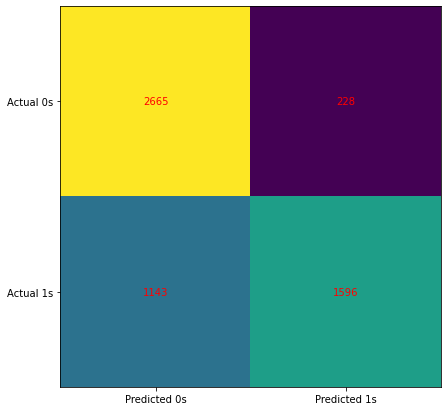

AUC: 0.8289132396096026


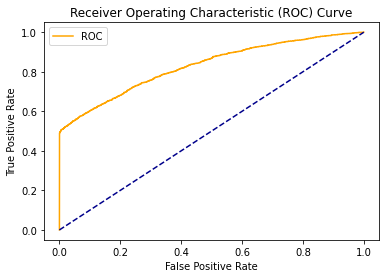

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

import lightgbm as lgb
from sklearn import metrics
lg = lgb.LGBMClassifier(silent=False)
lg.fit(X_train,y_train)
ytrain_pred = lg.predict_proba(X_train)
print('Light GBM train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = lg.predict_proba(X_test)
print('Light GBM test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, lg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, lg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lg.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,lg.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,lg)

In [54]:
pickle.dump(lg, open("model_LGBM_loan_default_featengg_smote_data.pkl", 'wb'))

### With scaled data

[LightGBM] [Info] Number of positive: 11341, number of negative: 11187
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2524
[LightGBM] [Info] Number of data points in the train set: 22528, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503418 -> initscore=0.013672
[LightGBM] [Info] Start training from score 0.013672
Light GBM train roc-auc: 0.8918619735153527
Light GBM test roc-auc: 0.8409295037675132
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     11187
           1       0.82      0.78      0.80     11341

    accuracy                           0.80     22528
   macro avg       0.80      0.80      0.80     22528
weighted avg       0.80      0.80      0.80     22528

              precision    recall  f1-score   support

           0       0.75      0.76   

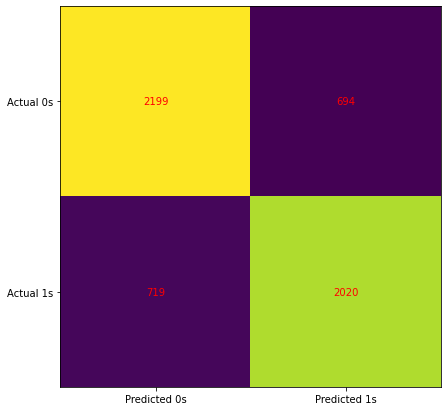

AUC: 0.8409295037675132


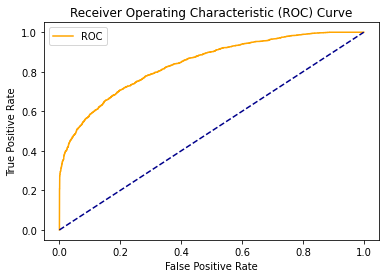

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import lightgbm as lgb
from sklearn import metrics
lg = lgb.LGBMClassifier(silent=False)
lg.fit(X_train,y_train)
ytrain_pred = lg.predict_proba(X_train)
print('Light GBM train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = lg.predict_proba(X_test)
print('Light GBM test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, lg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, lg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lg.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,lg.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,lg)

In [50]:
pickle.dump(lg, open("model_LGBM_loan_default_featengg_scaled_smote_data.pkl", 'wb'))

## With Hyper parameter tuning 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import lightgbm as lgb
from sklearn import metrics
lg1 = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
lg = GridSearchCV(lg1, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
lg.fit(X_train,y_train)
ytrain_pred = lg.predict_proba(X_train)
print('Light GBM with Grid search train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = lg.predict_proba(X_test)
print('Light GBM with Grid search test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, lg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, lg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lg.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,lg.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,lg)

In [ ]:
pickle.dump(lg, open("model_LGBM_loan_default_featengg_corrRemoved_scaled_hypertuned_data.pkl", 'wb'))

## Extreme Gradient Boost

C:\Users\sidht\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Extreme GBM with Grid search train roc-auc: 0.9458023667314415
Extreme GBM with Grid search test roc-auc: 0.8512529204269551
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     11187
           1       0.89      0.84      0.86     11341

    accuracy                           0.87     22528
   macro avg       0.87      0.87      0.87     22528
weighted avg       0.87      0.87      0.87     22528

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      2893
           1       0.77      0.73      0.75      2739

    accuracy                           0.76      5632
   macro avg       0

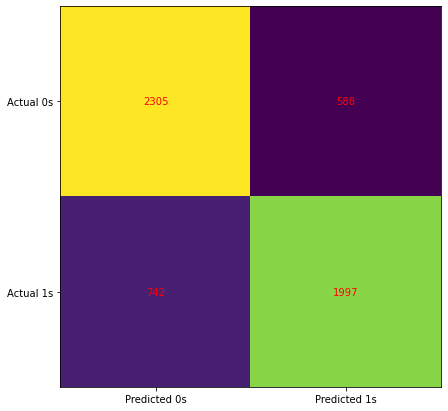

AUC: 0.8512529204269551


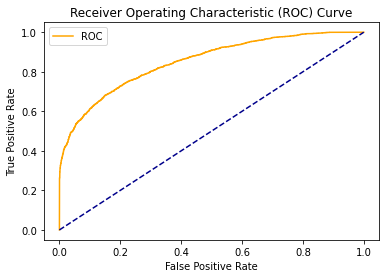

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

import xgboost as xgb
from sklearn import metrics
# Parameter Tuning
xg = xgb.XGBClassifier()

xg.fit(X_train, y_train)
#xg.best_estimator_

#model_xg = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
#                          n_jobs=-1 , verbose=1,learning_rate=0.16)
#model_xg.fit(X_train,y_train)
ytrain_pred = xg.predict_proba(X_train)
print('Extreme GBM with Grid search train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = xg.predict_proba(X_test)
print('Extreme GBM with Grid search test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, xg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, xg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xg.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,xg.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,xg)

In [52]:
pickle.dump(xg, open("model_XGB_loan_default_featengg_smote_data.pkl", 'wb'))

### With scaled data

C:\Users\sidht\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Extreme GBM with Grid search train roc-auc: 0.943714538160409
Extreme GBM with Grid search test roc-auc: 0.8503765872653799
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     11187
           1       0.89      0.83      0.86     11341

    accuracy                           0.86     22528
   macro avg       0.87      0.86      0.86     22528
weighted avg       0.87      0.86      0.86     22528

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      2893
           1       0.77      0.73      0.75      2739

    accuracy                           0.76      5632
   macro avg       0.

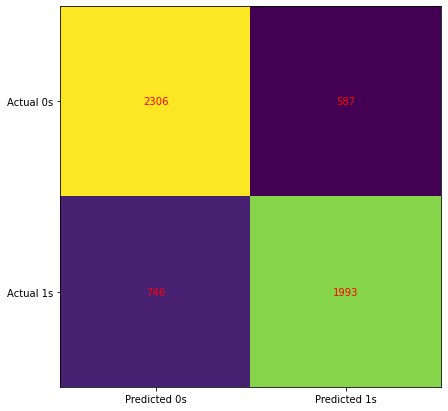

AUC: 0.8503765872653799


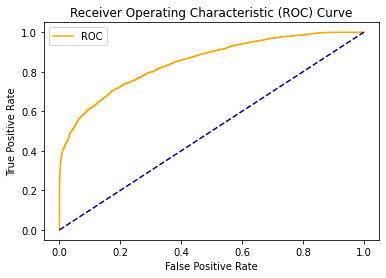

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import xgboost as xgb
from sklearn import metrics
# Parameter Tuning
xg = xgb.XGBClassifier()

xg.fit(X_train, y_train)
#xg.best_estimator_

#model_xg = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
#                          n_jobs=-1 , verbose=1,learning_rate=0.16)
#model_xg.fit(X_train,y_train)
ytrain_pred = xg.predict_proba(X_train)
print('Extreme GBM with Grid search train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = xg.predict_proba(X_test)
print('Extreme GBM with Grid search test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, xg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, xg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xg.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,xg.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,xg)

In [60]:
pickle.dump(xg, open("model_XGB_loan_default_featengg_scaled_smote_data.pkl", 'wb'))

### With Hyper parameter tuning

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# Parameter Tuning
xg1 = xgb.XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
xg = GridSearchCV(xg1, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)
xg.fit(X_train, y_train)
#xg.best_estimator_

#model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
#                          n_jobs=-1 , verbose=1,learning_rate=0.16)
#model.fit(X_train,y_train)

ytrain_pred = xg.predict_proba(X_train)
print('Extreme GBM with Grid search train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = xg.predict_proba(X_test)
print('Extreme GBM with Grid search test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, xg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, xg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xg.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,xg.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,xg)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed:  4.6min remaining:   21.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.9min finished


Extreme GBM with Grid search train roc-auc: 0.9943040558424634
Extreme GBM with Grid search test roc-auc: 0.8626126919139967


NameError: name 'classification_report' is not defined

In [116]:
pickle.dump(model, open("model_XGB_hyper_tuned_loan_default_featengg_data.pkl", 'wb'))

## Now we will focus on finding the optimal threshold value

In [65]:
#!pip install -U scikit-learn
from sklearn.model_selection import GridSearchCV

In [66]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier, gnb,cb_classifier,lg,xg,dt_classifier,svc_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [55]:
ensemble_pred = pd.concat(pred,axis=1)

In [56]:
ensemble_pred = ensemble_pred.rename(columns = {0:'RF',1:'LogReg', 2:'AdaBoost',3:'KNN',4:'NaiveBayes', 5:'CatBoost',6:'LGBM', 7:'XGBM', 8:'DecisionTree',9:'SupportVector'})

In [57]:
ensemble_pred

,RF,LogReg,AdaBoost,KNN,NaiveBayes
0,0.59,0.594624,0.501503,1.0,1.604881e-13
1,0.18,0.439786,0.491601,0.2,7.721566e-14
2,0.55,0.340821,0.497716,0.2,3.123138e-14
3,0.66,0.472019,0.499936,0.4,2.530454e-13
4,0.07,0.520132,0.317463,0.6,4.175437e-13
...,...,...,...,...,...
5627,0.46,0.235101,0.495824,0.6,2.245158e-15
5628,0.29,0.422317,0.492201,1.0,7.535080e-14
5629,0.74,0.559549,0.505708,0.6,1.793114e-13
5630,0.03,0.506569,0.500263,0.0,9.755350e-14


In [58]:
final_prediction

NameError: name 'final_prediction' is not defined

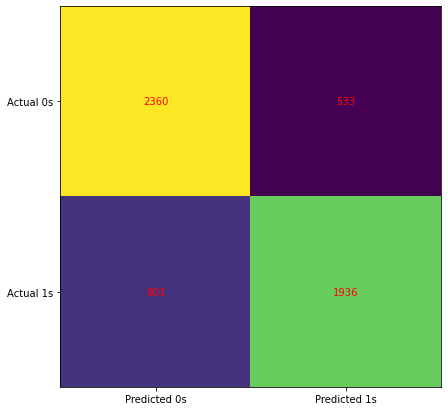

array([1.94139688, 0.94139688, 0.82964514, ..., 0.10368377, 0.08780278,
       0.08196466])

In [66]:
# Making the Confusion Matrix for threshold as .5
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,  np.where(final_prediction > 0.5, 1, 0))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
auc = metrics.roc_auc_score(y_test, final_prediction)
#plot_roc_curve(fpr,tpr)
thresholds

In [67]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
423,0.526580,0.769176
409,0.530484,0.769176
410,0.530203,0.769176
411,0.530041,0.768999
446,0.521654,0.768821


In [68]:
accuracy_ls

,thresholds,accuracy
423,0.526580,0.769176
409,0.530484,0.769176
410,0.530203,0.769176
411,0.530041,0.768999
446,0.521654,0.768821
...,...,...
1855,0.147710,0.492898
1856,0.105242,0.487393
1857,0.103684,0.487216
1858,0.087803,0.486861


In [156]:
accuracy_ls.iloc[1,0]

0.6293593498414337

In [69]:
from sklearn.metrics import f1_score
f1score_ls=[]
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    f1score_ls.append(f1_score(y_test, y_pred))
    
f1score_ls = pd.concat([pd.Series(thresholds), pd.Series(f1score_ls)],axis=1)
f1score_ls.columns = ['thresholds', 'f1score']
f1score_ls.sort_values(by='f1score', ascending=False, inplace=True)
f1score_ls.head()

,thresholds,f1score
771,0.457836,0.753592
772,0.457671,0.753459
770,0.457977,0.753371
779,0.457198,0.753320
783,0.456835,0.753316


In [70]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    #print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    #auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.legend()
    plt.show( )

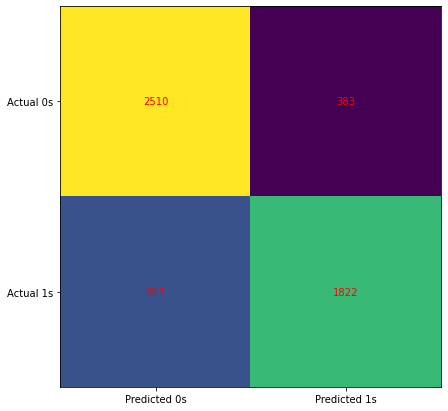

AUC: 0.7662728341641714


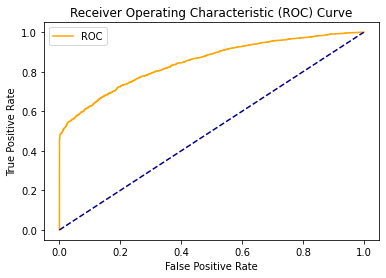

In [72]:
# Making the Confusion Matrix for threshold as accuracy threshold
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,  np.where(final_prediction >accuracy_ls.iloc[0,0], 1, 0))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
auc = metrics.roc_auc_score(y_test, np.where(final_prediction >accuracy_ls.iloc[1,0], 1, 0))
print('AUC:',auc)
plot_roc_curve(fpr,tpr)

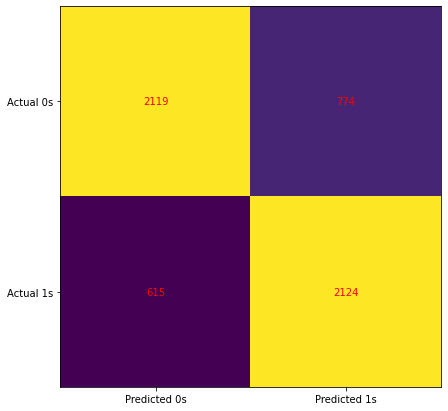

AUC: 0.7537887464132368


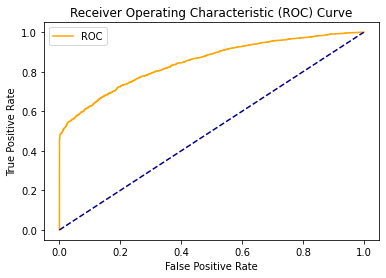

In [73]:
# Making the Confusion Matrix for threshold as f1 score threshold
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,  np.where(final_prediction >f1score_ls.iloc[0,0], 1, 0))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
auc = metrics.roc_auc_score(y_test, np.where(final_prediction >f1score_ls.iloc[1,0], 1, 0))
print('AUC:',auc)
plot_roc_curve(fpr,tpr)